In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns
import datetime as dt

In [2]:
original_df = pd.read_excel(r'full purchasing.xlsx')
original_df.columns = original_df.iloc[0]
original_df.drop([0], axis=0, inplace=True)
original_df.drop(original_df.columns[0], axis=1, inplace=True)
# original_df.drop(original_df.columns[[0,11]], axis=1, inplace=True)
# original_df['Product Name'] = original_df['Product Name'].str.strip()

original_df.head(2)

,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit
1,بلاستر طبي ٥سم Silkplast,Silkplast,بلاستر طبي ٥سم,5cm,25,16,400,Abd El Hamid,15,El Mahdy,1,2020-01-01 00:00:00,1/2020,25
2,برولين ٠/٣ راوند,NaN,برولين ٠/٣ راوند,3/0 round,1,95,95,Abd El Hamid,85,El Mahdy,1,2020-01-01 00:00:00,1/2020,10


In [3]:
expenses_df = pd.read_excel(r'Expenses Full Data.xlsx')
expenses_df.columns = expenses_df.iloc[0]
expenses_df.drop([0], axis=0, inplace=True)
expenses_df.drop(expenses_df.columns[0], axis=1, inplace=True)
expenses_df = expenses_df[expenses_df['Destination'] != 'dawaa']
expenses_df.head(2)


,Date,Type,Description,Destination,Client,Invoice no.,Name,Cost
1,2020-01-01 00:00:00,Marketing & Sales,Survey,Banha,"Alaa, Hassan, Ghareeb",NaN,Company,2565
2,2020-01-01 00:00:00,Marketing & Sales,Training,Cairo,Room Square,NaN,Company,1880


In [4]:
Financial_df = pd.read_excel(r'Clients Full Data.xlsx')
Financial_df.columns = Financial_df.iloc[0]
Financial_df.drop([0], axis=0, inplace=True)
Financial_df.drop(Financial_df.columns[0], axis=1, inplace=True)
Financial_df.dropna(subset=['Cogs','Creditor','Debitor'],thresh=1, inplace=True)
Financial_df


,Date,Invoice No.,Cogs,Creditor,Debitor,Balance,Client
1,2020-01-01 00:00:00,1,7405,8192.5,NaN,8192.5,El Mahdy
2,2020-01-01 00:00:00,NaN,NaN,NaN,1000,-1000,El Mahdy
3,2020-01-01 00:00:00,NaN,NaN,NaN,750,-750,El Mahdy
4,2020-01-01 00:00:00,2,1242.5,1312.5,NaN,1312.5,El Mahdy
5,2020-01-01 00:00:00,NaN,NaN,NaN,600,-600,El Mahdy
...,...,...,...,...,...,...,...
16497,2025-12-15 00:00:00,NaN,NaN,NaN,30000,-30000,Taha Yasen
16535,2025-12-18 00:00:00,NaN,NaN,NaN,35000,-35000,Jasmin
16552,2025-12-20 00:00:00,18',7079.7,8094,23540,-15446,Taha Yasen
16561,2025-12-20 00:00:00,NaN,NaN,NaN,425,-425,eman khairy


In [5]:
# original_df.dropna(subset=['Qty.','Unit Price/ LE'],how='any', inplace=True)

In [6]:
# original_df.to_excel('output25.xlsx', index=False)


In [7]:
# original_df['Product Name'] = original_df['Product Name'].str.strip()

In [8]:
# original_df.to_excel('output.xlsx', index=False)

In [9]:
category_dict = {
'Spinal' : 'ابر اسباينال',
'Surgical Needles' : 'ابر جراحيه',
'Sample Needles' : 'ابر سحب',
'Dialysis Needle' : 'ابر غسيل كلوي',
'Pregnancy Test' : 'اختبار حمل',
'Baby Bottle' : 'ازازة لبن للأطفال',
'Steery Strip' : 'استيري سترب',
'ID' : 'اسورة تعريف',
'Hegama Cups' : 'اكواب حجامه',
'Electrode' : 'اليكترود',
'Amadol Blocker' : 'امادول عزل',
'Embo Bag' : 'امبو باج',
'Ear Tubes' : 'انابيب تهوية اذن',
'ET Tube' : 'انبوبة حنجرية',
'Deudenal Tube' : 'انبوبه دودية',
'Chest Tube' : 'انبوبه صدريه',
'Over Head' : 'اوفر شوز',
'Over Shoes' : 'اوفر هيد',
'Eye Patch' : 'اي باتش',
'Egycryl' : 'ايجي كريل',
'Ice Box' : 'ايس بوكس',
'Baby Bottle' : ['ببرونه','ازازة لبن للأطفال'],
'Over Suit' : 'بدلة عزل',
'Breast Suction Vac' : ['برطمان شفاط صدر','برطمان صدر'],
'Potassium Permengnate' : 'برمنجنات بوتاسيوم',
'Prolene' : ['برولين ٠/٢ راوند','برولين ٠/٢ قاطع','برولين ٠/٢ مستقيم','برولين ٠/٣ راوند','برولين ٠/٣ قاطع','برولين ٠/٣ مستقيم','برولين ٠/٤ راوند','برولين ٠/٤ قاطع','برولين ٠/٥ راوند','برولين ٠/٥ قاطع','برولين ٠/٦ ابرتين','برولين ٠/٦ راوند','برولين ٠/٦ قاطع','برولين ٢ راوند','برولين ٢ قاطع','برولين زيرو راوند','برولين زيرو قاطع','برولين واحد راوند','برولين واحد قاطع'],
'Sterilization Roll' : ['بكر تعقيم','رول تعقيم'],
'ECG Roll' : 'بكر رسم قلب',
'Sonar Roll' : 'بكر سونار',
'Plaster' : 'بلاستر طبي',
'Oxygen Pulse' : 'بلص اكسجين',
'Suction Tip' : 'بوز شفاط',
'Polyester' : 'بوليستر',
'Bone Wax' : 'بون واكس',
'BD' : 'بي دي',
'Betadine' : 'بيتادين',
'Thermometer' : ['ترمومتر ثلاجه','ترمومتر ديجيتال','ترمومتر عريض','ترمومتر مبروم'],
'Shash Roll' : 'توب شاش',
'T Tube' : 'تي تيوب',
'Sterilization Tape' : 'تيب تعقيم',
'Ice' : 'ثلج',
'Doctor Gown' : 'جاون طبيب',
'Patient Gown' : 'جاون مريض',
'Gypsona' : 'جبسونا',
'Camera Cover' : 'جراب كاميرا',
'Surgical Graft' : 'جرافت جراحي',
'Dialysis Sterilization Liquid' : 'جركن تعقيم',
'Dialysis Liquid' : 'جركن غسيل كلوي',
'Alcohol' : 'كحول',
'KY Gel' : 'جل KY',
'Sonar Gel' : 'جل سونار',
'Foam Gel' : 'جل فوم',
'Telescope Rubber' : 'جلدة تيليسكوب',
'Glycerine' : 'جلسرين',
'PCA' : 'جهاز تسكين الألم بي سي ايه',
'Rectal Syringe Set' : 'جهاز حقنة شرجية',
'Glucose Set' : 'جهاز سكر',
'Pressure Set' : 'جهاز ضغط',
'Flowmeter Set' : 'جهاز فلوميتير',
'Hemoglobin Set' : 'جهاز قياس الهيموجلوبين',
'Nebulizer Set' : 'جهاز نبيولايزر',
'Blood Transfusion' : 'جهاز نقل دم',
'IV Set' : 'جهاز وريد',
'Antivirus Gloves' : 'جوانتي انتي فيرس',
'Check Gloves' : 'جوانتي فحص',
'Latex' : 'جوانتي لاتكس',
'Sterile Gloves' : 'جوانتي معقم',
'Nitrile' : 'جوانتي نيتريل',
'Arm Holder' : 'حامل ذراع',
'Stabilizer Arm Holder' : 'حامل ذراع بمثبت',
'Silk' : 'حرير',
'Abdomen Belt' : 'حزام بطن',
'Testes Belt' : 'حزام رافع خصيه',
'Chest Belt' : 'حزام صدر',
'Nose Filler' : 'حشو انف',
'Diapers' : 'حفاضات',
'Tongue Depressor' : 'خافض لسان',
'Skin Stapler Remover' : 'خلاعه دبابيس',
'BDS' : 'خيط بي دي اس',
'Cervical' : 'خيط ربط عنق',
'Chromic' : 'خيط كروميك',
'Nylon' : 'خيط نايلون',
'Di Flow' : 'داي فلو',
'Skin Stapler' : 'دباسه جلد',
'Suction Vac Tube' : 'درنقة حصيرة',
'Dressing' : 'دريسنج',
'Nose Support' : 'دعامه انفيه',
'Bandage' : 'رباط ضاغط',
'Rosas' : 'رصاص',
'Neck Support' : 'رقبة',
'Oil' : 'زيت',
'Parafin Oil' : 'زيت بارافين',
'IV Burette' : 'سالوست',
'Cidex' : 'سايدكس',
'Sponge' : 'سبونج معقم',
'Sterilium' : 'ستريليم',
'Syringe' : 'سرنجات',
'Doctor Scrub' : 'سكراب طبيب',
'Cutting Wire' : 'سلك بتر',
'Stethoscope' : 'سماعه طبيب',
'Insulin Pen Tip' : 'سن قلم انسولين',
'Soof Pad' : 'سوف باد',
'Surgical Pad' : 'سيرجيكال باد',
'Safety Box' : 'سيفتي بوكس',
'Shash' : 'شاش',
'Vasiline Shash' : 'شاش فازلين',
'Shamber Modifier' : 'شامبر موديفير',
'Prolene Mesh' : 'شبكة برولين',
'Hemoglobin Strips' : 'شرائط الهيموجلوبين',
'Glucose Strips' : 'شرائط سكر',
'Cholestrol Strips' : 'شرائط كوليسترول',
'Varicose Veins Socks' : 'شراب دوالي',
'Surgical Vac' : 'شفاط جراحي',
'Blood Lancets' : 'شكاكه',
'Doctor Crocs' : 'صابوة طبيب',
'Diathermy Blocker' : 'عازل دياثيرم',
'Binoculars' : 'عضاضه مناظير',
'Pharmapore' : 'فارمابور',
'Surgical Gown' : 'فرش جراحي',
'Baby Bed Dressing' : 'فرش حضانه',
'Vicryl' : 'فكريل',
'Stool Bag' : ['فلانشه','كيس فلانشه','كيس براز'],
'Bacterial Filter' : 'فلتر بكتيري',
'Dialysis Filter' : 'فلتر غسيل كلوي',
'Lap Sample Tubes' : 'فوارغ معمل',
'Abdomen Towels' : 'فوط بطن',
'Sterilization Towels' : 'فوط تعقيم',
'Spinal Towels' : 'فوط سباينال',
'Surgical Towels' : ['فوط فرش','فوط فنيك','فوط جراحيه'],
'Face Sheild' : 'فيس شيلد',
'CVP Catheter' : 'قسطرة CVP',
'Epidural Catheter' : 'قسطرة ابيديورل',
'Feeding Rayl Catheter' : 'قسطرة رايل',
'Silicone Catheter' : 'قسطرة سيليكون',
'Rectal Catheter' : 'قسطرة شرجيه',
'Suction Catheter' : 'قسطرة شفط',
'Breast Catheter' : 'قسطرة صدرية',
'Dialysis Catheter' : ['قسطرة غسيل كلوي','قسطرة غسيل كلوي ماهوكر','قسطرة ماهوكر مستقيم'],
'Fogarty Catheter' : 'قسطرة فوجارتي',
'Folley Catheter' : 'قسطرة فولي',
'CVS Catheter' : 'قسطرة قلبيه',
'External Catheter' : 'قسطرة كاندم',
'Nelaton Catheter' : 'قسطرة نيلاتون',
'U.Cord Catheter' : 'قسطره سرة',
'Baby Stool Set' : 'قصرية',
'Cotton' : 'قطن',
'Doctor Cap' : 'كاب طبيب',
'Patient Cap' : 'كاب مريض',
'Nurse Cap' : 'كاب ممرضه ازرق',
'Diathermy Cable' : 'كابل دياثيرم',
'Biological Detector' : 'كاشف بيولوجي',
'Tape Detector' : 'كاشف شريط',
'IV Cannula' : ['كانيولا اخضر مقاس ١٨','كانيولا ازرق مقاس ٢٢','كانيولا اصفر مقاس ٢٤','كانيولا بمبي مقاس ٢٠','كانيولا بنفسجي مقاس ٢٦','كانيولا رصاصي مقاس ١٦'],
'Nasal Cannula' : 'كانيولا انفيه',
'Bi Bag Dialysis Capsules' : 'كبسولات غسيل كلوي باي باج',
'Digital Blood Pressure Cuff' : 'كف ضغط ديجيتال لارج',
'Monitor Cuff' : 'كف مونوتور',
'U.Cord Clamp' : 'كلبس سرة',
'Gallbladder Clamp' : 'كلبس مرارة',
'Polymer Clamp' : 'كلبسات بوليمير',
'Chlorine Tablet' : 'كلور اقراص',
'Sample Cup' : 'كوب تعقيم',
'Stress Ball' : 'كورة أعصاب',
'Ice Bag' : 'كيس تبريد',
'Breathing Bag' : 'كيس تنفس',
'Urine Bag' : 'كيس جمع بول',
'Liso Bag' : 'كيس ليزو',
'Baby Pacifiers' : 'لهايات',
'Loop' : 'لوب',
'Lup' : 'لولب',
'Linor' : 'لينور',
'Oxygen Water' : 'ماء اكسجين',
'N95 Mask' : 'ماسك N95',
'Oxygen Mask' : 'ماسك اكسجين',
'CPAP Mask' : 'ماسك سباب',
'Mask' : 'ماسك طبي',
'KN95 Mask' : 'ماسك طبي KN95',
'Venturi Mask' : 'ماسك فينتوري',
'Laryngial Mask' : 'ماسك لارنجال',
'Nebulizer Mask' : 'ماسك نبيولايزر',
'Anathesia Mask' : 'ماسك وصله تخدير',
'Makentosh' : 'ماكنتوش',
'Hard Urine Bag' : 'مبولة',
'Cannula Fixator' : 'مثبت كانيولا',
'Glucose Saline' : 'محلول جلوكوز',
'Ringer saline' : 'محلول رينجر',
'Normal Saline' : 'محلول ملح',
'Temperature Set' : 'مسدس قياس حرارة',
'CVP Ruler' : 'مسطرة CVP',
'Blades' : 'مشرط جراحي',
'Bed Dressing' : ['مفرش سرير','ملاية شق'],
'Airway Tube' : 'ممر هواء',
'Tissues' : 'مناديل',
'Cuff Monitor' : 'منظم كف',
'Monocryl' : 'مونوكريل',
'Scaler' : 'ميزان',
'Galsses' : 'نظارة محضن',
'Sterilization Paper' : ['ورق تعقيم','ورق جهاز صدمات'],
'IV Extension Line' : 'وصلة امتداد وريدي',
'CPAP Extension' : 'وصلة سباب',
'Dialysis Extension' : 'وصلة غسيل كلوي',
'Anathesia Extension' : ['وصله احاديه تخدير','وصله تخدير'],
'Breathing Circuits' : 'وصله تنفس',
'3Way Stopcock' : 'وصله ثلاثية',
'CPAP Extension' : 'وصلة سباب',
'Vent Extension' : 'وصله فنت',
'Monitor Extension' : 'وصله مونيتور',
'Pharmaceuticals' : 'Dawaa'
}

In [10]:
def categorize_product(product_name):
    for key, value in category_dict.items():
        if isinstance(value,list):
            if any(term in product_name for term in value):
                return key
        else:
            if value in product_name:
                return key
    return 'uncategorized'


original_df['Category'] = original_df['Product Name'].apply(categorize_product)


In [11]:
# original_df[original_df['Category'] == 'uncategorized']
# pd.set_option('display.max_rows', None)
original_df[original_df['Category'] == 'uncategorized']


,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Category
8864,معصم لارج Zola,Zola,معصم لارج,L,4,20,80,Kareem,12.45,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,30.2,uncategorized
8865,معصم ميديم Zola,Zola,معصم ميديم,M,3,20,60,Kareem,12.45,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,22.65,uncategorized
8866,معصم اكس لارج Zola,Zola,معصم اكس لارج,XL,3,20,60,Kareem,12.45,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,22.65,uncategorized
8871,ركبه لارج Zola,Zola,ركبه لارج,L,4,30,120,Kareem,27,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,12,uncategorized
8872,ركبه ميديم Zola,Zola,ركبه ميديم,M,3,30,90,Kareem,27,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,9,uncategorized
8873,ركبه اكس لارج Zola,Zola,ركبه اكس لارج,XL,3,30,90,Kareem,27,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,9,uncategorized
8885,عكاز ثابت,NaN,عكاز ثابت,NaN,2,600,1200,Kareem,455,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,290,uncategorized
8896,ترنوكيه,NaN,ترنوكيه,NaN,3,30,90,Heba Lab,30,MEDECA HOSPITAL SHARM,134,15/10/2025,134/2025,0,uncategorized
8946,سيرجي سيل,NaN,سيرجي سيل,NaN,20,125,2500,Kareem,110,Taha Yasen,142,19/11/2025,142/2025,300,uncategorized
8973,حاويه نفايات,NaN,حاويه نفايات,NaN,2,850,1700,Heba Lab,700,Arkan Center,152,2025-12-14 00:00:00,152/2026,300,uncategorized


# 1. Sales & Revenue Metrics

In [12]:
Financial_df.head(2)

,Date,Invoice No.,Cogs,Creditor,Debitor,Balance,Client
1,2020-01-01 00:00:00,1,7405,8192.5,NaN,8192.5,El Mahdy
2,2020-01-01 00:00:00,NaN,NaN,NaN,1000,-1000,El Mahdy


In [13]:
original_df['Year'] = pd.DatetimeIndex(original_df['Date']).year
original_df['Month'] = pd.DatetimeIndex(original_df['Date']).month

In [14]:
Financial_df['Year'] = pd.DatetimeIndex(Financial_df['Date']).year
Financial_df['Month'] = pd.DatetimeIndex(Financial_df['Date']).month

### Total Sales Revenue (by year, quarter, month, week, day)
### Yearly Growth Rate

In [15]:
total_sales_by_year = original_df.groupby('Year')['Total Selling Price'].sum().reset_index()
total_sales_by_year['Growth Rate'] = total_sales_by_year['Total Selling Price'].pct_change() * 100
total_sales_by_year.round(1)

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/4225030704.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  total_sales_by_year['Growth Rate'] = total_sales_by_year['Total Selling Price'].pct_change() * 100


,Year,Total Selling Price,Growth Rate
0,2020,1577652.9625,NaN
1,2021,1593147.228431,1.0
2,2022,1926761.1328,20.9
3,2023,2213421.3,14.9
4,2024,3290487.95,48.7
5,2025,3392914.76,3.1


### Grawth Rate from Year one

In [16]:
start_value = total_sales_by_year["Total Selling Price"].iloc[1]
end_value = total_sales_by_year["Total Selling Price"].iloc[-2]
years = 5

Growth_Rate = ((end_value / start_value) ** (1/years) - 1) * 100
Growth_Rate

15.61145807281672

### Revenue Per Product

In [17]:
Revenue_per_product = original_df.groupby('Product Name')['Total Selling Price'].sum().reset_index().sort_values(by='Total Selling Price', ascending=False).reset_index()
Revenue_per_product.head(10)

,index,Product Name,Total Selling Price
0,150,جوانتي لاتكس,1262895.4
1,367,فكريل واحد راوند متر,858201.1
2,393,فكريل ٢ راوند متر,747150
3,155,جوانتي لاتكس لارج,693519.0
4,81,بلاستر طبي ١٠سم,434222.351373
5,515,كانيولا اصفر مقاس ٢٤,420526.5
6,1,ابر اسباينال برتقالي مقاس ٢٥,418478.62
7,377,فكريل ٠/٢ قاطع,330533
8,506,كابل دياثيرم,317170.058824
9,143,جهاز وريد,312019.366


### Revenue Per Category

In [18]:
Revenue_per_category = original_df.groupby('Category')['Total Selling Price'].sum().reset_index().sort_values(by='Total Selling Price', ascending=False).reset_index()
Revenue_per_category.head(10)

,index,Category,Total Selling Price
0,199,Vicryl,2420092.8112
1,103,Latex,2265399.4
2,93,IV Cannula,835313.8
3,166,Sterile Gloves,629604.35
4,136,Plaster,565979.601373
5,162,Spinal,554362.56
6,184,Syringe,382638.864259
7,58,Diathermy Cable,372471.058824
8,178,Surgical Gown,356531
9,52,Dialysis Filter,323272.0


### Category per units sold

In [19]:
Category_per_units_sold = original_df.groupby('Category')['Qty.'].sum().reset_index().sort_values(by='Qty.', ascending=False).reset_index()
Category_per_units_sold.head(10)
# Category_per_units_sold['rank']= Category_per_units_sold['Qty.'].rank(ascending=False)
# Category_per_units_sold.head(10)


,index,Category,Qty.
0,166,Sterile Gloves,78258
1,95,IV Set,75778
2,69,Electrode,29704
3,118,Nelaton Catheter,27055
4,11,Baby Bed Dressing,23200
5,168,Sterilization Paper,22612
6,75,Feeding Rayl Catheter,21846
7,136,Plaster,19894
8,195,Urine Bag,19498
9,58,Diathermy Cable,19422


### Category per size

In [20]:
Category_size = original_df.groupby('Category').size().reset_index(name='Counts').sort_values(by='Counts', ascending=False).reset_index()
Category_size.head(10)

,index,Category,Counts
0,199,Vicryl,603
1,103,Latex,552
2,184,Syringe,466
3,166,Sterile Gloves,356
4,93,IV Cannula,318
5,178,Surgical Gown,275
6,66,ET Tube,267
7,142,Prolene,262
8,136,Plaster,251
9,169,Sterilization Roll,250


### Category per MFG

In [21]:
Revenue_per_mfg = original_df.groupby('MFG')['Total Selling Price'].sum().reset_index().sort_values(by='Total Selling Price', ascending=False).reset_index()
Revenue_per_mfg.head(10)

,index,MFG,Total Selling Price
0,25,GMS,698190.8325
1,40,Provin,639047.8
2,43,Silkplast,566994.801373
3,62,الدولية,381067.364259
4,16,Egysorb,370601.5
5,49,Ultra,352147.767294
6,33,KDL,339058.0
7,54,اكسيل,119415.0
8,66,الفرعونيه,82275.0
9,5,BD,76877.32


# 2.Profitability Metrics

### Total Profit Per Year
### Profit Growth Rate YOY

In [22]:
total_profits_by_year = original_df.groupby('Year')['Profit'].sum().reset_index()
total_profits_by_year['Growth Rate'] = total_profits_by_year['Profit'].pct_change() * 100
total_profits_by_year.round(1)

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/228423437.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  total_profits_by_year['Growth Rate'] = total_profits_by_year['Profit'].pct_change() * 100


,Year,Profit,Growth Rate
0,2020,153163.8875,NaN
1,2021,142369.188431,-7.0
2,2022,272364.6228,91.3
3,2023,259498.91,-4.7
4,2024,324551.23,25.1
5,2025,329935.86,1.7


### Profit Growth Rate from year one

In [23]:
start_value = total_profits_by_year["Profit"].iloc[1]
end_value = total_profits_by_year["Profit"].iloc[-2]
years = 5

Profit_Growth_Rate = ((end_value / start_value) ** (1/years) - 1) * 100
Profit_Growth_Rate

17.91619320008866

### Profit Margin %

In [24]:
Profit_margin = (original_df.groupby("Year").agg(Profit_sum=("Profit", "sum"),
                                                 Selling_sum=("Total Selling Price", "sum")
    )
    .reset_index()
)

# Then calculate profit margin
Profit_margin["Profit_Margin"] = Profit_margin["Profit_sum"] / Profit_margin["Selling_sum"]*100
Profit_margin

,Year,Profit_sum,Selling_sum,Profit_Margin
0,2020,153163.8875,1577652.9625,9.708338
1,2021,142369.188431,1593147.228431,8.936348
2,2022,272364.6228,1926761.1328,14.135879
3,2023,259498.91,2213421.3,11.723882
4,2024,324551.23,3290487.95,9.863316
5,2025,329935.86,3392914.76,9.72426


### Profit by Category
### Top Profit-Generating Products
### Profit Margin from each Category


In [25]:
Profit_margin_category = original_df.groupby('Category').agg(Profit_sum=("Profit", "sum"),
                                                 Selling_sum=("Total Selling Price", "sum")).reset_index().sort_values(by='Profit_sum', ascending=False).reset_index()

Profit_margin_category["Profit_Margin"] = Profit_margin_category["Profit_sum"] / Profit_margin_category["Selling_sum"]*100

Profit_margin_category.head(10)

,index,Category,Profit_sum,Selling_sum,Profit_Margin
0,199,Vicryl,211215.9912,2420092.8112,8.727599
1,103,Latex,196966.65,2265399.4,8.694566
2,93,IV Cannula,72762.0,835313.8,8.710738
3,166,Sterile Gloves,67800.55,629604.35,10.768755
4,162,Spinal,65783.31,554362.56,11.866478
5,136,Plaster,48109.501373,565979.601373,8.500218
6,52,Dialysis Filter,43599.4,323272.0,13.486909
7,178,Surgical Gown,42903,356531,12.033456
8,58,Diathermy Cable,39822.258824,372471.058824,10.69137
9,4,Alcohol,37870.304902,163567.254902,23.152742


### sorting by revenue

In [26]:
Profit_margin_category.sort_values(by = 'Selling_sum', ascending = False).head(10)

,index,Category,Profit_sum,Selling_sum,Profit_Margin
0,199,Vicryl,211215.9912,2420092.8112,8.727599
1,103,Latex,196966.65,2265399.4,8.694566
2,93,IV Cannula,72762.0,835313.8,8.710738
3,166,Sterile Gloves,67800.55,629604.35,10.768755
5,136,Plaster,48109.501373,565979.601373,8.500218
4,162,Spinal,65783.31,554362.56,11.866478
14,184,Syringe,25716.434259,382638.864259,6.720811
8,58,Diathermy Cable,39822.258824,372471.058824,10.69137
7,178,Surgical Gown,42903,356531,12.033456
6,52,Dialysis Filter,43599.4,323272.0,13.486909


# 3. Quantity & Volume Metrics

### Total Quantity Sold

In [27]:
Category_per_units_sold = original_df.groupby('Category')['Qty.'].sum().reset_index().sort_values(by='Qty.', ascending=False).reset_index()
Category_per_units_sold.head(20)

,index,Category,Qty.
0,166,Sterile Gloves,78258
1,95,IV Set,75778
2,69,Electrode,29704
3,118,Nelaton Catheter,27055
4,11,Baby Bed Dressing,23200
5,168,Sterilization Paper,22612
6,75,Feeding Rayl Catheter,21846
7,136,Plaster,19894
8,195,Urine Bag,19498
9,58,Diathermy Cable,19422


### Average Quantity per Transaction

In [28]:
original_df['Qty.'].sum() / original_df['Invoice No'].nunique()

306.16941473259334

In [29]:
original_df.groupby('Year').apply(lambda x : x['Qty.'].sum() / x['Invoice No'].nunique()).reset_index(name='Avg_Qty_per_Transaction')

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/213644599.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  original_df.groupby('Year').apply(lambda x : x['Qty.'].sum() / x['Invoice No'].nunique()).reset_index(name='Avg_Qty_per_Transaction')


,Year,Avg_Qty_per_Transaction
0,2020,234.346516
1,2021,281.826950
2,2022,290.309881
3,2023,332.324494
4,2024,440.878531
5,2025,453.157576


### Most Frequently Purchased Products

In [30]:
Category_size = original_df.groupby('Category').size().reset_index(name='Counts').sort_values(by='Counts', ascending=False).reset_index()
Category_size.head(10)

,index,Category,Counts
0,199,Vicryl,603
1,103,Latex,552
2,184,Syringe,466
3,166,Sterile Gloves,356
4,93,IV Cannula,318
5,178,Surgical Gown,275
6,66,ET Tube,267
7,142,Prolene,262
8,136,Plaster,251
9,169,Sterilization Roll,250


# 4. Supplier Performance Metrics

### Total Purchases from Each Supplier

In [31]:
original_df['Total Buying Price'] = original_df['Qty.'] * original_df['Buying Price']
original_df.groupby('Supplier')['Total Buying Price'].sum().reset_index().sort_values(by='Total Buying Price', ascending=False).reset_index().head(10)

,index,Supplier,Total Buying Price
0,80,Safa,4308867.03
1,57,Kareem,2615762.16
2,39,El Yosr,708964.45
3,9,Amazon,403125.75
4,46,FOX,369255.75
5,5,Ahmed Mongey,342421.5
6,2,Abd El Hamid,341824.98
7,26,El Hanafy,293793.5
8,7,Al Moaeez,287530.76
9,67,Motakhssoon,284004.5


### Total Profit

In [32]:
Supplier_revenue_profit = original_df.groupby('Supplier').agg(Profit_sum=("Profit", "sum"),
                                                 Buying_sum=("Total Buying Price", "sum")).reset_index().sort_values(by='Buying_sum', ascending=False).reset_index()
Supplier_revenue_profit['contribution_margin'] = Supplier_revenue_profit['Profit_sum'] / Supplier_revenue_profit['Buying_sum'] * 100
Supplier_revenue_profit.head(10)

,index,Supplier,Profit_sum,Buying_sum,contribution_margin
0,80,Safa,443862.32,4308867.03,10.301138
1,57,Kareem,318391.373329,2615762.16,12.172031
2,39,El Yosr,75179.614,708964.45,10.604144
3,9,Amazon,35662.0,403125.75,8.846371
4,46,FOX,33103.02,369255.75,8.964795
5,5,Ahmed Mongey,59325.5,342421.5,17.325285
6,2,Abd El Hamid,47676.663922,341824.98,13.947683
7,26,El Hanafy,52732.95,293793.5,17.948985
8,7,Al Moaeez,36996.33,287530.76,12.866912
9,67,Motakhssoon,45623.4,284004.5,16.064323


### Supplier Dependence %

In [33]:
supplier_by_year = original_df.groupby(['Supplier','Year'])['Total Buying Price'].sum().reset_index().sort_values(by=['Year','Total Buying Price'], ascending=[True,False])
supplier_by_year

,Supplier,Year,Total Buying Price
133,Kareem,2020,378347.77
5,Abd El Hamid,2020,138290.13
22,Al Moaeez,2020,114686.96
95,El Yosr,2020,110294.45
156,Mnouf,2020,71212.0
...,...,...,...
200,WH,2025,10923.75
179,Ryaan Medical,2025,10350.0
35,Arab Medical,2025,5100
193,Sphinx,2025,3965.0


In [34]:
buying_by_year = original_df.groupby('Year')['Total Buying Price'].sum().reset_index()
buying_by_year.rename(columns={'Total Buying Price':'Total Buying Price Yearly'}, inplace=True)
buying_by_year

,Year,Total Buying Price Yearly
0,2020,1424489.075
1,2021,1450778.04
2,2022,1654396.51
3,2023,1953922.39
4,2024,2965936.72
5,2025,3062978.9


In [35]:
supplier_pivot = supplier_by_year.merge(buying_by_year, on='Year', how='left').reset_index()
supplier_pivot['Supplier Dependence %'] = supplier_pivot['Total Buying Price'] / supplier_pivot['Total Buying Price Yearly'] * 100
supplier_pivot.sort_values(by='Supplier Dependence %', ascending=False).head(20)

,index,Supplier,Year,Total Buying Price,Total Buying Price Yearly,Supplier Dependence %
159,159,Safa,2024,1779586.25,2965936.72,60.000817
184,184,Safa,2025,1647682.28,3062978.9,53.793458
78,78,Kareem,2022,782917.32,1654396.51,47.323439
43,43,Kareem,2021,680350.84,1450778.04,46.895584
117,117,Safa,2023,729479.5,1953922.39,37.334108
0,0,Kareem,2020,378347.77,1424489.075,26.560244
118,118,Kareem,2023,434871.29,1953922.39,22.256324
1,1,Abd El Hamid,2020,138290.13,1424489.075,9.708051
79,79,Safa,2022,152119.0,1654396.51,9.194833
185,185,El Yosr,2025,277406.0,3062978.9,9.056739


# 5. Customer Performance Metrics

### Top Customers by Sales Volume

In [36]:
Customer_data = original_df.groupby('Client').agg(Sales_sum=("Total Selling Price", "sum"),
                                 Profit_sum=("Profit", "sum"),
                                 Transactions_count=("Invoice No", "nunique"),
                                 Products_No=("Product Name", "nunique"),
                                 Category_No=("Category", "nunique"),
                                 years_in_business=("Year", "nunique"),
                                 Units_sold=("Qty.", "sum")).reset_index().sort_values(by='Sales_sum', ascending=False)
Customer_data['Contribution Margin %'] = Customer_data['Profit_sum'] / Customer_data['Sales_sum'] * 100
Customer_data.head(10)

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %
63,Taha Yasen,3197782.06,344990.64,351,238,97,6,139797,10.788435
38,Jasmin,2999293.25,340480.1,112,118,53,3,78411,11.352011
36,Hemeda,1631108.9,170082.97,238,238,99,6,92641.64,10.427444
9,Bnoon,1196362,90045.5,54,23,15,6,38906,7.52661
33,Galal,751414.2228,128088.3928,82,335,104,3,39593,17.046309
24,El Asema,661981.478431,75005.698431,90,146,72,4,42308,11.330483
55,Royal,367168.0,28200.0,24,40,18,3,7011,7.680408
30,El Safwa,366641.91,34749.08,102,256,95,4,26651,9.477662
6,Amina,345451.0,14245.5,27,27,17,3,8878,4.12374
2,Adam Banha,210665.0,30296.55,165,17,11,3,7705,14.381388


In [37]:
retension = original_df.groupby('Year').agg(Unique_Customers_per_Year = ('Client' , 'nunique'),
                                Sales_sum=("Total Selling Price", "sum"),
                                Profit_sum=("Profit", "sum"),
                                Products_No=("Product Name", "nunique"),
                                Category_No=("Category", "nunique"),
                                Transactions_count=("Invoice No", "nunique")).reset_index()
retension['Avg_Sales_per_Customer'] = retension['Sales_sum'] / retension['Unique_Customers_per_Year']
retension['Avg_Sales_per_Transaction'] = retension['Sales_sum'] / retension['Transactions_count']
retension['Contribution_Margin_%'] = retension['Profit_sum'] / retension['Sales_sum'] * 100
retension.transpose()

,0,1,2,3,4,5
Year,2020,2021,2022,2023,2024,2025
Unique_Customers_per_Year,47,25,21,21,15,14
Sales_sum,1577652.9625,1593147.228431,1926761.1328,2213421.3,3290487.95,3392914.76
Profit_sum,153163.8875,142369.188431,272364.6228,259498.91,324551.23,329935.86
Products_No,314,414,318,265,227,240
Category_No,125,143,123,113,99,103
Transactions_count,531,423,419,267,177,165
Avg_Sales_per_Customer,33567.084309,63725.889137,91750.530133,105401.014286,219365.863333,242351.054286
Avg_Sales_per_Transaction,2971.097858,3766.305505,4598.475257,8289.967416,18590.327401,20563.119758
Contribution_Margin_%,9.708338,8.936348,14.135879,11.723882,9.863316,9.72426


### CLV

### CLV=((AOV×Purchase Frequency×Gross Margin​) / (1+Discount Rate−Retention Rate) )

In [38]:
Customer_data['AOV'] = Customer_data['Sales_sum'] / Customer_data['Transactions_count']
Customer_data['Purchase_Frequency'] = Customer_data['Transactions_count'] / Customer_data["years_in_business"]
Customer_data['Gross_Margin'] = Customer_data['Profit_sum'] / Customer_data['Sales_sum']
Customer_data['CLV'] = (Customer_data['AOV'] * Customer_data['Purchase_Frequency'] * Customer_data['Gross_Margin']) / (1 + 0.1 - 0.95)  # Assuming Discount Rate = 10% and Retention Rate = 95%
Customer_data.sort_values(by= 'CLV', ascending= False).head(10)

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,AOV,Purchase_Frequency,Gross_Margin,CLV
38,Jasmin,2999293.25,340480.1,112,118,53,3,78411,11.352011,26779.404018,37.333333,0.11352,756622.444444
63,Taha Yasen,3197782.06,344990.64,351,238,97,6,139797,10.788435,9110.490199,58.500000,0.107884,383322.933333
33,Galal,751414.2228,128088.3928,82,335,104,3,39593,17.046309,9163.588083,27.333333,0.170463,284640.872889
36,Hemeda,1631108.9,170082.97,238,238,99,6,92641.64,10.427444,6853.398739,39.666667,0.104274,188981.077778
24,El Asema,661981.478431,75005.698431,90,146,72,4,42308,11.330483,7355.34976,22.500000,0.113305,125009.497386
58,Salah Salem,159582.9,18139.88,47,161,77,1,17527.5,11.367057,3395.380851,47.000000,0.113671,120932.533333
9,Bnoon,1196362,90045.5,54,23,15,6,38906,7.52661,22154.851852,9.000000,0.075266,100050.555556
34,Hamdy El Sayed,127077.7825,12846.7475,6,77,43,1,18371,10.109358,21179.630417,6.000000,0.101094,85644.983333
44,Maghraby,89846.7,10936.7,39,75,43,1,5102.64,12.172623,2303.761538,39.000000,0.121726,72911.333333
2,Adam Banha,210665.0,30296.55,165,17,11,3,7705,14.381388,1276.757576,55.000000,0.143814,67325.666667


In [39]:
original_df['Date'] = pd.to_datetime(original_df['Date'])
customer_lifespan = original_df.groupby('Client')['Date'].agg(['min', 'max'])
customer_lifespan['observed_lifespan_years'] = (customer_lifespan['max'] - customer_lifespan['min']).dt.days / 365
customer_lifespan['observed_lifespan_years'] = customer_lifespan['observed_lifespan_years'].replace(0, 1/12)  # Replace 0 with 1 month in years
average_lifespan = customer_lifespan['observed_lifespan_years'].mean()
average_lifespan

np.float64(1.3956327462491847)

In [40]:
customer_lifespan.sort_values(by='observed_lifespan_years', ascending=False).head(20)

,min,max,observed_lifespan_years
Client,,,
Taha Yasen,2020-01-09,2025-12-20,5.950685
Cash Customer,2020-03-16,2025-12-07,5.731507
Eman Khairy,2020-06-24,2025-12-11,5.468493
Montazah,2020-03-10,2025-08-20,5.449315
Bnoon,2020-11-22,2025-10-27,4.931507
Sharqia,2020-07-08,2025-02-08,4.591781
Hemeda,2020-11-22,2025-01-02,4.115068
SHARQA,2022-07-05,2025-12-04,3.419178
Royal,2022-07-05,2025-10-25,3.309589


In [41]:
dropped_customer_list = ["El Mahdy",
"Dr. Alaa El Saka",
"Dr. Salah",
"Rahma",
"Salah Salem",
"Nokhba",
"Montazah",
"Bright",
"El Hayat",
"Khaled Alexandria",
"Zagazig University",
"Hamdy El Sayed",
"Royal Sharqia",
"Rahma Pharmacy",
"Emad Montazah",
"Rabbat",
"Kamel Pharmacy",
"Ibn Sina",
"Adam Banha",
"Al Srour",
"Sharqia",
"Asmaa S Salem",
"El Safwa",
"Al Moaezz / El Kasr El Einy",
"Dr. Ahmed  Abdou Sanad",
"Montazah Pediatric",
"Tarooty",
"Radiology Center",
"El Asema",
"El Abd",
"Galal",
"Dr. Islam Sameer",
"Maghraby",
"Hamediya",
"Wady El Tip",
"Shourok",
"Dr. M.Fawzy"]

### Customer Buying Frequency

In [42]:
Customer_data.sort_values(by='Purchase_Frequency', ascending=False).head(20)

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,AOV,Purchase_Frequency,Gross_Margin,CLV
63,Taha Yasen,3197782.06,344990.64,351,238,97,6,139797,10.788435,9110.490199,58.500000,0.107884,383322.933333
2,Adam Banha,210665.0,30296.55,165,17,11,3,7705,14.381388,1276.757576,55.000000,0.143814,67325.666667
58,Salah Salem,159582.9,18139.88,47,161,77,1,17527.5,11.367057,3395.380851,47.000000,0.113671,120932.533333
36,Hemeda,1631108.9,170082.97,238,238,99,6,92641.64,10.427444,6853.398739,39.666667,0.104274,188981.077778
44,Maghraby,89846.7,10936.7,39,75,43,1,5102.64,12.172623,2303.761538,39.000000,0.121726,72911.333333
38,Jasmin,2999293.25,340480.1,112,118,53,3,78411,11.352011,26779.404018,37.333333,0.11352,756622.444444
33,Galal,751414.2228,128088.3928,82,335,104,3,39593,17.046309,9163.588083,27.333333,0.170463,284640.872889
30,El Safwa,366641.91,34749.08,102,256,95,4,26651,9.477662,3594.528529,25.500000,0.094777,57915.133333
24,El Asema,661981.478431,75005.698431,90,146,72,4,42308,11.330483,7355.34976,22.500000,0.113305,125009.497386
47,Montazah,169494.9,19083.41,62,151,68,3,15794.5,11.258988,2733.78871,20.666667,0.11259,42407.577778


In [43]:
Customer_data.sort_values(by='years_in_business', ascending=False).head(25)

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,AOV,Purchase_Frequency,Gross_Margin,CLV
63,Taha Yasen,3197782.06,344990.64,351,238,97,6,139797,10.788435,9110.490199,58.500000,0.107884,383322.933333
9,Bnoon,1196362,90045.5,54,23,15,6,38906,7.52661,22154.851852,9.000000,0.075266,100050.555556
11,Cash Customer,154423.3,23697.55,96,49,31,6,1363.5,15.345838,1608.576042,16.000000,0.153458,26330.611111
36,Hemeda,1631108.9,170082.97,238,238,99,6,92641.64,10.427444,6853.398739,39.666667,0.104274,188981.077778
32,Eman Khairy,74832.25,10897.75,56,13,8,5,11984,14.562906,1336.290179,11.200000,0.145629,14530.333333
24,El Asema,661981.478431,75005.698431,90,146,72,4,42308,11.330483,7355.34976,22.500000,0.113305,125009.497386
19,EAGEL,41292.5,2878.5,13,9,6,4,4909,6.971,3176.346154,3.250000,0.06971,4797.5
30,El Safwa,366641.91,34749.08,102,256,95,4,26651,9.477662,3594.528529,25.500000,0.094777,57915.133333
14,Dr. Ahmed Abdou Sanad,6110,540,6,4,2,4,64,8.837971,1018.333333,1.500000,0.08838,900.0
60,Sharqia,92458.5,9505.6,32,37,24,3,4850,10.280937,2889.328125,10.666667,0.102809,21123.555556


# 6. Time-Series & Trend Metrics

In [44]:
monthly_sales = original_df.groupby(['Year','Month'])['Total Selling Price'].sum().reset_index()
monthly_sales

,Year,Month,Total Selling Price
0,2020,1,64921.75
1,2020,2,37026.95
2,2020,3,130586.0
3,2020,4,178528.9725
4,2020,5,140721.58
...,...,...,...
67,2025,8,309382.0
68,2025,9,327321.1
69,2025,10,317386.36
70,2025,11,192889.4


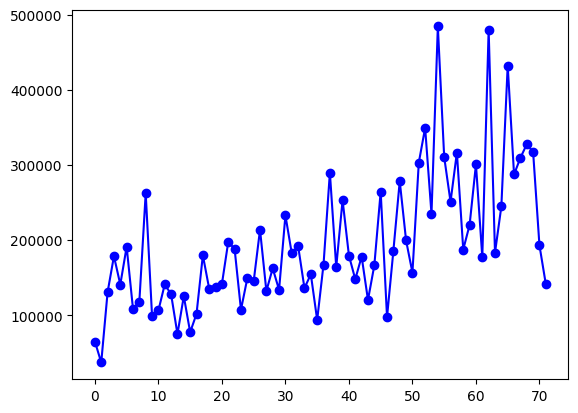

In [45]:
plt.plot(monthly_sales['Total Selling Price'], color='blue', marker='o')

### Monthly Based

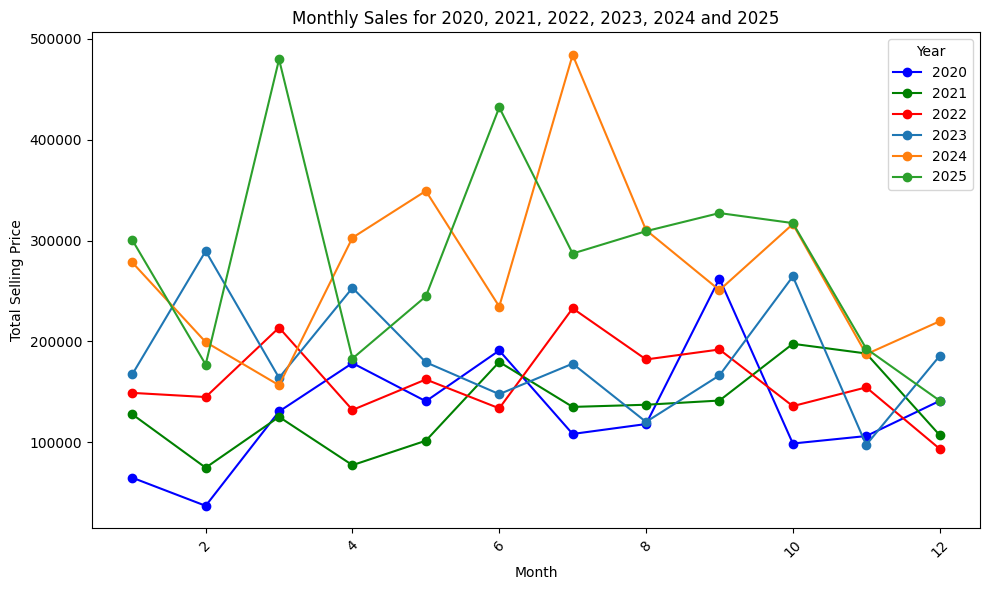

In [46]:
import matplotlib.pyplot as plt

# Filter data for 2020, 2021, and 2022
monthly_sales_2020 = monthly_sales[monthly_sales["Year"] == 2020]
monthly_sales_2021 = monthly_sales[monthly_sales["Year"] == 2021]
monthly_sales_2022 = monthly_sales[monthly_sales["Year"] == 2022]
monthly_sales_2023 = monthly_sales[monthly_sales["Year"] == 2023]
monthly_sales_2024 = monthly_sales[monthly_sales["Year"] == 2024]
monthly_sales_2025 = monthly_sales[monthly_sales["Year"] == 2025]

# Plotting the data for each year
plt.figure(figsize=(10, 6))

# Plot for 2020
plt.plot(monthly_sales_2020['Month'], monthly_sales_2020['Total Selling Price'], 
         color='blue', marker='o', label='2020')

# Plot for 2021
plt.plot(monthly_sales_2021['Month'], monthly_sales_2021['Total Selling Price'], 
         color='green', marker='o', label='2021')

# Plot for 2022
plt.plot(monthly_sales_2022['Month'], monthly_sales_2022['Total Selling Price'], 
         color='red', marker='o', label='2022')


# Plot for 2023
plt.plot(monthly_sales_2023['Month'], monthly_sales_2023['Total Selling Price'], 
         marker='o', label='2023')

# Plot for 2024
plt.plot(monthly_sales_2024['Month'], monthly_sales_2024['Total Selling Price'], 
         marker='o', label='2024')

# Plot for 2025
plt.plot(monthly_sales_2025['Month'], monthly_sales_2025['Total Selling Price'], 
         marker='o', label='2025')


# Adding titles and labels
plt.title('Monthly Sales for 2020, 2021, 2022, 2023, 2024 and 2025')
plt.xlabel('Month')
plt.ylabel('Total Selling Price')

# Add legend
plt.legend(title="Year")

# Rotate month labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### Quarterly Based

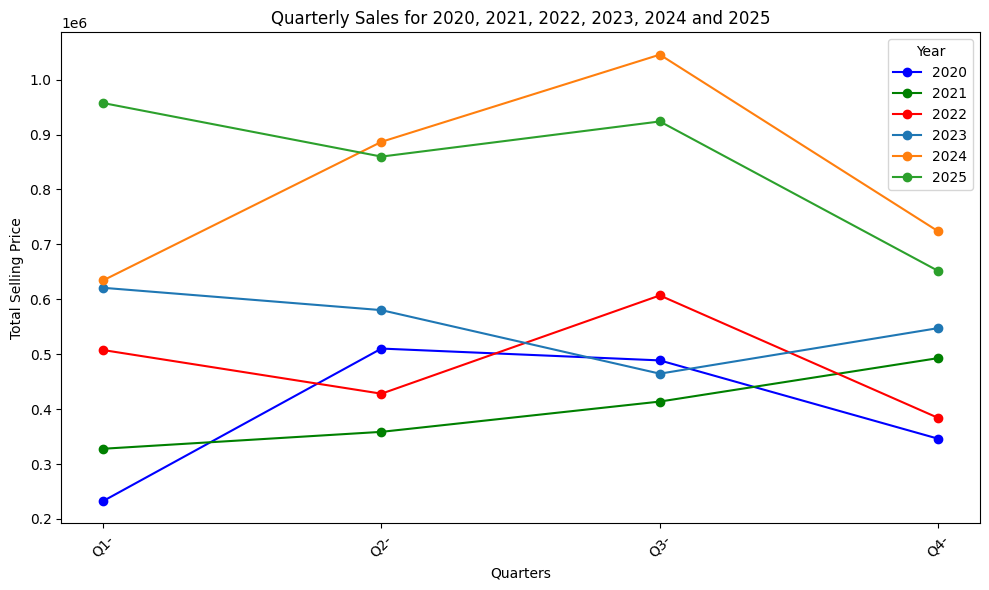

In [47]:
original_df['Quarters'] = pd.PeriodIndex(original_df['Date'], freq='Q').strftime('Q%q-')

Quarterly_sales = original_df.groupby(['Year','Quarters'])['Total Selling Price'].sum().reset_index()


Quarterly_sales_2020 = Quarterly_sales[Quarterly_sales["Year"] == 2020]
Quarterly_sales_2021 = Quarterly_sales[Quarterly_sales["Year"] == 2021]
Quarterly_sales_2022 = Quarterly_sales[Quarterly_sales["Year"] == 2022]
Quarterly_sales_2023 = Quarterly_sales[Quarterly_sales["Year"] == 2023]
Quarterly_sales_2024 = Quarterly_sales[Quarterly_sales["Year"] == 2024]
Quarterly_sales_2025 = Quarterly_sales[Quarterly_sales["Year"] == 2025]


# Plotting the data for each year
plt.figure(figsize=(10, 6))

# Plot for 2020
plt.plot(Quarterly_sales_2020['Quarters'], Quarterly_sales_2020['Total Selling Price'], 
         color='blue', marker='o', label='2020')

# Plot for 2021
plt.plot(Quarterly_sales_2021['Quarters'], Quarterly_sales_2021['Total Selling Price'], 
         color='green', marker='o', label='2021')

# Plot for 2022
plt.plot(Quarterly_sales_2022['Quarters'], Quarterly_sales_2022['Total Selling Price'], 
         color='red', marker='o', label='2022')


# Plot for 2023
plt.plot(Quarterly_sales_2023['Quarters'], Quarterly_sales_2023['Total Selling Price'], 
         marker='o', label='2023')

# Plot for 2024
plt.plot(Quarterly_sales_2024['Quarters'], Quarterly_sales_2024['Total Selling Price'], 
         marker='o', label='2024')

# Plot for 2025
plt.plot(Quarterly_sales_2025['Quarters'], Quarterly_sales_2025['Total Selling Price'], 
         marker='o', label='2025')


# Adding titles and labels
plt.title('Quarterly Sales for 2020, 2021, 2022, 2023, 2024 and 2025')
plt.xlabel('Quarters')
plt.ylabel('Total Selling Price')

# Add legend
plt.legend(title="Year")

# Rotate month labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# 6. Pricing & Cost Metrics

### Average Unit Price per Product

In [48]:
original_df.groupby('Product Name')['Total Selling Price'].sum().reset_index().sort_values(by='Total Selling Price', ascending=False).head(20)

,Product Name,Total Selling Price
150,جوانتي لاتكس,1262895.4
367,فكريل واحد راوند متر,858201.1
393,فكريل ٢ راوند متر,747150
155,جوانتي لاتكس لارج,693519.0
81,بلاستر طبي ١٠سم,434222.351373
515,كانيولا اصفر مقاس ٢٤,420526.5
1,ابر اسباينال برتقالي مقاس ٢٥,418478.62
377,فكريل ٠/٢ قاطع,330533
506,كابل دياثيرم,317170.058824
143,جهاز وريد,312019.366


In [49]:
def calculate_growth_rates(original_df, product_name):
    """
    Calculate the average buying price, average selling price, and their growth rates for a given product.
    
    Parameters:
    - original_df: The dataframe containing sales data
    - product_name: The name of the product for which the analysis should be done
    
    Returns:
    - DataFrame with the calculated average prices and growth rates
    """
    
    # Filter data for the given product
    product_data = original_df[original_df['Product Name'] == product_name]

    # Group by Year and Product Name, and calculate the necessary metrics
    product_avg = product_data.groupby(['Year', 'Product Name']).apply(
        lambda x: pd.Series({
            'Average Buying Price': ((x['Buying Price'] * x['Qty.']).sum() / x['Qty.'].sum()),  # Average Buying Price
            'Average Selling Price': (x['Total Selling Price'].sum() / x['Qty.'].sum())  # Average Selling Price
        })
    ).reset_index()

    # Calculate Growth Rates
    product_avg['Buying Growth Rate'] = product_avg['Average Buying Price'].pct_change() * 100  # Growth Rate for Buying Price
    product_avg['Selling Growth Rate'] = product_avg['Average Selling Price'].pct_change() * 100  # Growth Rate for Selling Price

    # Reorder columns in the desired order
    product_avg = product_avg[['Year', 'Product Name', 'Average Buying Price', 'Buying Growth Rate', 'Average Selling Price', 'Selling Growth Rate']]

    # Return the final result rounded to 2 decimal places
    return product_avg.round(2)




In [50]:
latex_product_avg = calculate_growth_rates(original_df, 'جوانتي لاتكس')
latex_product_avg

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/2329619282.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg = product_data.groupby(['Year', 'Product Name']).apply(


,Year,Product Name,Average Buying Price,Buying Growth Rate,Average Selling Price,Selling Growth Rate
0,2020,جوانتي لاتكس,95.52,NaN,103.69,NaN
1,2021,جوانتي لاتكس,119.11,24.69,126.67,22.16
2,2022,جوانتي لاتكس,71.14,-40.27,85.46,-32.54
3,2023,جوانتي لاتكس,86.93,22.20,97.38,13.96
4,2024,جوانتي لاتكس,169.62,95.12,180.46,85.31
5,2025,جوانتي لاتكس,133.33,-21.39,140.33,-22.24


In [51]:
Vicryl_product_avg = calculate_growth_rates(original_df,'فكريل واحد راوند متر')
Vicryl_product_avg


/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/2329619282.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg = product_data.groupby(['Year', 'Product Name']).apply(


,Year,Product Name,Average Buying Price,Buying Growth Rate,Average Selling Price,Selling Growth Rate
0,2020,فكريل واحد راوند متر,200.44,NaN,211.51,NaN
1,2021,فكريل واحد راوند متر,171.67,-14.35,178.84,-15.45
2,2022,فكريل واحد راوند متر,207.99,21.16,227.86,27.40
3,2023,فكريل واحد راوند متر,389.11,87.08,411.51,80.60
4,2024,فكريل واحد راوند متر,684.59,75.94,727.78,76.86
5,2025,فكريل واحد راوند متر,639.12,-6.64,706.38,-2.94


In [52]:
Plaster_product_avg = calculate_growth_rates(original_df, 'بلاستر طبي ١٠سم')

Plaster_product_avg

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/2329619282.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg = product_data.groupby(['Year', 'Product Name']).apply(


,Year,Product Name,Average Buying Price,Buying Growth Rate,Average Selling Price,Selling Growth Rate
0,2020,بلاستر طبي ١٠سم,18.99,NaN,19.64,NaN
1,2021,بلاستر طبي ١٠سم,18.88,-0.58,19.84,1.01
2,2022,بلاستر طبي ١٠سم,22.95,21.55,26.24,32.29
3,2023,بلاستر طبي ١٠سم,35.83,56.11,38.92,48.31
4,2024,بلاستر طبي ١٠سم,49.22,37.39,53.73,38.06
5,2025,بلاستر طبي ١٠سم,54.54,10.81,58.98,9.76


In [53]:
Cannula_product_avg = calculate_growth_rates(original_df, 'كانيولا اصفر مقاس ٢٤')
Cannula_product_avg

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/2329619282.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg = product_data.groupby(['Year', 'Product Name']).apply(


,Year,Product Name,Average Buying Price,Buying Growth Rate,Average Selling Price,Selling Growth Rate
0,2020,كانيولا اصفر مقاس ٢٤,256.13,NaN,274.49,NaN
1,2021,كانيولا اصفر مقاس ٢٤,281.02,9.72,300.11,9.34
2,2022,كانيولا اصفر مقاس ٢٤,327.24,16.44,374.68,24.85
3,2023,كانيولا اصفر مقاس ٢٤,483.58,47.78,517.35,38.08
4,2024,كانيولا اصفر مقاس ٢٤,838.31,73.36,894.81,72.96
5,2025,كانيولا اصفر مقاس ٢٤,197.45,-76.45,211.72,-76.34


In [54]:
Spinal_product_avg = calculate_growth_rates(original_df, 'ابر اسباينال برتقالي مقاس ٢٥')
Spinal_product_avg

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/2329619282.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg = product_data.groupby(['Year', 'Product Name']).apply(


,Year,Product Name,Average Buying Price,Buying Growth Rate,Average Selling Price,Selling Growth Rate
0,2020,ابر اسباينال برتقالي مقاس ٢٥,19.05,NaN,21.21,NaN
1,2021,ابر اسباينال برتقالي مقاس ٢٥,15.55,-18.39,17.27,-18.57
2,2022,ابر اسباينال برتقالي مقاس ٢٥,24.18,55.49,27.31,58.11
3,2023,ابر اسباينال برتقالي مقاس ٢٥,28.28,16.98,32.70,19.71
4,2024,ابر اسباينال برتقالي مقاس ٢٥,44.55,57.52,50.20,53.53
5,2025,ابر اسباينال برتقالي مقاس ٢٥,38.17,-14.33,43.11,-14.12


### Category Avg

In [55]:
original_df.groupby('Category')['Total Selling Price'].sum().reset_index().sort_values(by='Total Selling Price', ascending=False).head(20)

,Category,Total Selling Price
199,Vicryl,2420092.8112
103,Latex,2265399.4
93,IV Cannula,835313.8
166,Sterile Gloves,629604.35
136,Plaster,565979.601373
162,Spinal,554362.56
184,Syringe,382638.864259
58,Diathermy Cable,372471.058824
178,Surgical Gown,356531
52,Dialysis Filter,323272.0


In [56]:
def calculate_category_growth_rates(original_df, product_name):
    """
    Calculate the average buying price, average selling price, and their growth rates for a given product.
    
    Parameters:
    - original_df: The dataframe containing sales data
    - product_name: The name of the product for which the analysis should be done
    
    Returns:
    - DataFrame with the calculated average prices and growth rates
    """
    
    # Filter data for the given product
    product_data = original_df[original_df['Category'] == product_name]

    # Group by Year and Product Name, and calculate the necessary metrics
    product_avg = product_data.groupby(['Year', 'Category']).apply(
        lambda x: pd.Series({
            'Average Buying Price': ((x['Buying Price'] * x['Qty.']).sum() / x['Qty.'].sum()),  # Average Buying Price
            'Average Selling Price': (x['Total Selling Price'].sum() / x['Qty.'].sum())  # Average Selling Price
        })
    ).reset_index()

    # Calculate Growth Rates
    product_avg['Buying Growth Rate'] = product_avg['Average Buying Price'].pct_change() * 100  # Growth Rate for Buying Price
    product_avg['Selling Growth Rate'] = product_avg['Average Selling Price'].pct_change() * 100  # Growth Rate for Selling Price

    # Reorder columns in the desired order
    product_avg = product_avg[['Year', 'Category', 'Average Buying Price', 'Buying Growth Rate', 'Average Selling Price', 'Selling Growth Rate']]

    # Return the final result rounded to 2 decimal places
    return product_avg.round(2)



In [57]:

latex_avg = calculate_category_growth_rates(original_df, 'Latex')
latex_avg

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/3309269125.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg = product_data.groupby(['Year', 'Category']).apply(


,Year,Category,Average Buying Price,Buying Growth Rate,Average Selling Price,Selling Growth Rate
0,2020,Latex,96.13,NaN,104.20,NaN
1,2021,Latex,116.40,21.09,125.09,20.05
2,2022,Latex,70.46,-39.47,83.65,-33.13
3,2023,Latex,89.84,27.50,99.96,19.50
4,2024,Latex,168.98,88.10,179.69,79.77
5,2025,Latex,141.40,-16.32,152.70,-15.02


In [58]:
Vicryl_avg = calculate_category_growth_rates(original_df, 'Vicryl')
Vicryl_avg

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/3309269125.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg = product_data.groupby(['Year', 'Category']).apply(


,Year,Category,Average Buying Price,Buying Growth Rate,Average Selling Price,Selling Growth Rate
0,2020,Vicryl,197.18,NaN,209.08,NaN
1,2021,Vicryl,173.90,-11.80,182.98,-12.48
2,2022,Vicryl,226.38,30.18,248.69,35.91
3,2023,Vicryl,406.84,79.72,440.30,77.05
4,2024,Vicryl,702.22,72.60,767.19,74.24
5,2025,Vicryl,663.35,-5.53,734.69,-4.24


In [59]:
calculate_category_growth_rates(original_df, 'Spinal')

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/3309269125.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg = product_data.groupby(['Year', 'Category']).apply(


,Year,Category,Average Buying Price,Buying Growth Rate,Average Selling Price,Selling Growth Rate
0,2020,Spinal,18.96,NaN,21.11,NaN
1,2021,Spinal,15.98,-15.72,17.74,-15.94
2,2022,Spinal,23.68,48.20,26.93,51.77
3,2023,Spinal,27.21,14.89,31.86,18.30
4,2024,Spinal,44.00,61.72,49.59,55.65
5,2025,Spinal,38.19,-13.21,43.22,-12.84


In [60]:
calculate_category_growth_rates(original_df, 'IV Cannula')

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/3309269125.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_avg = product_data.groupby(['Year', 'Category']).apply(


,Year,Category,Average Buying Price,Buying Growth Rate,Average Selling Price,Selling Growth Rate
0,2020,IV Cannula,232.17,NaN,252.45,NaN
1,2021,IV Cannula,258.25,11.23,281.55,11.53
2,2022,IV Cannula,263.82,2.16,305.77,8.60
3,2023,IV Cannula,436.44,65.43,475.48,55.50
4,2024,IV Cannula,798.54,82.97,861.75,81.24
5,2025,IV Cannula,60.73,-92.39,66.42,-92.29


### Discount / Markup Analysis


In [61]:
Profit_margin_category.head(10)

,index,Category,Profit_sum,Selling_sum,Profit_Margin
0,199,Vicryl,211215.9912,2420092.8112,8.727599
1,103,Latex,196966.65,2265399.4,8.694566
2,93,IV Cannula,72762.0,835313.8,8.710738
3,166,Sterile Gloves,67800.55,629604.35,10.768755
4,162,Spinal,65783.31,554362.56,11.866478
5,136,Plaster,48109.501373,565979.601373,8.500218
6,52,Dialysis Filter,43599.4,323272.0,13.486909
7,178,Surgical Gown,42903,356531,12.033456
8,58,Diathermy Cable,39822.258824,372471.058824,10.69137
9,4,Alcohol,37870.304902,163567.254902,23.152742


### Price Variance

In [62]:

def calculate_price_variance(original_df, product_name):
    """
    Calculate the price variance over time (standard deviation and coefficient of variation)
    for a given product.
    
    Parameters:
    - original_df: The dataframe containing sales data
    - product_name: The name of the product for which the analysis should be done
    
    Returns:
    - DataFrame with price variance and price volatility metrics
    """
    
    # Filter data for the given product
    product_data = original_df[original_df['Category'] == product_name]
    
    # Group by Year (or any other time period like Month) and calculate Average Unit Price
    product_data['Average Unit Price'] = product_data['Total Selling Price'] / product_data['Qty.']
    
    # Group by Year to calculate the variance and standard deviation
    price_variance = product_data.groupby('Year')['Average Unit Price'].agg(['mean', 'std', 'var'])
    
    # Calculate the Coefficient of Variation (CV) as (standard deviation / mean) * 100
    price_variance['CV'] = (price_variance['std'] / price_variance['mean']) * 100
    
    # Rename columns for clarity
    price_variance.rename(columns={'mean': 'Average Unit Price', 'std': 'Price Standard Deviation', 'var': 'Price Variance'}, inplace=True)
    
    # Return the result rounded to 2 decimal places
    return price_variance.round(2)

# Example usage:
product_price_variance = calculate_price_variance(original_df, 'Latex')
product_price_variance


/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/91712918.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Average Unit Price'] = product_data['Total Selling Price'] / product_data['Qty.']


,Average Unit Price,Price Standard Deviation,Price Variance,CV
Year,,,,
2020,104.641026,31.30,979.947386,29.915715
2021,133.388889,30.76,945.919556,23.057247
2022,86.355088,13.17,173.552818,15.255551
2023,98.920455,14.06,197.632937,14.211619
2024,176.694915,28.69,823.112215,16.236988
2025,153.336744,7.29,53.137161,4.753932


### Products with Low / Negative Margins

In [63]:
Profit_margin_category.sort_values(by= 'Profit_Margin', ascending= False).head(50)

,index,Category,Profit_sum,Selling_sum,Profit_Margin
36,21,Biological Detector,6910,15820,43.678887
147,189,Testes Belt,176.54,571.94,30.866874
141,74,Face Sheild,230,750,30.666667
99,108,Makentosh,883.7,2986.5,29.589821
161,61,Doctor Crocs,80,280,28.571429
196,104,Linor,6.5,25,26.0
129,78,Fogarty Catheter,350,1350,25.925926
114,171,Sterilization Towels,510,2000,25.5
172,20,Binoculars,50.07,200.07,25.026241
193,139,Potassium Permengnate,13.352,53.352,25.026241


# ⚖️ 8. Efficiency & Operational Metrics


### Avg. Total Price per invoice.
### Profit per Invoice
### Avg. profit per invoice.
### Productivity per Customer / Supplier
### Ratio of sales & profit contributed by each stakeholder.

In [64]:
Customer_data.head(10)

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,AOV,Purchase_Frequency,Gross_Margin,CLV
63,Taha Yasen,3197782.06,344990.64,351,238,97,6,139797,10.788435,9110.490199,58.500000,0.107884,383322.933333
38,Jasmin,2999293.25,340480.1,112,118,53,3,78411,11.352011,26779.404018,37.333333,0.11352,756622.444444
36,Hemeda,1631108.9,170082.97,238,238,99,6,92641.64,10.427444,6853.398739,39.666667,0.104274,188981.077778
9,Bnoon,1196362,90045.5,54,23,15,6,38906,7.52661,22154.851852,9.000000,0.075266,100050.555556
33,Galal,751414.2228,128088.3928,82,335,104,3,39593,17.046309,9163.588083,27.333333,0.170463,284640.872889
24,El Asema,661981.478431,75005.698431,90,146,72,4,42308,11.330483,7355.34976,22.500000,0.113305,125009.497386
55,Royal,367168.0,28200.0,24,40,18,3,7011,7.680408,15298.666667,8.000000,0.076804,62666.666667
30,El Safwa,366641.91,34749.08,102,256,95,4,26651,9.477662,3594.528529,25.500000,0.094777,57915.133333
6,Amina,345451.0,14245.5,27,27,17,3,8878,4.12374,12794.481481,9.000000,0.041237,31656.666667
2,Adam Banha,210665.0,30296.55,165,17,11,3,7705,14.381388,1276.757576,55.000000,0.143814,67325.666667


In [65]:
Supplier_revenue_profit.head(10)

,index,Supplier,Profit_sum,Buying_sum,contribution_margin
0,80,Safa,443862.32,4308867.03,10.301138
1,57,Kareem,318391.373329,2615762.16,12.172031
2,39,El Yosr,75179.614,708964.45,10.604144
3,9,Amazon,35662.0,403125.75,8.846371
4,46,FOX,33103.02,369255.75,8.964795
5,5,Ahmed Mongey,59325.5,342421.5,17.325285
6,2,Abd El Hamid,47676.663922,341824.98,13.947683
7,26,El Hanafy,52732.95,293793.5,17.948985
8,7,Al Moaeez,36996.33,287530.76,12.866912
9,67,Motakhssoon,45623.4,284004.5,16.064323


# 📌 9. Strategic & Risk Insights
## Concentration Risk
### Too much reliance on 1 product, supplier, or customer.
## Profit Dependency Risk
### If 70% of profits come from 3 products, that’s risky.
## Slow-Moving Products
### Products with low sales/units.
## Potential Substitutes
### Compare similar sutures (3/0 vs. 5/0) and identify if customers shift.

In [66]:
total_profits_by_year

,Year,Profit,Growth Rate
0,2020,153163.8875,NaN
1,2021,142369.188431,-7.047810
2,2022,272364.6228,91.308685
3,2023,259498.91,-4.723709
4,2024,324551.23,25.068437
5,2025,329935.86,1.659100


In [67]:
Profit_yearly_category = original_df.groupby(['Year','Category']).agg(Profit_sum=("Profit", "sum"),
                                                 Selling_sum=("Total Selling Price", "sum")).reset_index().sort_values(by='Profit_sum', ascending=False).reset_index()

Profit_yearly_category["Profit_Margin"] = Profit_yearly_category["Profit_sum"] / Profit_yearly_category["Selling_sum"]*100

Profit_yearly_category.head(10)

,index,Year,Category,Profit_sum,Selling_sum,Profit_Margin
0,704,2025,Vicryl,98373.0,1013131.5,9.709796
1,602,2024,Vicryl,71989.4,850045.4,8.468889
2,332,2022,Latex,55431.4,351572.4,15.76671
3,658,2025,Latex,39367.0,531869.0,7.401635
4,653,2025,IV Cannula,34196.0,399626.0,8.557001
5,556,2024,Latex,34110,572315,5.960005
6,450,2023,Latex,33167,327653,10.122599
7,503,2023,Vicryl,26965,354882,7.5983
8,533,2024,Dialysis Filter,26750,179690,14.886749
9,199,2021,Latex,21226,305583,6.946067


In [68]:
Profit_Dependency_Risk = Profit_yearly_category.merge(total_profits_by_year[['Year','Profit']], on='Year', how='left')
Profit_Dependency_Risk['Category Profit Dependence %'] = Profit_Dependency_Risk['Profit_sum'] / Profit_Dependency_Risk['Profit'] * 100
Profit_Dependency_Risk = Profit_Dependency_Risk.sort_values(by=(['Year','Category Profit Dependence %']), ascending=False)
Profit_Dependency_Risk['Category Profit Dependence %'] = pd.to_numeric(Profit_Dependency_Risk['Category Profit Dependence %'], errors='coerce')
Profit_Dependency_Risk['Cumalative_Profit_Dependency_%'] = Profit_Dependency_Risk.groupby('Year')['Category Profit Dependence %'].cumsum()

print(f"2020 profit dependency = {len(Profit_Dependency_Risk[(Profit_Dependency_Risk['Year'] == 2020) & (Profit_Dependency_Risk['Cumalative_Profit_Dependency_%'] <= 70)])}")
print(f"2021 profit dependency = {len(Profit_Dependency_Risk[(Profit_Dependency_Risk['Year'] == 2021) & (Profit_Dependency_Risk['Cumalative_Profit_Dependency_%'] <= 70)])}")
print(f"2022 profit dependency = {len(Profit_Dependency_Risk[(Profit_Dependency_Risk['Year'] == 2022) & (Profit_Dependency_Risk['Cumalative_Profit_Dependency_%'] <= 70)])}")
print(f"2023 profit dependency = {len(Profit_Dependency_Risk[(Profit_Dependency_Risk['Year'] == 2023) & (Profit_Dependency_Risk['Cumalative_Profit_Dependency_%'] <= 70)])}")
print(f"2024 profit dependency = {len(Profit_Dependency_Risk[(Profit_Dependency_Risk['Year'] == 2024) & (Profit_Dependency_Risk['Cumalative_Profit_Dependency_%'] <= 70)])}")
print(f"2025 profit dependency = {len(Profit_Dependency_Risk[(Profit_Dependency_Risk['Year'] == 2025) & (Profit_Dependency_Risk['Cumalative_Profit_Dependency_%'] <= 70)])}")


2020 profit dependency = 15
2021 profit dependency = 19
2022 profit dependency = 17
2023 profit dependency = 14
2024 profit dependency = 11
2025 profit dependency = 8


In [69]:
Profit_Dependency_Risk

,index,Year,Category,Profit_sum,Selling_sum,Profit_Margin,Profit,Category Profit Dependence %,Cumalative_Profit_Dependency_%
0,704,2025,Vicryl,98373.0,1013131.5,9.709796,329935.86,29.815795,29.815795
3,658,2025,Latex,39367.0,531869.0,7.401635,329935.86,11.931713,41.747508
4,653,2025,IV Cannula,34196.0,399626.0,8.557001,329935.86,10.364439,52.111947
11,688,2025,Spinal,17095.0,146945.0,11.633604,329935.86,5.181310,57.293257
28,678,2025,Prolene,11190.0,118725.0,9.425142,329935.86,3.391568,60.684825
...,...,...,...,...,...,...,...,...,...
697,54,2020,Hegama Cups,5,35,14.285714,153163.8875,0.003264,99.991839
698,29,2020,Deudenal Tube,5,125,4.0,153163.8875,0.003264,99.995103
700,121,2020,Tongue Depressor,4.5,42,10.714286,153163.8875,0.002938,99.998041
701,19,2020,CVP Ruler,3,42,7.142857,153163.8875,0.001959,100.000000


In [70]:
Profit_margin_category['Total_Profit'] = original_df['Profit'].sum()
Profit_margin_category['Profit_Contribution_%'] = Profit_margin_category['Profit_sum'] / Profit_margin_category['Total_Profit'] * 100
Profit_margin_category['Cumalative Profit Contribution'] = Profit_margin_category['Profit_Contribution_%'].cumsum()
Profit_margin_category.head(20)

,index,Category,Profit_sum,Selling_sum,Profit_Margin,Total_Profit,Profit_Contribution_%,Cumalative Profit Contribution
0,199,Vicryl,211215.9912,2420092.8112,8.727599,1.481884e+06,14.25321,14.25321
1,103,Latex,196966.65,2265399.4,8.694566,1.481884e+06,13.29164,27.54485
2,93,IV Cannula,72762.0,835313.8,8.710738,1.481884e+06,4.910102,32.454952
3,166,Sterile Gloves,67800.55,629604.35,10.768755,1.481884e+06,4.575295,37.030247
4,162,Spinal,65783.31,554362.56,11.866478,1.481884e+06,4.439168,41.469415
5,136,Plaster,48109.501373,565979.601373,8.500218,1.481884e+06,3.24651,44.715925
6,52,Dialysis Filter,43599.4,323272.0,13.486909,1.481884e+06,2.942161,47.658086
7,178,Surgical Gown,42903,356531,12.033456,1.481884e+06,2.895166,50.553252
8,58,Diathermy Cable,39822.258824,372471.058824,10.69137,1.481884e+06,2.687273,53.240525
9,4,Alcohol,37870.304902,163567.254902,23.152742,1.481884e+06,2.555552,55.796077


# 🏆 10. Advanced Analytical Models
## ABC Analysis
### → Classify products into:
### A = top 20% products giving 80% value
### B = mid-value
### C = long tail
## Pareto Analysis (80/20 Rule)
### → Find which 20% of customers or products bring 80% of profit.
## Forecasting Models
### → Use past 6 years to predict demand (time-series ML).
## Segmentation
### → Cluster suppliers/customers into strategic, high-volume, low-margin, etc.
## Profitability Heatmaps
### → Visual grid showing high/low profit by product × customer × supplier.

In [71]:
Top_10_category_by_sales = Profit_margin_category['Category'].head(10).to_list()
Top_10_category_by_sales

['Vicryl',
 'Latex',
 'IV Cannula',
 'Sterile Gloves',
 'Spinal',
 'Plaster',
 'Dialysis Filter',
 'Surgical Gown',
 'Diathermy Cable',
 'Alcohol']

In [72]:
Top_10_clients_by_sales = Customer_data['Client'].head(15).to_list()
Top_10_clients_by_sales

['Taha Yasen',
 'Jasmin',
 'Hemeda',
 'Bnoon',
 'Galal',
 'El Asema',
 'Royal',
 'El Safwa',
 'Amina',
 'Adam Banha',
 'SHARQA',
 'Montazah',
 'Salah Salem',
 'Cash Customer',
 'Hamdy El Sayed']

In [73]:
customer_data_2025 = original_df[original_df['Year'] == 2025]
customer_data_2025 = customer_data_2025.groupby('Client').agg(Sales_sum=("Total Selling Price", "sum"),
                                 Profit_sum=("Profit", "sum")).reset_index().sort_values(by='Sales_sum', ascending=False)   
customer_data_2025['Contribution Margin %'] = customer_data_2025['Profit_sum'] / customer_data_2025['Sales_sum'] * 100
customer_data_2025

,Client,Sales_sum,Profit_sum,Contribution Margin %
7,Jasmin,1289281.5,154577.5,11.98943
13,Taha Yasen,679153.96,88309.71,13.0029
3,Bnoon,579930,38307,6.605452
10,Royal,220313,13525,6.138993
11,SHARQA,185913.0,7981.25,4.293003
1,Amina,180897.5,4187.5,2.314847
6,Hemeda,74750,6294.5,8.420736
0,ADAM,55666,4431,7.959976
8,MEDECA HOSPITAL SHARM,47191.5,6918.85,14.661221
2,Arkan Center,29737.5,2792.75,9.391341


In [74]:
category_data_2025 = original_df[original_df['Year'] == 2025]
category_data_2025 = category_data_2025.groupby('Category').agg(Sales_sum=("Total Selling Price", "sum"),
                                 Profit_sum=("Profit", "sum")).reset_index().sort_values(by='Sales_sum', ascending=False)   
category_data_2025['Contribution Margin %'] = category_data_2025['Profit_sum'] / category_data_2025['Sales_sum'] * 100
category_data_2025

,Category,Sales_sum,Profit_sum,Contribution Margin %
101,Vicryl,1013131.5,98373.0,9.709796
55,Latex,531869.0,39367.0,7.401635
50,IV Cannula,399626.0,34196.0,8.557001
85,Spinal,146945.0,17095.0,11.633604
75,Prolene,118725.0,11190.0,9.425142
...,...,...,...,...
92,Surgical Pad,166,10,6.024096
40,Eye Patch,154,14,9.090909
88,Sterilization Paper,138,12,8.695652
79,Sample Cup,60,10,16.666667


In [75]:
customer_data_2025['Client'].to_list()

['Jasmin',
 'Taha Yasen',
 'Bnoon',
 'Royal',
 'SHARQA',
 'Amina',
 'Hemeda',
 'ADAM',
 'MEDECA HOSPITAL SHARM',
 'Arkan Center',
 'Cash Customer',
 'Sharqia ',
 'Eman Khairy',
 'Montazah']

In [76]:
pivot_table = original_df[(original_df['Category'].isin(category_data_2025['Category'].head(10).to_list())) & (original_df['Client'].isin(customer_data_2025['Client'].to_list()))].pivot_table(index='Category', columns='Client', values='Profit', aggfunc='sum')
pivot_table = pivot_table.apply(pd.to_numeric, errors='coerce')
pivot_table.round(0)


Client,ADAM,Amina,Arkan Center,Bnoon,Cash Customer,Eman Khairy,Hemeda,Jasmin,MEDECA HOSPITAL SHARM,Montazah,Royal,SHARQA,Sharqia,Taha Yasen
Category,,,,,,,,,,,,,,
IV Cannula,400.0,NaN,140.0,22405.0,90.0,NaN,4619.0,8555.0,345.0,559.0,NaN,725.0,270.0,21101.0
IV Set,72.0,1642.0,NaN,360.0,NaN,NaN,6190.0,8260.0,387.0,433.0,NaN,NaN,52.0,10372.0
Latex,NaN,50.0,104.0,34800.0,2288.0,NaN,22147.0,26810.0,780.0,285.0,6070.0,360.0,650.0,28342.0
Plaster,NaN,NaN,69.0,NaN,19.0,NaN,5477.0,19010.0,468.0,604.0,NaN,NaN,20.0,5237.0
Prolene,20.0,1518.0,NaN,NaN,NaN,NaN,1250.0,6534.0,225.0,261.0,1312.0,635.0,NaN,17426.0
Spinal,NaN,NaN,NaN,NaN,162.0,150.0,13838.0,16200.0,NaN,2108.0,NaN,NaN,1300.0,20395.0
Sterile Gloves,NaN,1960.0,265.0,NaN,NaN,NaN,21092.0,18795.0,NaN,2165.0,NaN,NaN,200.0,9422.0
Surgical Gown,NaN,NaN,NaN,NaN,661.0,2559.0,120.0,NaN,NaN,19.0,3060.0,2275.0,2885.0,NaN
Syringe,NaN,NaN,20.0,NaN,30.0,NaN,3242.0,7986.0,229.0,251.0,NaN,-247.0,14.0,4398.0


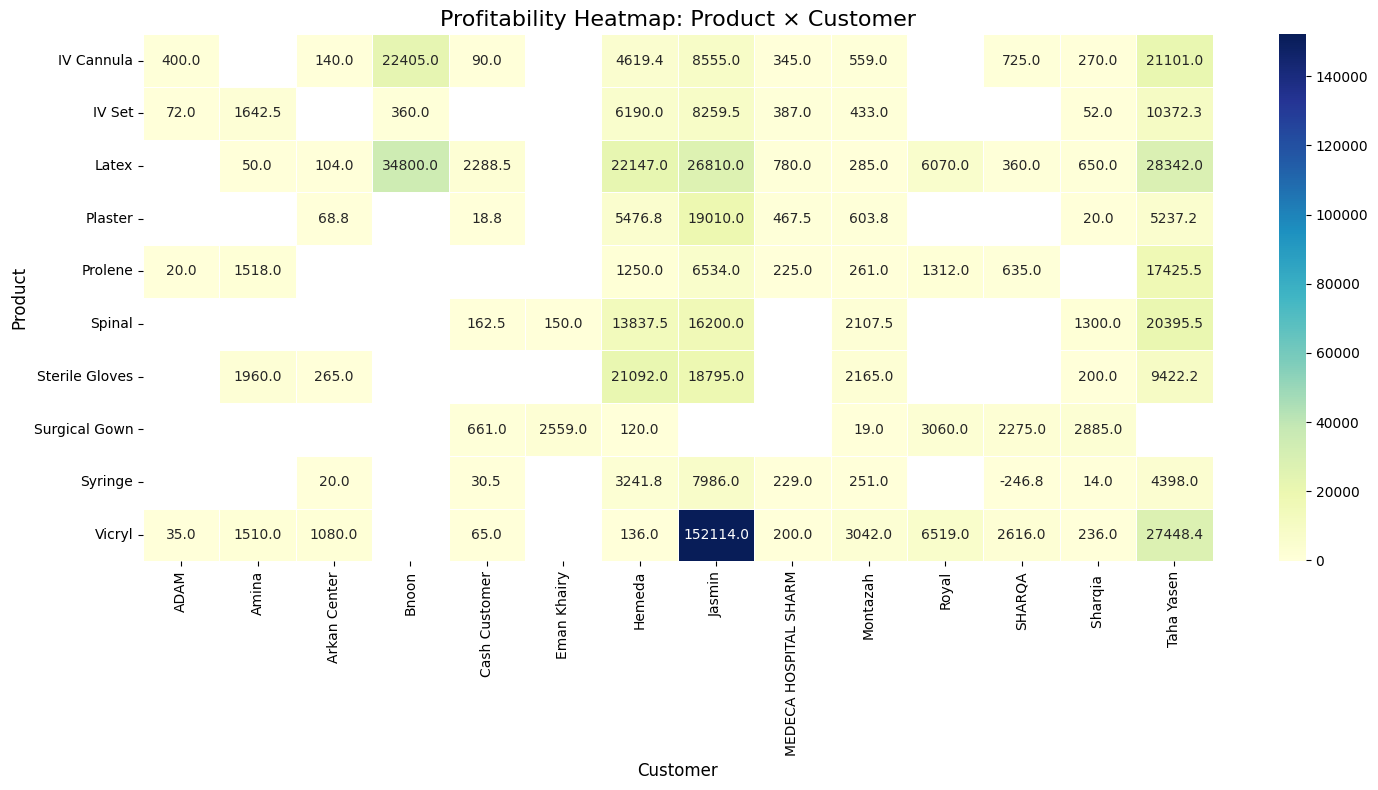

In [77]:
# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', linewidths=0.5, fmt='.1f')

# Add title and labels
plt.title('Profitability Heatmap: Product × Customer', fontsize=16)
plt.xlabel('Customer', fontsize=12)
plt.ylabel('Product', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# 📍 Complete Roadmap with KPIs & Charts


## Phase 1 – Business Problem Framing

👉 Goal: Define objectives, scope, and align analysis with business goals.

KPIs / Metrics

Total Revenue (by year, by customer, by product)

Customer Count & Retention

Market Share (if available)

High-level Expense vs Revenue ratio

Preferable Charts

Line Chart → Revenue trend (6 years)

Bar Chart → Revenue by customer segment

KPI Cards → Total Revenue, Customer Count, Profit %

Pie Chart → Expense vs Revenue breakdown


## Phase 2 – Data Preparation & Quality Check (Pandas)

👉 Goal: Ensure data is clean, accurate, and usable.

KPIs / Metrics

Missing Value % per column

Duplicate Records Count

Data Completeness %

Outliers detected in sales/expenses

Preferable Charts

Bar Chart → Missing values by column

Heatmap → Correlation between numeric fields (sales, expenses, collection, etc.)

Box Plot → Outlier detection in sales/profit

## Phase 3 – Descriptive Analytics (What happened?)

👉 Goal: Summarize historical performance.

KPIs / Metrics

Total Sales per Year / Month

Top 10 Customers by Sales

Top 10 Products by Profit Contribution

Collection Efficiency (Cash Collected ÷ Sales)

Expense Breakdown (fixed vs variable, marketing vs operations)

Preferable Charts

Line Chart → Monthly Sales Trend (seasonality check)

Pareto Chart → 80/20 analysis of customers/products

Stacked Bar → Expenses by category per year

Heatmap → Sales by month & year (seasonality patterns)
Phase 4 – Diagnostic Analytics (Why it happened?)
👉 Goal: Explain performance drivers and root causes.
KPIs / Metrics
Profitability by Customer Segment
Churn Rate (Lost Customers ÷ Previous Customers)
Gross Margin % Trend
Marketing ROI = (Revenue Attributed ÷ Marketing Spend)
Supplier Dependency Ratio (Top 3 Suppliers ÷ Total Purchases)
Preferable Charts
Waterfall Chart → Profit breakdown (Revenue → COGS → Expenses → Net Profit)
Line Chart → Churn trend over 6 years
Bar Chart → ROI by marketing campaign / budget usage
Donut Chart → Supplier dependency distribution
Phase 5 – Predictive Analytics (What will happen?)
👉 Goal: Use models & historical data to forecast.
KPIs / Metrics
Forecasted Sales (next 12–24 months)
Forecasted Collections vs Expenses
Customer Lifetime Value (CLV) prediction
Cash Flow Projection
Preferable Charts
Line Chart with Forecast Cone → Sales forecast with confidence interval
Area Chart → Cash inflow vs outflow forecast
Histogram → Predicted CLV distribution
Scenario Comparison Bars → Best case vs worst case forecast
Phase 6 – Prescriptive Analytics (What should we do?)
👉 Goal: Recommend optimal actions.
KPIs / Metrics
Optimal Marketing Spend Allocation
Target Customer Segments (High CLV, High Retention)
Supplier Negotiation Opportunities (discount gain %)
Cost Reduction Opportunities
Preferable Charts
Tornado Chart → Sensitivity analysis (impact of costs, discounts, churn)
Waterfall Chart → Profit improvement with recommended actions
Clustered Bar → Scenario comparison (baseline vs optimized)
Bubble Chart → Customer segmentation (Revenue vs Profit vs Retention)
🎯 Portfolio Tip
If you show:
Phase 1–4 in Python (Pandas + Matplotlib/Seaborn/Plotly) → proves strong analytical & technical skills.
Phase 5–6 in Power BI (interactive dashboards) → proves strong storytelling & business impact.
That way, you demonstrate the full data analytics lifecycle in your portfolio.

# Phase 1 – Business Problem Framing

### 1. High-level Revenue / Profit KPIs

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/2974638725.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  total_sales_by_year['Growth Rate'] = total_sales_by_year['Total Selling Price'].pct_change() * 100


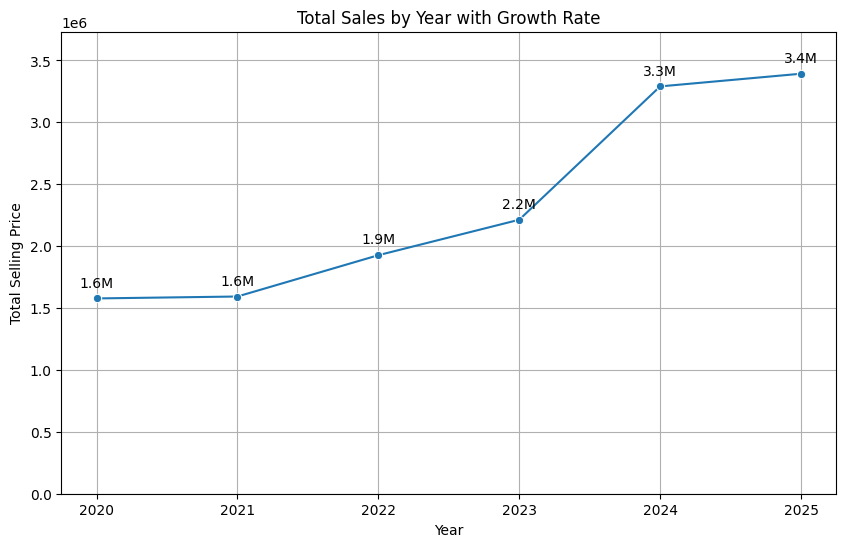

In [78]:
total_sales_by_year = original_df.groupby('Year')['Total Selling Price'].sum().reset_index()
total_sales_by_year['Growth Rate'] = total_sales_by_year['Total Selling Price'].pct_change() * 100

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Year', y='Total Selling Price', data=total_sales_by_year, marker='o')

# Offset value: adjust as needed
offset = total_sales_by_year['Total Selling Price'].max() * 0.02

for i, row in total_sales_by_year.iterrows():
    ax.text(row['Year'], row['Total Selling Price'] + offset, f"{row['Total Selling Price']/1000000:.1f}M", color='black', ha="center", va="bottom")
plt.title('Total Sales by Year with Growth Rate')
plt.xlabel('Year')
plt.ylabel('Total Selling Price')
plt.ylim(0, total_sales_by_year['Total Selling Price'].max() * 1.1)
plt.grid(True)
plt.show()

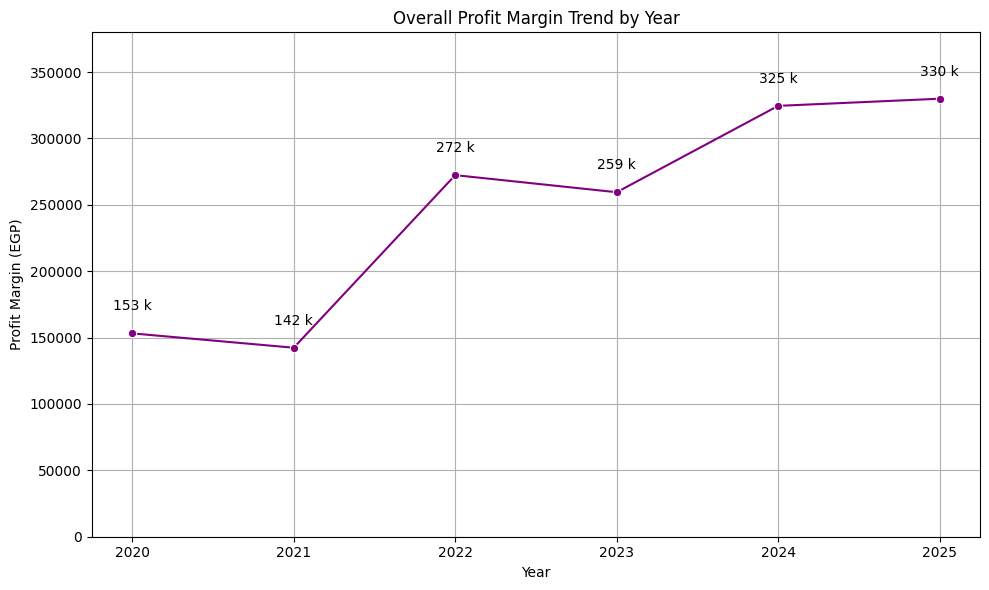

In [79]:
Profit_margin = (original_df.groupby("Year").agg(Profit_sum=("Profit", "sum"),
                                                 Selling_sum=("Total Selling Price", "sum"),
                                                    Buying_sum=("Total Buying Price", "sum")
    )
    .reset_index()
)
plt.figure(figsize=(10, 6))
sns.lineplot(data=Profit_margin, x='Year', y='Profit_sum', marker='o', color='purple')

# Add data labels
for i in range(len(Profit_margin)):
    year = Profit_margin.loc[i, 'Year']
    profit = Profit_margin.loc[i, 'Profit_sum']
    
    plt.text(year, profit + 15000, f'{profit/1000:.0f} k',  # Adds comma formatting and rounds to int
             ha='center', va='bottom', fontsize=10, color='black')
plt.title('Overall Profit Margin Trend by Year')
plt.xlabel('Year')
plt.ylabel('Profit Margin (EGP)')
plt.ylim(0, Profit_margin['Profit_sum'].max() + 50000)
plt.grid(True)
plt.tight_layout()
plt.show()

In [80]:
profit_pct = original_df['Profit'].sum() / original_df['Total Selling Price'].sum() * 100
print(f"Overall Profit Percentage: {profit_pct:.2f}%")

Overall Profit Percentage: 10.59%


In [81]:
original_df.groupby('Year').apply(lambda x: x['Profit'].sum() / x['Total Selling Price'].sum() * 100).reset_index(name='Profit Percentage')

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/2525905349.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  original_df.groupby('Year').apply(lambda x: x['Profit'].sum() / x['Total Selling Price'].sum() * 100).reset_index(name='Profit Percentage')


,Year,Profit Percentage
0,2020,9.708338
1,2021,8.936348
2,2022,14.135879
3,2023,11.723882
4,2024,9.863316
5,2025,9.724260


### Customer Count & Retention

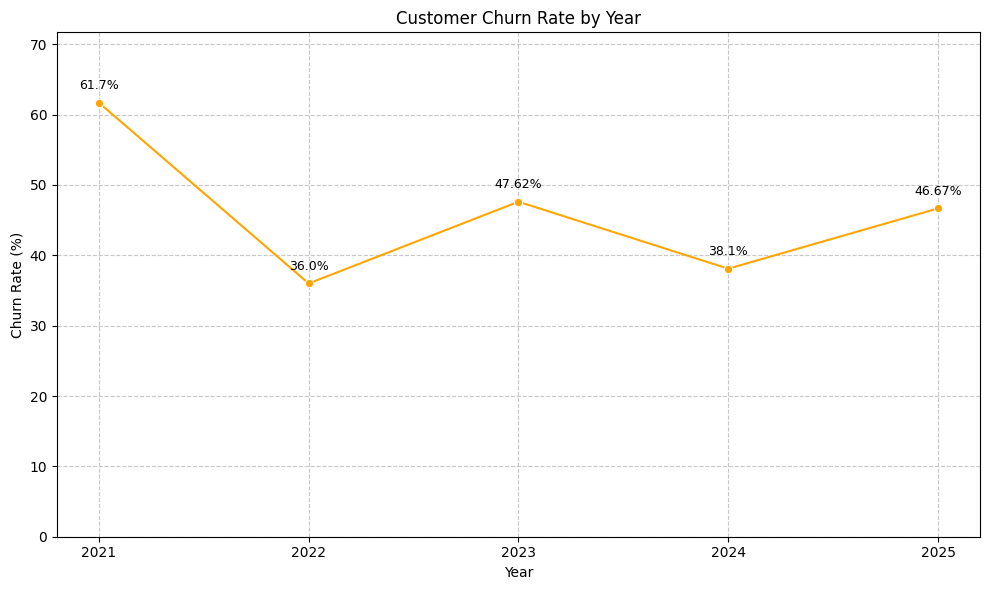

In [82]:
customers_per_year = original_df.groupby('Year')['Client'].unique().apply(set).reset_index()
customers_per_year

churn_data = []

for i in range(1, len(customers_per_year)):
    year = customers_per_year.loc[i, 'Year']
    current = customers_per_year.loc[i, 'Client']
    previous = customers_per_year.loc[i - 1, 'Client']
    
    lost = previous - current
    churn_rate = (len(lost) / len(previous)) * 100 if len(previous) > 0 else 0
    
    churn_data.append({
        'Year': year,
        'Customers at Start': len(previous),
        'Retained Customers': len(previous & current),
        'Lost Customers': len(lost),
        'new Customers': len(current - previous),
        'Churn Rate (%)': round(churn_rate, 2)
    })

churn_df = pd.DataFrame(churn_data)
churn_df

plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_df, x='Year', y='Churn Rate (%)', marker='o', color='orange')

# Add labels above each point
for i in range(len(churn_df)):
    year = churn_df.loc[i, 'Year']
    churn = churn_df.loc[i, 'Churn Rate (%)']
    
    plt.text(year, churn + 1.5, f'{churn}%',  # Adjust `+ 1.5` to lift the label slightly
             ha='center', va='bottom', fontsize=9, color='black')
    
plt.title('Customer Churn Rate by Year')
plt.xlabel('Year')
plt.ylabel('Churn Rate (%)')
plt.xticks(churn_df['Year'])
plt.ylim(0, churn_df['Churn Rate (%)'].max() + 10)  # Add some space above the max churn rate
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

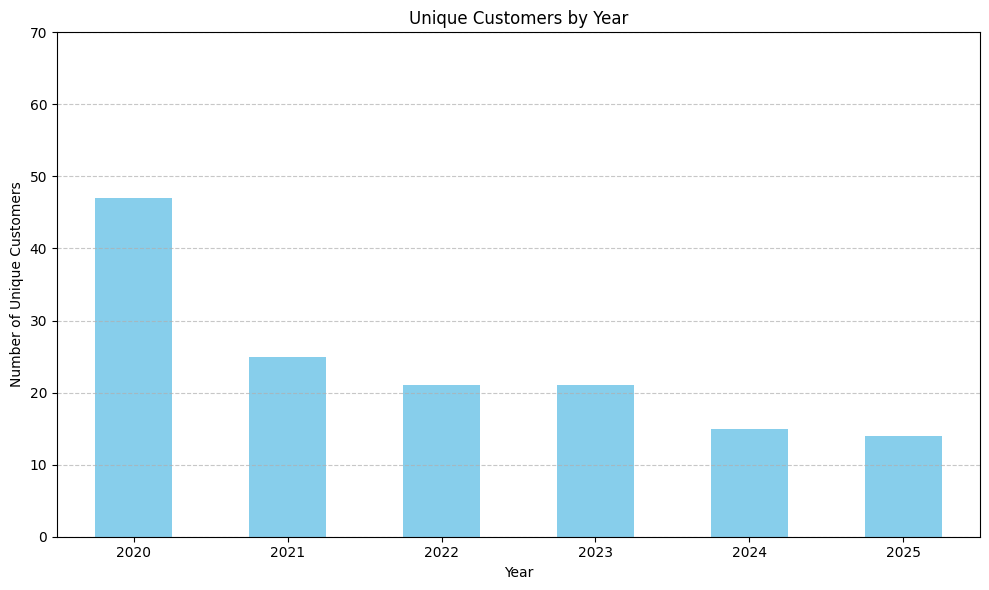

In [83]:
original_df.groupby('Year')['Client'].nunique().reset_index().plot(x='Year', y='Client', kind='bar', legend=False, figsize=(10, 6), color='skyblue')
plt.title('Unique Customers by Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=0)
plt.ylim(0, original_df['Client'].nunique() )
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [84]:
expenses_df['Year'] = pd.DatetimeIndex(expenses_df['Date']).year
expenses_df['Month'] = pd.DatetimeIndex(expenses_df['Date']).month

In [85]:
yearly_expenses = expenses_df.groupby('Year')['Cost'].sum().reset_index()
yearly_expenses

,Year,Cost
0,1970,115436.0
1,2020,141835
2,2021,174540
3,2022,239157
4,2023,304613
5,2024,330040
6,2025,358512.62


In [86]:
Profit_margin

,Year,Profit_sum,Selling_sum,Buying_sum
0,2020,153163.8875,1577652.9625,1424489.075
1,2021,142369.188431,1593147.228431,1450778.04
2,2022,272364.6228,1926761.1328,1654396.51
3,2023,259498.91,2213421.3,1953922.39
4,2024,324551.23,3290487.95,2965936.72
5,2025,329935.86,3392914.76,3062978.9


In [87]:
profit_expenses = Profit_margin[['Year','Profit_sum']].merge(yearly_expenses, on='Year', how='left')
profit_expenses.rename(columns={'Cost':'Total Expenses'}, inplace=True)

profit_expenses.set_index('Year', inplace=True)
profit_expenses

,Profit_sum,Total Expenses
Year,,
2020,153163.8875,141835
2021,142369.188431,174540
2022,272364.6228,239157
2023,259498.91,304613
2024,324551.23,330040
2025,329935.86,358512.62


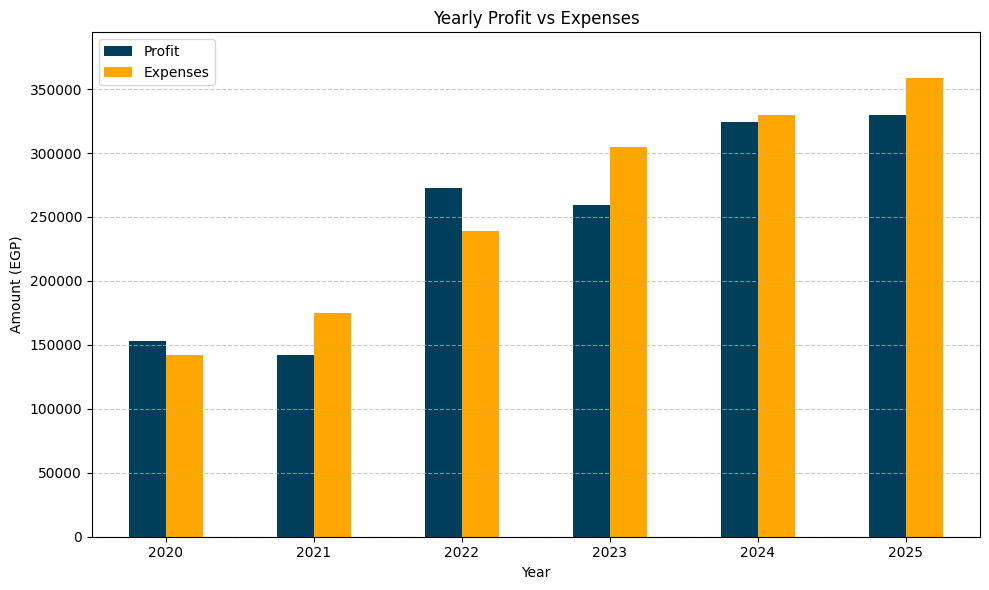

In [88]:
profit_expenses.plot(kind='bar', figsize=(10,6),color = ['#003f5c', '#ffa600'])
plt.title('Yearly Profit vs Expenses')
plt.xlabel('Year')
plt.ylabel('Amount (EGP)')
plt.xticks(rotation=0)
plt.ylim(0, max(profit_expenses['Profit_sum'].max(), profit_expenses['Total Expenses'].max()) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Profit', 'Expenses'])
plt.tight_layout()
plt.show()


In [89]:
profit_expenses.sum()

Profit_sum        1481883.698731
Total Expenses        1548697.62
dtype: object

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/1369646316.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  profit_expenses.sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors = ['#003f5c', '#ffa600'])


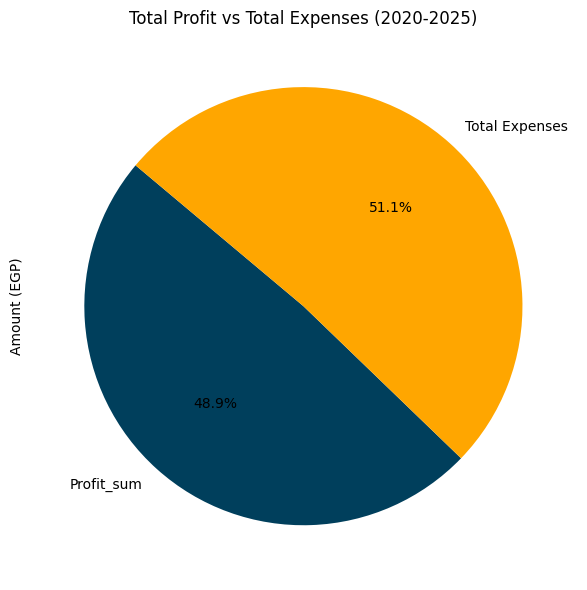

In [90]:
plt.figure(figsize=(10, 6))
profit_expenses.sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors = ['#003f5c', '#ffa600'])
plt.title('Total Profit vs Total Expenses (2020-2025)')
plt.ylabel('Amount (EGP)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

# Phase 2 – Data Preparation & Quality Check (Pandas)


In [91]:
original_df.isnull().sum()


0
Full Name                 0
MFG                    5191
Product Name              0
Size                   2432
Qty.                      0
Unit Selling Price        0
Total Selling Price       0
Supplier                  4
Buying Price              0
Client                    0
Invoice                   0
Date                      0
Invoice No                0
Profit                    0
Category                  0
Year                      0
Month                     0
Total Buying Price        0
Quarters                  0
dtype: int64

In [92]:
original_df[original_df['Supplier'].isnull()]

,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Category,Year,Month,Total Buying Price,Quarters
2376,ماسك N95,NaN,ماسك N95,NaN,50,65,3250,NaN,60,Taha Yasen,638,2021-03-18,638/2021,250,N95 Mask,2021,3,3000,Q1-
2501,ماسك طبي ٣ طبقات استك,NaN,ماسك طبي ٣ طبقات استك,NaN,3,28,84,NaN,40,Adam Banha,671,2021-04-18,671/2021,-36,Mask,2021,4,120,Q2-
2514,ماسك طبي ٣ طبقات استك,NaN,ماسك طبي ٣ طبقات استك,NaN,3,30,90,NaN,40,Hemeda,673,2021-04-18,673/2021,-30,Mask,2021,4,120,Q2-
2554,ماسك طبي ٣ طبقات استك,NaN,ماسك طبي ٣ طبقات استك,NaN,1,28,28,NaN,40,Adam Banha,686,2021-05-02,686/2021,-12,Mask,2021,5,40,Q2-


In [93]:
original_df[(original_df['Full Name'] == 'ماسك طبي ٣ طبقات') & (original_df['Buying Price'] == 40)]

,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Category,Year,Month,Total Buying Price,Quarters
1802,ماسك طبي ٣ طبقات,NaN,ماسك طبي ٣ طبقات,NaN,6,50,300,Abd El Hamid,40,Cash Customer,421,2020-10-28,421/2020,60,Mask,2020,10,240,Q4-
1804,ماسك طبي ٣ طبقات,NaN,ماسك طبي ٣ طبقات,NaN,20,50,1000,Abd El Hamid,40,Taha Yasen,422,2020-10-28,422/2020,200,Mask,2020,10,800,Q4-
1817,ماسك طبي ٣ طبقات,NaN,ماسك طبي ٣ طبقات,NaN,21,50,1050,Abd El Hamid,40,Adam Banha,430,2020-11-05,430/2020,210,Mask,2020,11,840,Q4-
1840,ماسك طبي ٣ طبقات,NaN,ماسك طبي ٣ طبقات,NaN,20,45,900,Abd El Hamid,40,El Ahl,442,2020-11-15,442/2020,100,Mask,2020,11,800,Q4-
2024,ماسك طبي ٣ طبقات,NaN,ماسك طبي ٣ طبقات,NaN,10,45,450,Abd El Hamid,40,Kamel Pharmacy,525,2020-12-29,525/2020,50,Mask,2020,12,400,Q4-
2054,ماسك طبي ٣ طبقات,NaN,ماسك طبي ٣ طبقات,NaN,2,50,100,Abd El Hamid,40,Bnoon,530,2020-12-31,530/2020,20,Mask,2020,12,80,Q4-


In [94]:
original_df.loc[[2502,2515,2556], 'Supplier'] = 'Abd El Hamid'

In [95]:
original_df[(original_df['Full Name'] == 'ماسك N95')]

,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Category,Year,Month,Total Buying Price,Quarters
382,ماسك N95,NaN,ماسك N95,NaN,210,56.25,11812.5,El Tayseer Purchaser,55,Zagazig University,68,2020-04-05,68/2020,262.5,N95 Mask,2020,4,11550,Q2-
1954,ماسك N95,NaN,ماسك N95,NaN,40,90,3600,El Tayseer Purchaser,85,Taha Yasen,496,2020-12-14,496/2020,200,N95 Mask,2020,12,3400,Q4-
2376,ماسك N95,NaN,ماسك N95,NaN,50,65,3250,NaN,60,Taha Yasen,638,2021-03-18,638/2021,250,N95 Mask,2021,3,3000,Q1-


In [96]:
original_df.loc[2377, 'Supplier'] = 'El Tayseer Purchaser'

In [97]:
original_df.isnull().sum()


0
Full Name                 0
MFG                    5191
Product Name              0
Size                   2432
Qty.                      0
Unit Selling Price        0
Total Selling Price       0
Supplier                  4
Buying Price              0
Client                    0
Invoice                   0
Date                      0
Invoice No                0
Profit                    0
Category                  0
Year                      0
Month                     0
Total Buying Price        0
Quarters                  0
dtype: int64

In [98]:
original_df.duplicated().sum()
original_df[original_df.duplicated()]

,Full Name,MFG,Product Name,Size,Qty.,Unit Selling Price,Total Selling Price,Supplier,Buying Price,Client,Invoice,Date,Invoice No,Profit,Category,Year,Month,Total Buying Price,Quarters
3550,ماسك اكسجين بالباج Ultra,Ultra,ماسك اكسجين بالباج,NaN,5,28,140,Kareem,25,Galal,841,2021-09-30,841/2021,15,Oxygen Mask,2021,9,125,Q3-
6399,جهاز وريد بكاوتشه كيو,كيو,جهاز وريد بكاوتشه,NaN,50,4.3,215,Kareem,3.1,Maghraby,77,2023-03-09,77/2023,60,IV Set,2023,3,155.0,Q1-
6400,رول تعقيم ٢٠سم GMS,GMS,رول تعقيم ٢٠سم,20cm,1,700,700,Kareem,397,Maghraby,77,2023-03-09,77/2023,303,Sterilization Roll,2023,3,397,Q1-
6401,اليكترود,NaN,اليكترود,NaN,100,1.4,140,Kareem,1.3,Maghraby,77,2023-03-09,77/2023,10,Electrode,2023,3,130.0,Q1-
6402,بكر رسم قلب ٦.٣سم,NaN,بكر رسم قلب ٦.٣سم,6.3cm,10,10,100,Kareem,9.5,Maghraby,77,2023-03-09,77/2023,5,ECG Roll,2023,3,95.0,Q1-
6403,شرائط سكر Glucodoctor,Glucodoctor,شرائط سكر,NaN,1,215,215,Kareem,190,Maghraby,77,2023-03-09,77/2023,25,Glucose Strips,2023,3,190,Q1-
6404,وصله ثلاثية Ultra,Ultra,وصله ثلاثية,NaN,75,5.2,390,Kareem,4.9,Maghraby,77,2023-03-09,77/2023,22.5,3Way Stopcock,2023,3,367.5,Q1-
6405,مشرط جراحي مقاس ٢٢,NaN,مشرط جراحي مقاس ٢٢,22,3,95,285,Kareem,90,Maghraby,77,2023-03-09,77/2023,15,Blades,2023,3,270,Q1-
6406,جبسونا ١٥سم صيني,صيني,جبسونا ١٥سم,15cm,12,17.5,210,Kareem,16,Maghraby,77,2023-03-09,77/2023,18,Gypsona,2023,3,192,Q1-
6410,كوب تعقيم,NaN,كوب تعقيم,NaN,500,1.25,625,Motakhssoon,1.1,Taha Yasen,78,2023-03-09,78/2023,75,Sample Cup,2023,3,550.0,Q1-


In [99]:
original_df = original_df.drop_duplicates()

In [100]:
original_df.duplicated().sum()


np.int64(0)

# Phase 3: Descriptive Analytics (What Happened?)
### The goal here is to summarize past performance clearly and visually. Each metric will highlight a specific part of your business (sales, customers, suppliers, finance).

## 🔑 Sales Metrics


### Total Sales Revenue (per Year/Quarter/Month)


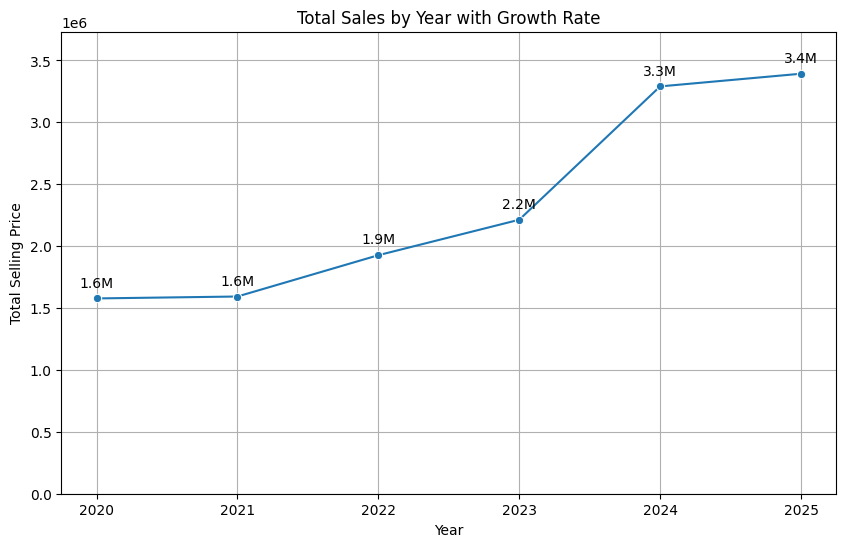

In [101]:
# total_sales_by_year = original_df.groupby('Year')['Total Selling Price'].sum().reset_index()
# total_sales_by_year['Growth Rate'] = total_sales_by_year['Total Selling Price'].pct_change() * 100

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Year', y='Total Selling Price', data=total_sales_by_year, marker='o')

# Offset value: adjust as needed
offset = total_sales_by_year['Total Selling Price'].max() * 0.02

for i, row in total_sales_by_year.iterrows():
    ax.text(row['Year'], row['Total Selling Price'] + offset, f"{row['Total Selling Price']/1000000:.1f}M", color='black', ha="center", va="bottom")
plt.title('Total Sales by Year with Growth Rate')
plt.xlabel('Year')
plt.ylabel('Total Selling Price')
plt.ylim(0, total_sales_by_year['Total Selling Price'].max() * 1.1)
plt.grid(True)
plt.show()

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/3952874912.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  total_sales_by_year['Growth Rate'] = total_sales_by_year['Total Selling Price'].pct_change() * 100


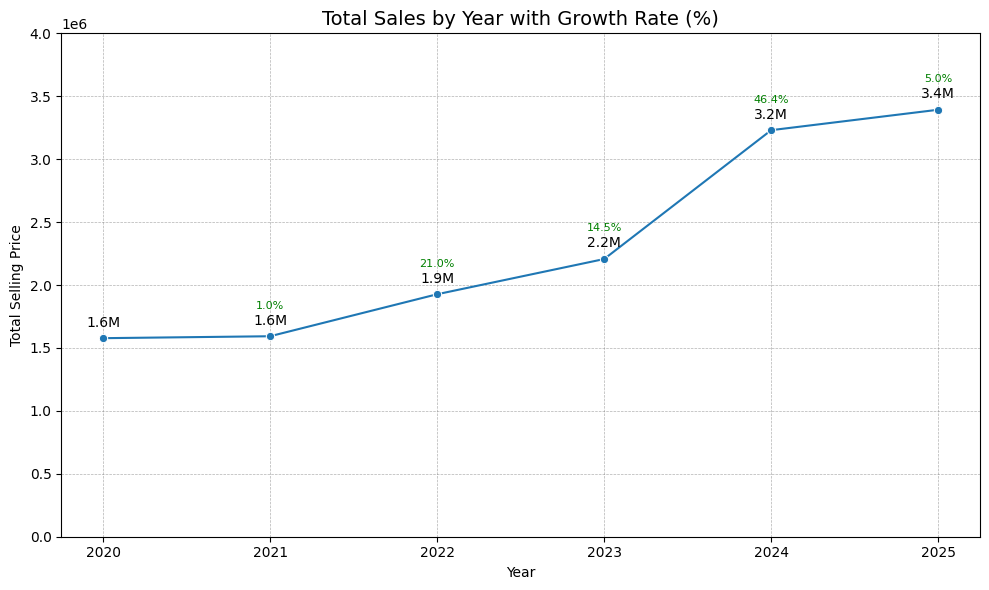

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Step 1: Group and calculate
total_sales_by_year = original_df.groupby('Year')['Total Selling Price'].sum().reset_index()
total_sales_by_year['Growth Rate'] = total_sales_by_year['Total Selling Price'].pct_change() * 100

# Step 2: Plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Year', y='Total Selling Price', data=total_sales_by_year, marker='o', ax=ax)

# Set y-axis ticks manually based on max value (in millions)
max_value = total_sales_by_year['Total Selling Price'].max()
tick_step = 1_000_000  # You can change this to 500_000 for more granularity
yticks = np.arange(0, max_value + tick_step, tick_step)

# Step 3: Add labels
offset = total_sales_by_year['Total Selling Price'].max() * 0.02

for i, row in total_sales_by_year.iterrows():
    # Sales label
    ax.text(
        row['Year'],
        row['Total Selling Price'] + offset,
        f"{row['Total Selling Price'] / 1_000_000:.1f}M",
        ha="center",
        va="bottom",
        color='black',
        fontsize=10
    )
    
    # Growth rate label (skip first year since it has NaN)
    if pd.notna(row['Growth Rate']):
        ax.text(
            row['Year'],
            row['Total Selling Price'] + offset * 3,
            f"{row['Growth Rate']:.1f}%",
            ha="center",
            va="bottom",
            color='green',
            fontsize=8
        )

# Step 4: Final touches
plt.title('Total Sales by Year with Growth Rate (%)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Selling Price')
plt.ylim(0,4000000)
plt.grid(True)
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


### Seasonality Heatmap → Revenue by Month vs Year.

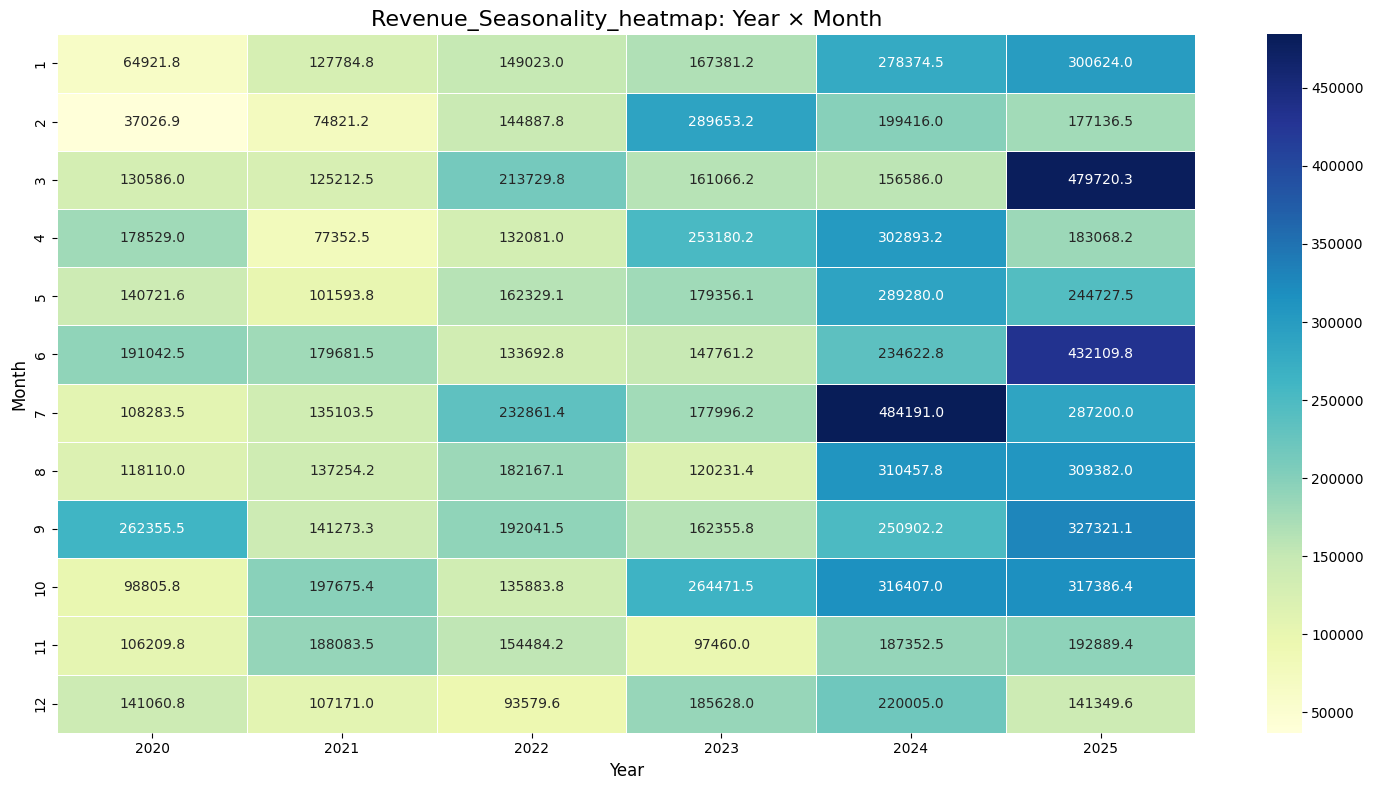

In [103]:
Seasonality_heatmap = original_df.pivot_table(index='Month', columns='Year', values='Total Selling Price', aggfunc='sum')
Seasonality_heatmap = Seasonality_heatmap.apply(pd.to_numeric, errors='coerce')

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(Seasonality_heatmap, annot=True, cmap='YlGnBu', linewidths=0.5, fmt='.1f')

# Add title and labels
plt.title('Revenue_Seasonality_heatmap: Year × Month', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

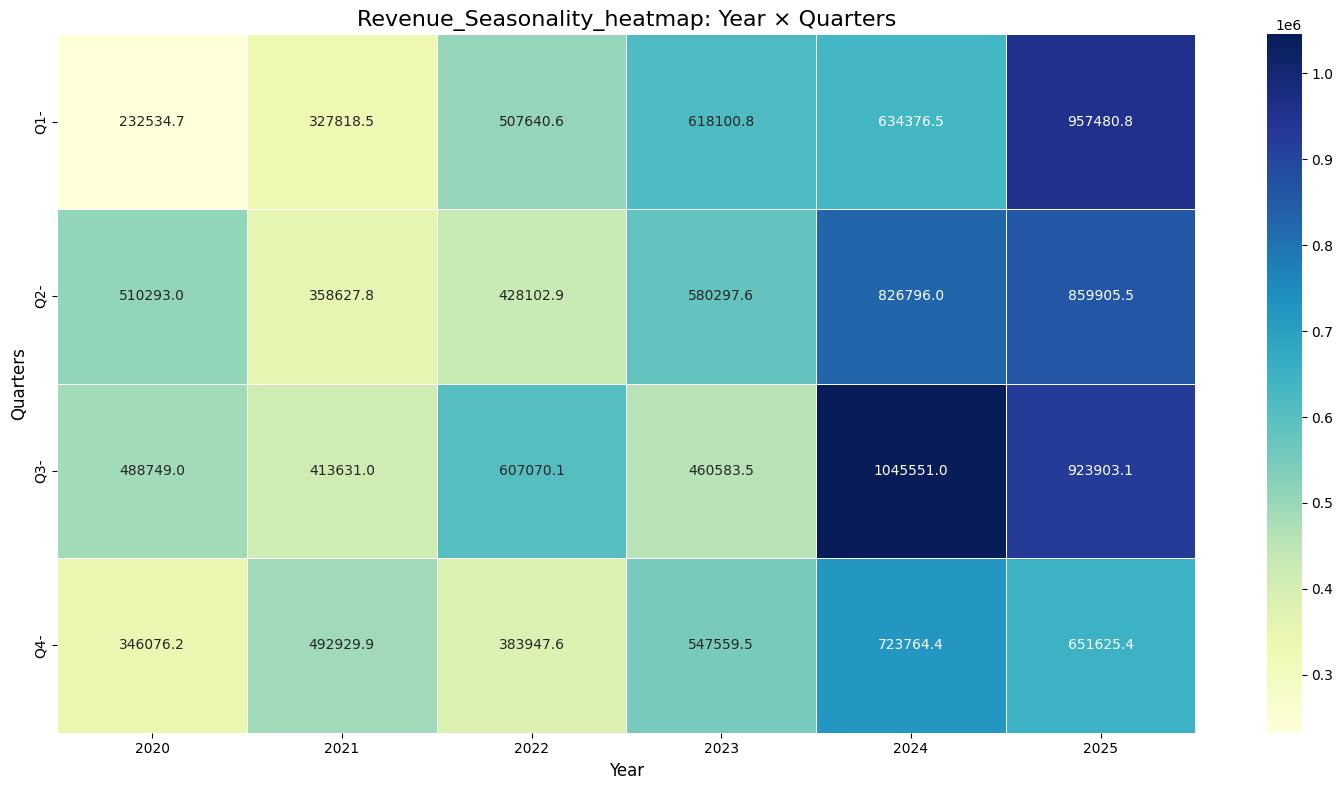

In [104]:
Seasonality_Q_heatmap = original_df.pivot_table(index='Quarters', columns='Year', values='Total Selling Price', aggfunc='sum')
Seasonality_Q_heatmap = Seasonality_Q_heatmap.apply(pd.to_numeric, errors='coerce')

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(Seasonality_Q_heatmap, annot=True, cmap='YlGnBu', linewidths=0.5, fmt='.1f')

# Add title and labels
plt.title('Revenue_Seasonality_heatmap: Year × Quarters', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Quarters', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## Sales by Product Category

In [105]:
Revenue_per_category = original_df.groupby('Category')['Total Selling Price'].sum().reset_index().sort_values(by='Total Selling Price', ascending=False).reset_index()
Revenue_per_category.head(15)
top_15_categories = Revenue_per_category['Category'].head(15).to_list()

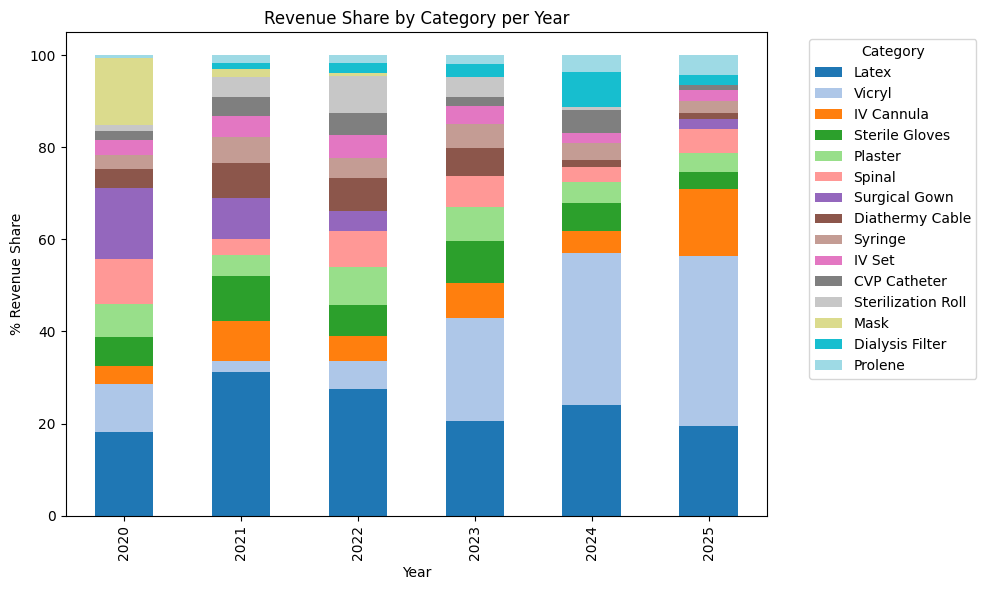

In [106]:
category_years = original_df[original_df['Category'].isin(top_15_categories)].groupby(['Year','Category'])["Total Selling Price"].sum().reset_index().sort_values(by=['Year','Total Selling Price'], ascending=[True,False])

category_years_pivot = category_years.pivot(index='Year', columns='Category', values='Total Selling Price')
pivot_percent = category_years_pivot.div(category_years_pivot.sum(axis=1), axis=0) * 100
sorted_columns = pivot_percent.sum().sort_values(ascending=False).index
pivot_percent = pivot_percent[sorted_columns]

pivot_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.ylabel('% Revenue Share')
plt.title('Revenue Share by Category per Year')
# Move legend outside the plot
plt.legend(
    title='Category',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

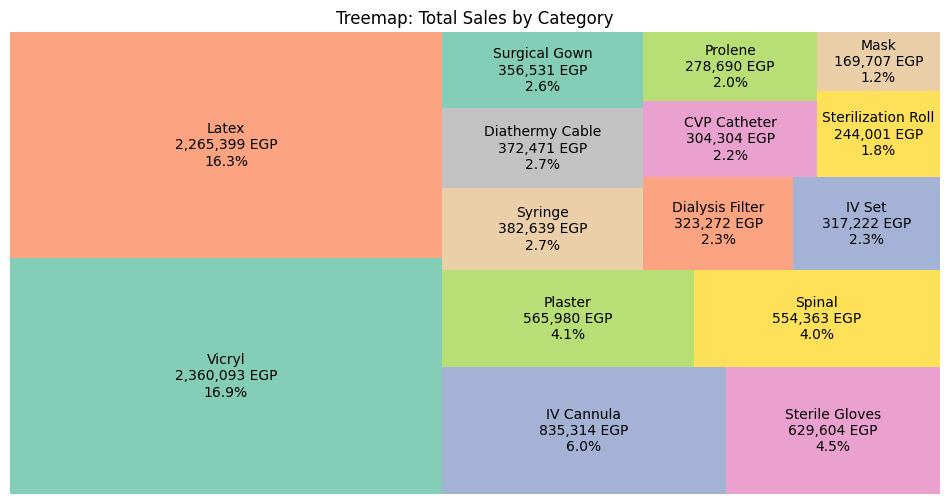

In [107]:
! pip install squarify
import squarify

category_total = original_df[original_df['Category'].isin(top_15_categories)].groupby('Category')['Total Selling Price'].sum().reset_index()
category_total = category_total.sort_values(by='Total Selling Price', ascending=False)
category_total['Total Selling Price'] = pd.to_numeric(category_total['Total Selling Price'], errors='coerce')

plt.figure(figsize=(12, 6))
# Format labels with commas
labels = [
    f"{cat}\n{val:,.0f} EGP\n{pct:.1f}%" 
    for cat, val, pct in zip(
        category_total['Category'], 
        category_total['Total Selling Price'], 
        (category_total['Total Selling Price'] / original_df['Total Selling Price'].sum() * 100)
    )
]
squarify.plot(sizes=category_total['Total Selling Price'], 
              label = labels,
            #   label=category_total['Category'] + "\n" + category_total['Total Selling Price'].round(0).astype(str) + "\n" + (category_total['Total Selling Price'] / original_df['Total Selling Price'].sum() * 100).round(1).astype(str) + '%', 
              color=sns.color_palette('Set2', len(category_total)), 
              alpha=0.8)

plt.axis('off')
plt.title('Treemap: Total Sales by Category')
plt.show()

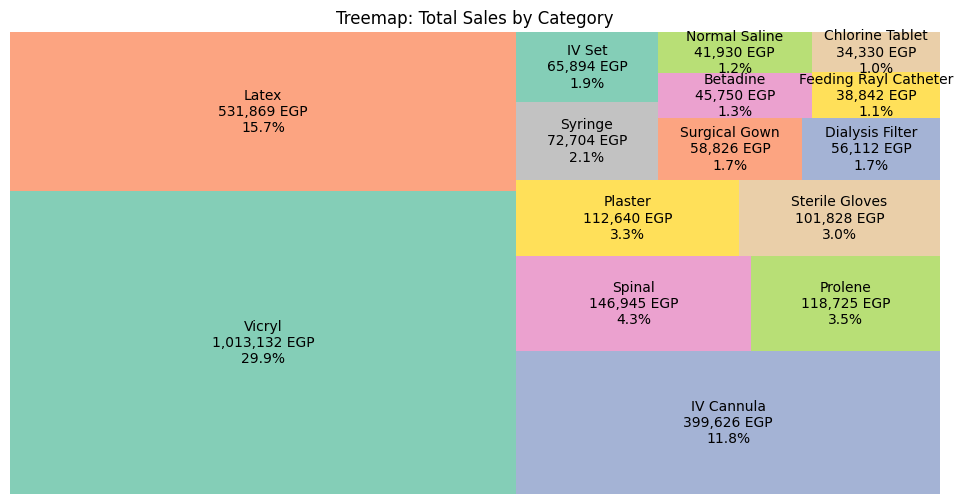

In [108]:
Revenue_per_category = original_df[original_df['Year'] == 2025].groupby('Category')['Total Selling Price'].sum().reset_index().sort_values(by='Total Selling Price', ascending=False).reset_index()
Revenue_per_category.head(15)
top_15_categories = Revenue_per_category['Category'].head(15).to_list()

category_total = original_df[(original_df['Category'].isin(top_15_categories)) & (original_df['Year'] == 2025)].groupby('Category')['Total Selling Price'].sum().reset_index()
category_total = category_total.sort_values(by='Total Selling Price', ascending=False)
category_total['Total Selling Price'] = pd.to_numeric(category_total['Total Selling Price'], errors='coerce')

plt.figure(figsize=(12, 6))
# Format labels with commas
labels = [
    f"{cat}\n{val:,.0f} EGP\n{pct:.1f}%" 
    for cat, val, pct in zip(
        category_total['Category'], 
        category_total['Total Selling Price'], 
        (category_total['Total Selling Price'] / original_df[original_df['Year'] == 2025]['Total Selling Price'].sum() * 100)
    )
]
squarify.plot(sizes=category_total['Total Selling Price'], 
              label = labels,
            #   label=category_total['Category'] + "\n" + category_total['Total Selling Price'].round(0).astype(str) + "\n" + (category_total['Total Selling Price'] / original_df['Total Selling Price'].sum() * 100).round(1).astype(str) + '%', 
              color=sns.color_palette('Set2', len(category_total)), 
              alpha=0.8)

plt.axis('off')
plt.title('Treemap: Total Sales by Category')
plt.show()

In [109]:
df_2025 = original_df[original_df['Year'] == 2025].groupby(['Product Name','Client']).agg(Total_Selling_Price=("Total Selling Price", "sum"),
                                                                           profit = ("Profit", "sum")).reset_index().sort_values(by=['Product Name','Total_Selling_Price'], ascending=True)
df_2025['pecentage'] = df_2025['Total_Selling_Price'] / df_2025['Total_Selling_Price'].sum() * 100
df_2025['Profit_Margin'] = df_2025['profit'] / df_2025['Total_Selling_Price'] * 100
df_2025.head(30)

,Product Name,Client,Total_Selling_Price,profit,pecentage,Profit_Margin
0,ابر اسباينال اسود مقاس ٢٢,Sharqia,4200,250,0.123787,5.952381
1,ابر اسباينال اسود مقاس ٢٢,Taha Yasen,13420.0,2020.0,0.39553,15.052161
4,ابر اسباينال برتقالي مقاس ٢٥,Montazah,3775,100,0.111261,2.649007
2,ابر اسباينال برتقالي مقاس ٢٥,Eman Khairy,3950,100,0.116419,2.531646
5,ابر اسباينال برتقالي مقاس ٢٥,Sharqia,4200,350,0.123787,8.333333
6,ابر اسباينال برتقالي مقاس ٢٥,Taha Yasen,27100.0,4575.0,0.798723,16.881919
3,ابر اسباينال برتقالي مقاس ٢٥,Jasmin,90300,9700,2.661428,10.741971
7,اسورة تعريف أطفال,Amina,425,25,0.012526,5.882353
8,اسورة تعريف كبار,Arkan Center,100,20,0.002947,20.0
9,اليكترود,Taha Yasen,2100,210,0.061894,10.0


## Top 10 Customers by Revenue (Pareto 80/20)

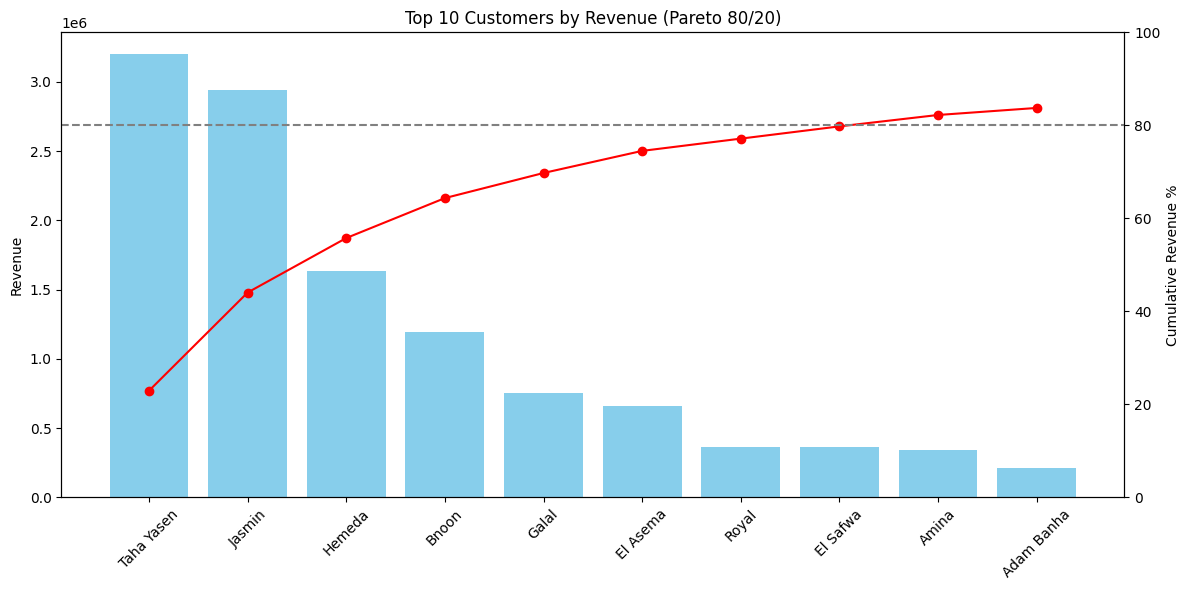

In [110]:
Customer_data = original_df.groupby('Client').agg(Sales_sum=("Total Selling Price", "sum"),
                                 Profit_sum=("Profit", "sum"),
                                 Transactions_count=("Invoice No", "nunique"),
                                 Products_No=("Product Name", "nunique"),
                                 Category_No=("Category", "nunique"),
                                 years_in_business=("Year", "nunique"),
                                 Units_sold=("Qty.", "sum")).reset_index().sort_values(by='Sales_sum', ascending=False)
Customer_data['Contribution Margin %'] = Customer_data['Profit_sum'] / Customer_data['Sales_sum'] * 100
Customer_data['Cumalative_Sales_%'] = Customer_data['Sales_sum'].cumsum() / Customer_data['Sales_sum'].sum() * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart (Revenue)
ax1.bar(Customer_data['Client'][:10], Customer_data['Sales_sum'][:10], color='skyblue')
ax1.set_ylabel('Revenue')
ax1.tick_params(axis='x', rotation=45)

# Line chart (Cumulative %)
ax2 = ax1.twinx()
ax2.plot(Customer_data['Client'][:10], Customer_data['Cumalative_Sales_%'][:10], color='red', marker='o', linestyle='-')
ax2.set_ylabel('Cumulative Revenue %')
ax2.axhline(80, color='gray', linestyle='--')  # 80% reference line
ax2.set_ylim(0, 100)


# Title
plt.title('Top 10 Customers by Revenue (Pareto 80/20)')

plt.tight_layout()
plt.show()



In [111]:
yearly_sales = original_df.groupby('Year').agg(Unique_Customers_per_Year = ('Client' , 'nunique'),
                                Sales_sum=("Total Selling Price", "sum"),
                                Profit_sum=("Profit", "sum"),
                                Products_No=("Product Name", "nunique"),
                                Category_No=("Category", "nunique"),
                                Transactions_count=("Invoice No", "nunique")).reset_index()
yearly_sales['AOV'] = yearly_sales['Sales_sum'] / yearly_sales['Transactions_count']
yearly_sales['Purchase_Frequency'] = yearly_sales['Transactions_count'] / yearly_sales["Year"].nunique()
yearly_sales['Gross_Margin'] = yearly_sales['Profit_sum'] / yearly_sales['Sales_sum']
yearly_sales['CLV'] = (yearly_sales['AOV'] * yearly_sales['Purchase_Frequency'] * yearly_sales['Gross_Margin']) / (1 + 0.1 - 0.95)  # Assuming Discount Rate = 10% and Retention Rate = 95%
yearly_sales

,Year,Unique_Customers_per_Year,Sales_sum,Profit_sum,Products_No,Category_No,Transactions_count,AOV,Purchase_Frequency,Gross_Margin,CLV
0,2020,47,1577652.9625,153163.8875,314,125,531,2971.097858,88.500000,0.097083,170182.097222
1,2021,25,1593007.228431,142354.188431,414,143,423,3765.974535,70.500000,0.089362,158171.320479
2,2022,21,1926761.1328,272364.6228,318,123,419,4598.475257,69.833333,0.141359,302627.358667
3,2023,21,2206541.3,258070.41,265,113,267,8264.199625,44.500000,0.116957,286744.9
4,2024,15,3230487.95,319351.23,227,99,177,18251.34435,29.500000,0.098855,354834.7
5,2025,14,3392914.76,329935.86,240,103,165,20563.119758,27.500000,0.097243,366595.4


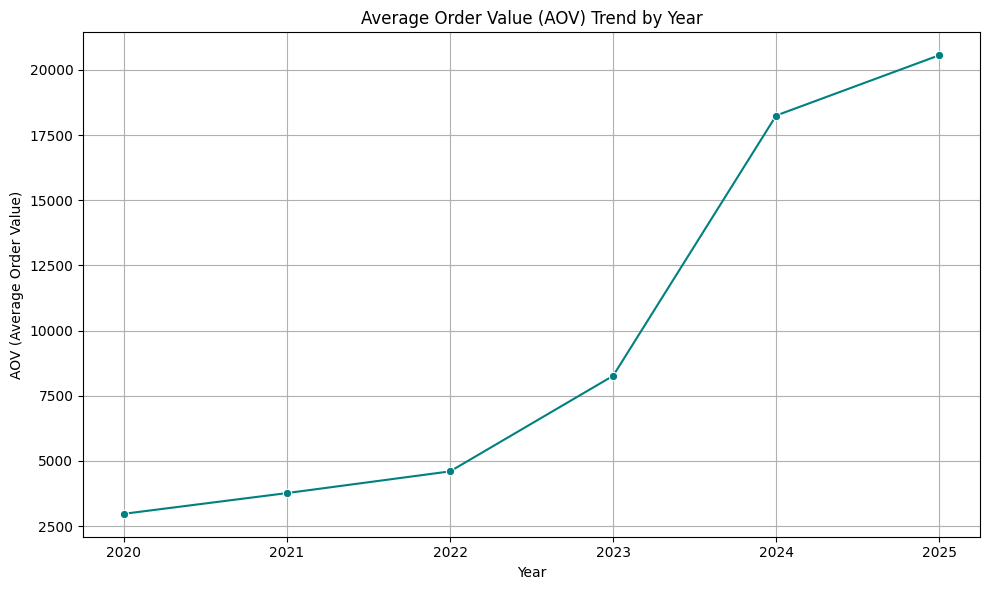

In [112]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, x='Year', y='AOV', marker='o', color='teal')
plt.title('Average Order Value (AOV) Trend by Year')
plt.xlabel('Year')
plt.ylabel('AOV (Average Order Value)')
plt.grid(True)
plt.tight_layout()
plt.show()

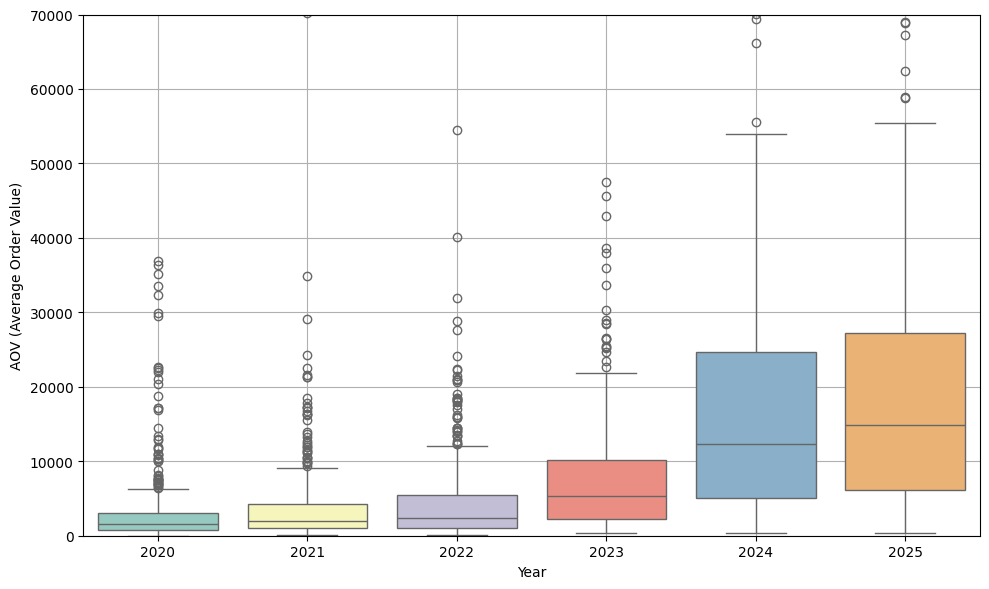

In [113]:
aov_boxplot = original_df.groupby(['Year', 'Invoice No'])['Total Selling Price'].sum().reset_index()
aov_boxplot

plt.figure(figsize=(10, 6))

sns.boxplot(data=aov_boxplot, x='Year', y='Total Selling Price',hue= 'Year', palette='Set3',legend = False)
plt.xlabel('Year')
plt.ylabel('AOV (Average Order Value)')
plt.ylim(0, 70000)  # Limit y-axis to focus on main distribution
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔑 Customer Metrics


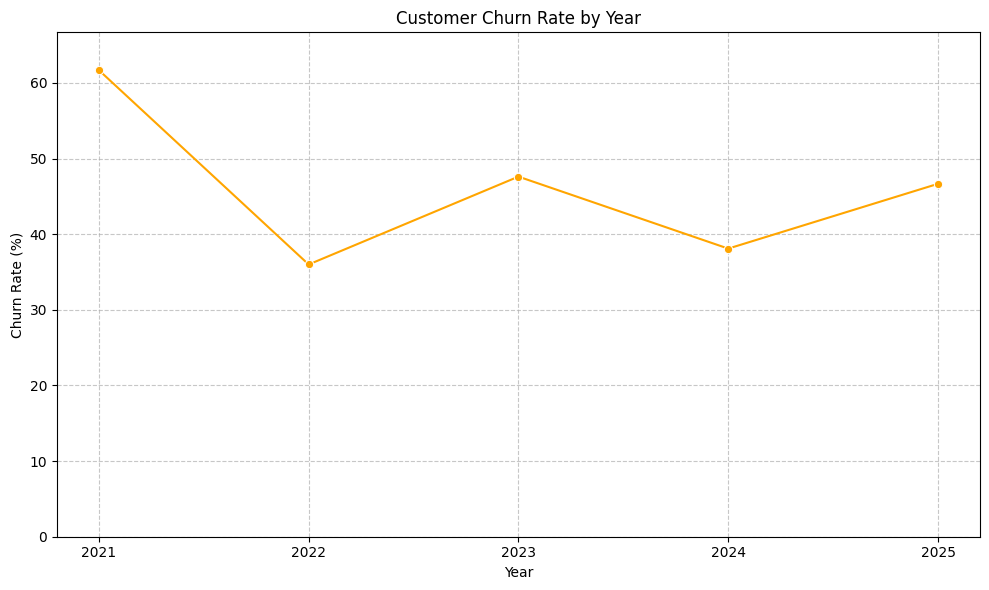

In [114]:
customers_per_year = original_df.groupby('Year')['Client'].unique().apply(set).reset_index()
customers_per_year

churn_data = []

for i in range(1, len(customers_per_year)):
    year = customers_per_year.loc[i, 'Year']
    current = customers_per_year.loc[i, 'Client']
    previous = customers_per_year.loc[i - 1, 'Client']
    
    lost = previous - current
    churn_rate = (len(lost) / len(previous)) * 100 if len(previous) > 0 else 0
    
    churn_data.append({
        'Year': year,
        'Customers at Start': len(previous),
        'Retained Customers': len(previous & current),
        'Lost Customers': len(lost),
        'new Customers': len(current - previous),
        'Churn Rate (%)': round(churn_rate, 2)
    })

churn_df = pd.DataFrame(churn_data)
churn_df

plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_df, x='Year', y='Churn Rate (%)', marker='o', color='orange')
plt.title('Customer Churn Rate by Year')
plt.xlabel('Year')
plt.ylabel('Churn Rate (%)')
plt.xticks(churn_df['Year'])
plt.ylim(0, churn_df['Churn Rate (%)'].max() + 5)  # Add some space above the max churn rate
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Customer Churn Rate


In [115]:
customers_per_year = original_df.groupby('Year')['Client'].unique().apply(set).reset_index()
customers_per_year

,Year,Client
0,2020,"{Dorra, El Hayat, Montazah Pediatric, Leaders,..."
1,2021,"{El Hayat, Montazah Pediatric, Leaders, El Saf..."
2,2022,"{El Hayat, El Safwa, EAGEL, Mr.Sameh, Maghraby..."
3,2023,"{El Safwa, EAGEL, Delta, Mr.Sameh, Taha Yasen,..."
4,2024,"{Zohour El Hayat, Bnoon, Hemeda, Wady El Tip, ..."
5,2025,"{Bnoon, Hemeda, Sharqia , SHARQA, Jasmin, Roya..."


In [116]:
churn_data = []

for i in range(1, len(customers_per_year)):
    year = customers_per_year.loc[i, 'Year']
    current = customers_per_year.loc[i, 'Client']
    previous = customers_per_year.loc[i - 1, 'Client']
    
    lost = previous - current
    churn_rate = (len(lost) / len(previous)) * 100 if len(previous) > 0 else 0
    
    churn_data.append({
        'Year': year,
        'Customers at Start': len(previous),
        'Retained Customers': len(previous & current),
        'Lost Customers': len(lost),
        'new Customers': len(current - previous),
        'Churn Rate (%)': round(churn_rate, 2)
    })

churn_df = pd.DataFrame(churn_data)
churn_df

,Year,Customers at Start,Retained Customers,Lost Customers,new Customers,Churn Rate (%)
0,2021,47,18,29,7,61.70
1,2022,25,16,9,5,36.00
2,2023,21,11,10,10,47.62
3,2024,21,13,8,2,38.10
4,2025,15,8,7,6,46.67


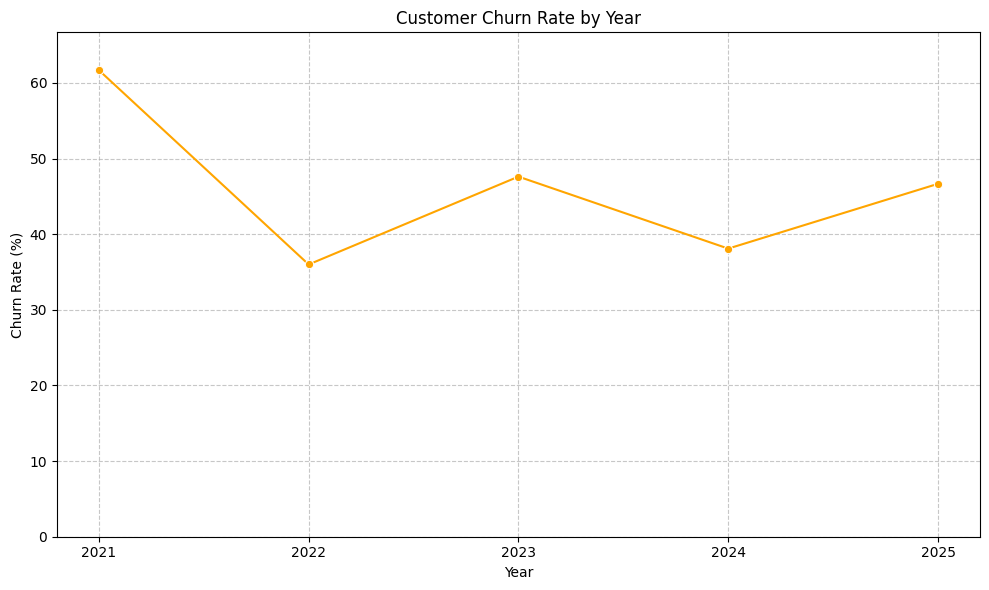

In [117]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_df, x='Year', y='Churn Rate (%)', marker='o', color='orange')
plt.title('Customer Churn Rate by Year')
plt.xlabel('Year')
plt.ylabel('Churn Rate (%)')
plt.xticks(churn_df['Year'])
plt.ylim(0, churn_df['Churn Rate (%)'].max() + 5)  # Add some space above the max churn rate
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

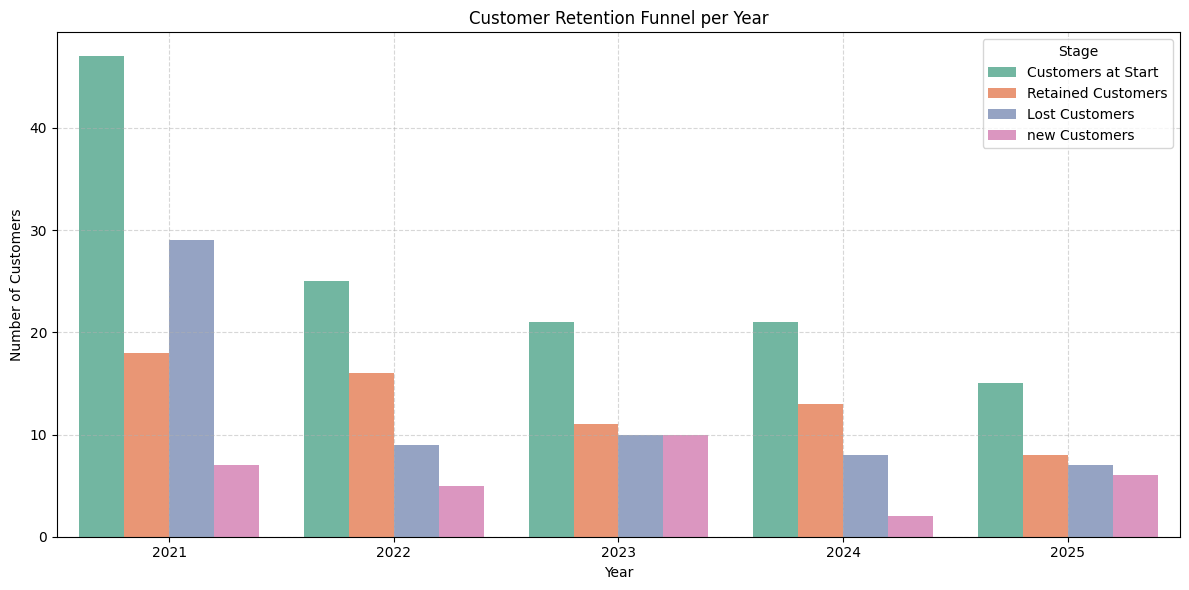

In [118]:
churn_df_long = churn_df.melt(
    id_vars='Year',
    value_vars=['Customers at Start', 'Retained Customers', 'Lost Customers','new Customers'],
    var_name='Stage',
    value_name='Customer Count'
)

plt.figure(figsize=(12, 6))
sns.barplot(data=churn_df_long, x='Year', y='Customer Count', hue='Stage', palette='Set2')
plt.title('Customer Retention Funnel per Year')
plt.ylabel('Number of Customers')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Customer Concentration Risk


In [119]:
Customer_data

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,Cumalative_Sales_%
63,Taha Yasen,3197157.06,344915.64,351,238,97,6,139297,10.788198,22.955936
38,Jasmin,2939293.25,335280.1,112,118,53,3,78331,11.406827,44.060382
36,Hemeda,1631108.9,170082.97,238,238,99,6,92641.64,10.427444,55.771921
9,Bnoon,1196362,90045.5,54,23,15,6,38906,7.52661,64.361931
33,Galal,751274.2228,128073.3928,82,335,104,3,39588,17.047489,69.756161
...,...,...,...,...,...,...,...,...,...,...
43,Madina,900,225,1,1,1,1,3,25.0,99.990497
18,Dr. Salah,512.5,42.5,2,5,4,1,32,8.292683,99.994177
16,Dr. Islam Sameer,383,36.0,1,3,3,1,4,9.399478,99.996927
37,Ibn Sina,321,30,1,1,1,1,3,9.345794,99.999232


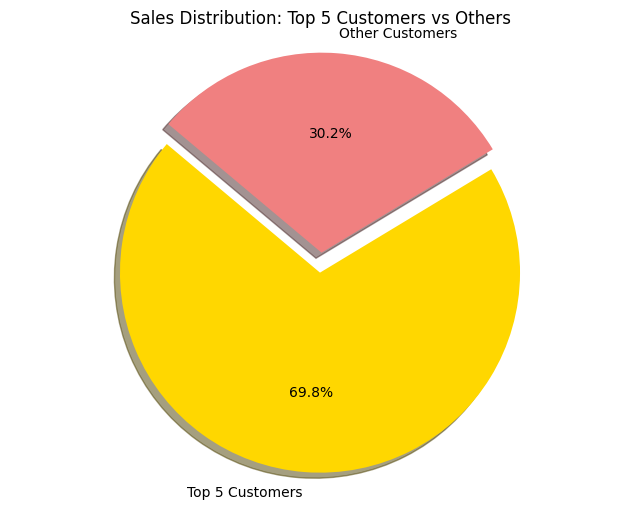

In [120]:
Top_5_customers_sales = Customer_data['Sales_sum'].head(5).sum()
other_customers_sales = Customer_data['Sales_sum'].iloc[5:].sum()

plt.figure(figsize=(8, 6))

plt.pie([Top_5_customers_sales, other_customers_sales], 
        labels=['Top 5 Customers', 'Other Customers'], 
        autopct='%1.1f%%', 
        colors=['gold', 'lightcoral'], 
        startangle=140, 
        explode=(0.1, 0), 
        shadow=True)
plt.title('Sales Distribution: Top 5 Customers vs Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [121]:
top_4 = Customer_data[['Client', 'Sales_sum']].head(4)
top_4

,Client,Sales_sum
63,Taha Yasen,3197157.06
38,Jasmin,2939293.25
36,Hemeda,1631108.9
9,Bnoon,1196362


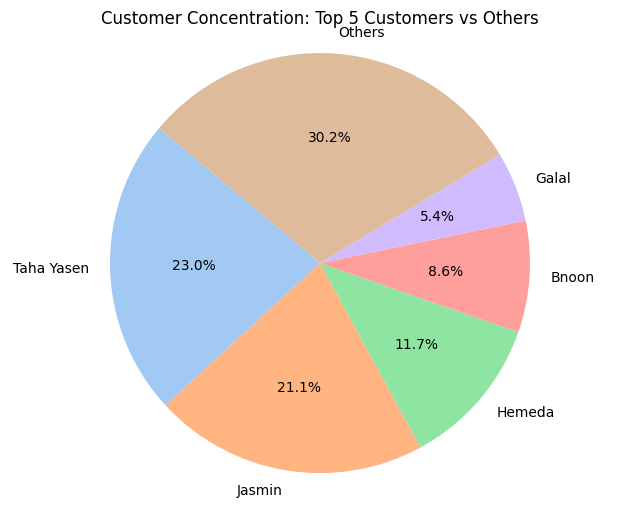

In [122]:
top_5 = Customer_data[['Client', 'Sales_sum']].head(5)
others = Customer_data['Sales_sum'].iloc[5:].sum()

labels = list(top_5['Client']) + ['Others']
sizes = list(top_5['Sales_sum']) + [others]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Customer Concentration: Top 5 Customers vs Others')
plt.axis('equal')  # Makes the pie chart a circle
plt.show()

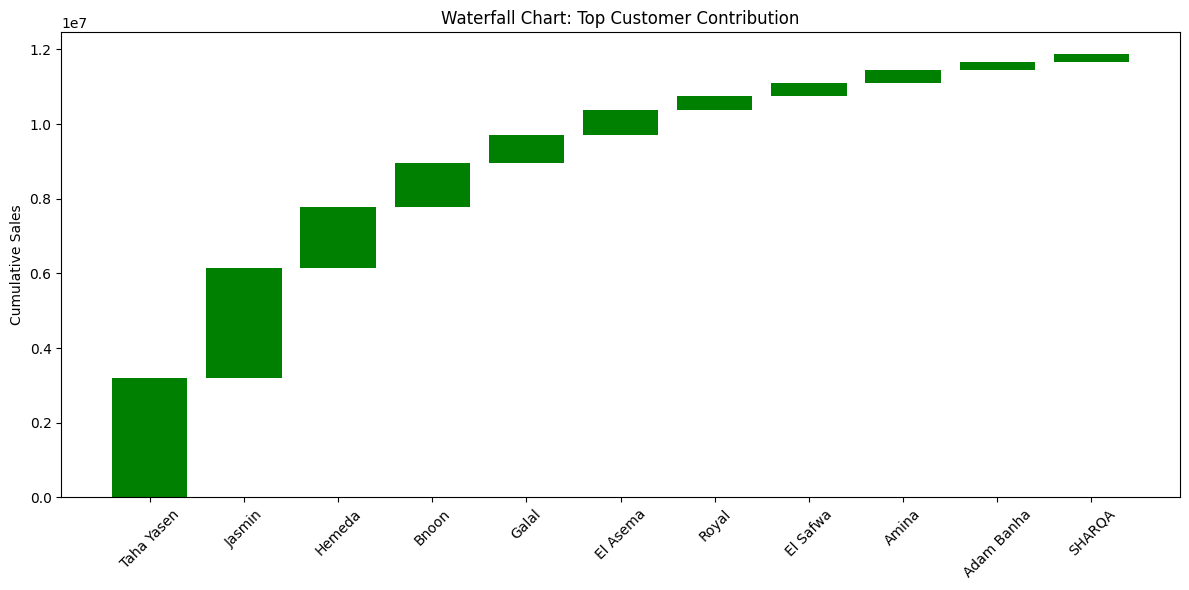

In [123]:
top_customers = original_df.groupby('Client')['Total Selling Price'].sum().sort_values(ascending=False)

top_customers = top_customers.reset_index()
top_customers.columns = ['Client', 'Sales']
top_customers['Cumulative'] = top_customers['Sales'].cumsum()
top_customers['Previous'] = top_customers['Cumulative'].shift(1, fill_value=0)

fig, ax = plt.subplots(figsize=(12, 6))
for i, row in top_customers[:11].iterrows():
    color = 'green' if row['Sales'] >= 0 else 'red'
    ax.bar(row['Client'], row['Sales'], bottom=row['Previous'], color=color)

ax.set_ylabel('Cumulative Sales')
ax.set_title('Waterfall Chart: Top Customer Contribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🔑 Supplier Metrics


### Supplier Concentration Risk


In [124]:
original_df['Total Buying Price'] = original_df['Qty.'] * original_df['Buying Price']
Supplier = original_df.groupby('Supplier')['Total Buying Price'].sum().reset_index().sort_values(by='Total Buying Price', ascending=False).reset_index()
Supplier['Cumalative_Supplier_%'] = Supplier['Total Buying Price'].cumsum() / Supplier['Total Buying Price'].sum() * 100
Supplier['share_of_total_buying'] = Supplier['Total Buying Price'] / Supplier['Total Buying Price'].sum() * 100
Supplier.head(10)

,index,Supplier,Total Buying Price,Cumalative_Supplier_%,share_of_total_buying
0,80,Safa,4254067.03,34.172383,34.172383
1,57,Kareem,2610658.86,55.143476,20.971093
2,39,El Yosr,708964.45,60.838498,5.695022
3,9,Amazon,403125.75,64.076756,3.238258
4,46,FOX,369255.75,67.042941,2.966185
5,2,Abd El Hamid,342505.98,69.794248,2.751307
6,5,Ahmed Mongey,342421.5,72.544876,2.750629
7,26,El Hanafy,293793.5,74.904882,2.360006
8,7,Al Moaeez,287530.76,77.214581,2.309698
9,67,Motakhssoon,283454.5,79.491535,2.276954


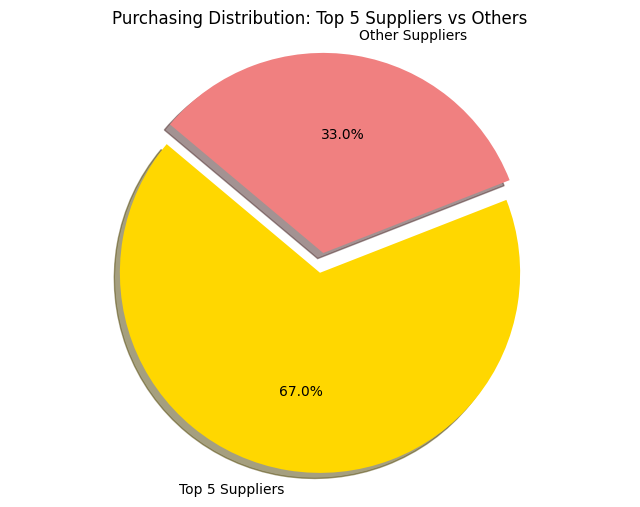

In [125]:
Top_5_suppliers_sales = Supplier['Total Buying Price'].head(5).sum()
other_suppliers_sales = Supplier['Total Buying Price'].iloc[5:].sum()

plt.figure(figsize=(8, 6))

plt.pie([Top_5_suppliers_sales, other_suppliers_sales], 
        labels=['Top 5 Suppliers', 'Other Suppliers'], 
        autopct='%1.1f%%', 
        colors=['gold', 'lightcoral'], 
        startangle=140, 
        explode=(0.1, 0), 
        shadow=True)
plt.title('Purchasing Distribution: Top 5 Suppliers vs Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


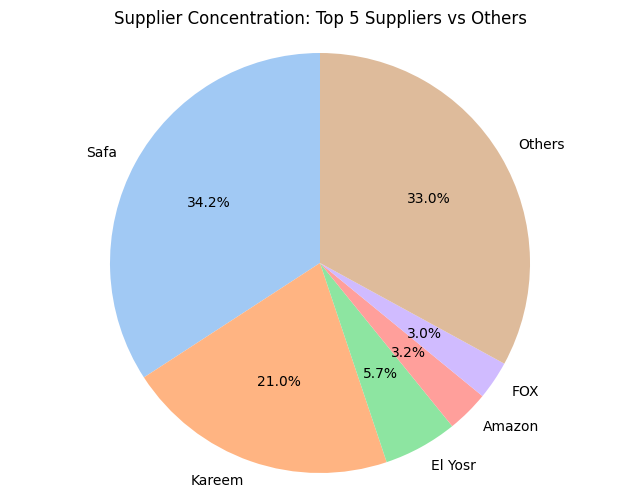

In [126]:
top_5 = Supplier[['Supplier', 'Total Buying Price']].head(5)
others = Supplier['Total Buying Price'].iloc[5:].sum()

labels = list(top_5['Supplier']) + ['Others']
sizes = list(top_5['Total Buying Price']) + [others]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Supplier Concentration: Top 5 Suppliers vs Others')
plt.axis('equal')  # Makes the pie chart a circle
plt.show()

<Figure size 1200x600 with 0 Axes>

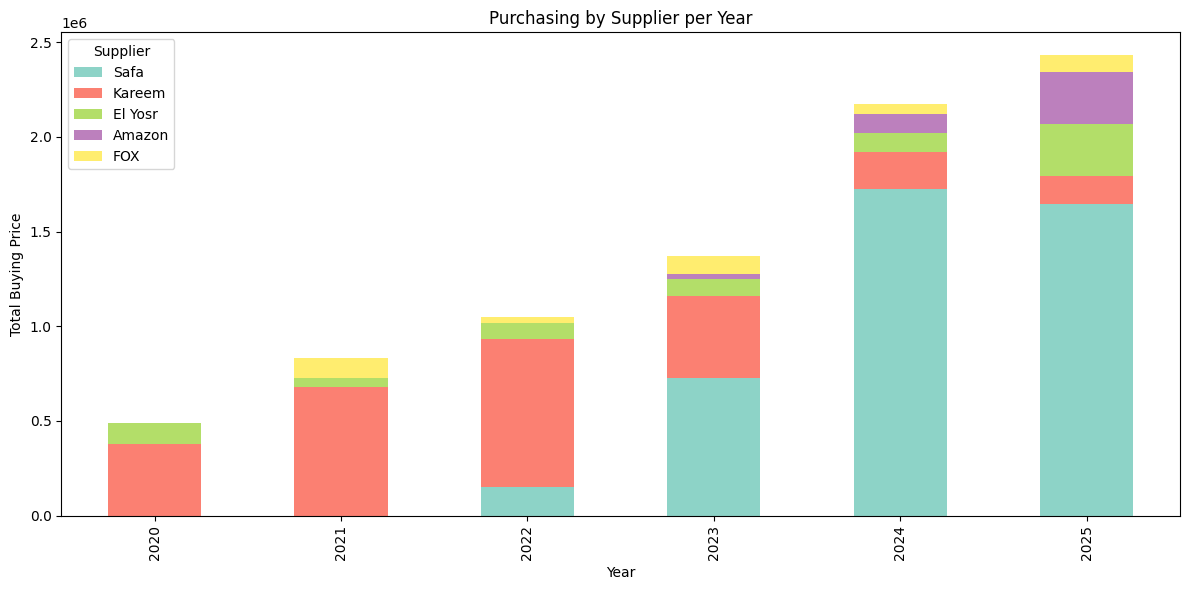

In [127]:
supplier_by_year = original_df.groupby(['Supplier','Year'])['Total Buying Price'].sum().reset_index().sort_values(by=['Year','Total Buying Price'], ascending=[True,False])
supplier_satcked = supplier_by_year.pivot(index='Year', columns='Supplier', values='Total Buying Price').loc[:, Supplier['Supplier'].head(5)]  # Keep only top 10 suppliers

plt.figure(figsize=(12, 6))
supplier_satcked.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set3')
plt.ylabel('Total Buying Price')
plt.title('Purchasing by Supplier per Year')
# Move legend outside the plot
plt.legend(
    title='Supplier',
    bbox_to_anchor=(0, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

## 🔑 Financial Metrics

### Expense Ratio

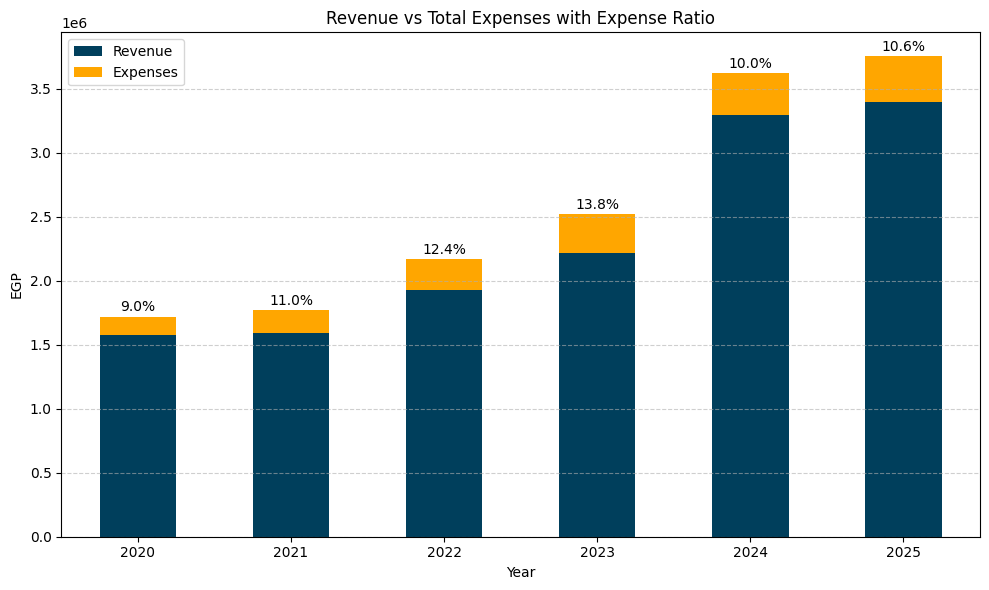

In [128]:

# Your base code
revenue_expenses = Profit_margin[['Year','Selling_sum']].merge(yearly_expenses, on='Year', how='left')
revenue_expenses['Expense ratio %'] = revenue_expenses['Cost'] / revenue_expenses['Selling_sum'] * 100
revenue_expenses.rename(columns={'Cost':'Total Expenses'}, inplace=True)
revenue_expenses.set_index('Year', inplace=True)

# Plot
ax = revenue_expenses[['Selling_sum', 'Total Expenses']].plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=['#003f5c', '#ffa600']
)

# Add labels for expense ratio
for i, (index, row) in enumerate(revenue_expenses.iterrows()):
    ratio = row['Expense ratio %']
    total_height = row['Selling_sum'] + row['Total Expenses']
    ax.text(i, total_height + 20000, f"{ratio:.1f}%", 
            ha='center', va='bottom', fontsize=10, color='black')

# Beautify plot
plt.title('Revenue vs Total Expenses with Expense Ratio')
plt.ylabel('EGP')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Revenue', 'Expenses'])
plt.show()


### Marketing Spend Ratio


In [129]:
expenses_df.head()

,Date,Type,Description,Destination,Client,Invoice no.,Name,Cost,Year,Month
1,2020-01-01 00:00:00,Marketing & Sales,Survey,Banha,"Alaa, Hassan, Ghareeb",NaN,Company,2565,2020,1
2,2020-01-01 00:00:00,Marketing & Sales,Training,Cairo,Room Square,NaN,Company,1880,2020,1
3,2020-01-01 00:00:00,Operation,Transfer,Shbeen El Knater,El Mahdy,1,Safwat,50,2020,1
4,2020-01-01 00:00:00,General,Boxes,Shbeen El Kom,El Khawaga,NaN,Company,600,2020,1
5,2020-01-01 00:00:00,General,Cards,NaN,NaN,NaN,Khaled,80,2020,1


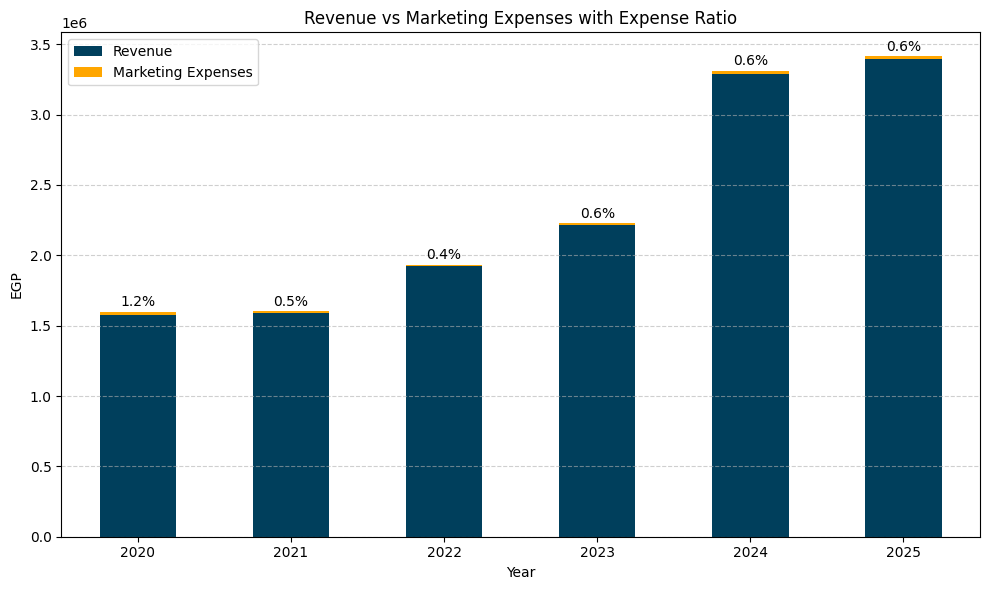

In [130]:
marketing = expenses_df[expenses_df['Type'] == 'Marketing & Sales']
marketing = marketing.groupby('Year')['Cost'].sum().reset_index()  
marketing_expenses = Profit_margin[['Year','Selling_sum','Profit_sum']].merge(marketing[['Year','Cost']], on='Year', how='left')
marketing_expenses['Marketing Expense ratio %'] = marketing_expenses['Cost'] / marketing_expenses['Selling_sum'] * 100
marketing_expenses.rename(columns={'Cost':'Marketing & Sales Expenses'}, inplace=True)
marketing_expenses.set_index('Year', inplace=True)
marketing_expenses

ax = marketing_expenses[['Selling_sum', 'Marketing & Sales Expenses']].plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=['#003f5c', '#ffa600']
)

# Add labels for expense ratio
for i, (index, row) in enumerate(marketing_expenses.iterrows()):
    ratio = row['Marketing Expense ratio %']
    total_height = row['Selling_sum'] + row['Marketing & Sales Expenses']
    ax.text(i, total_height + 20000, f"{ratio:.1f}%", 
            ha='center', va='bottom', fontsize=10, color='black')

# Beautify plot
plt.title('Revenue vs Marketing Expenses with Expense Ratio')
plt.ylabel('EGP')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Revenue', 'Marketing Expenses'])
plt.show()


In [131]:
marketing_expenses = marketing_expenses.merge(yearly_expenses, left_index=True, right_on='Year', how='left').set_index('Year')
marketing_expenses['ratio from total expenses %'] = marketing_expenses['Marketing & Sales Expenses'] / marketing_expenses['Cost'] * 100
marketing_expenses

,Selling_sum,Profit_sum,Marketing & Sales Expenses,Marketing Expense ratio %,Cost,ratio from total expenses %
Year,,,,,,
2020,1577652.9625,153163.8875,19442,1.232337,141835,13.707477
2021,1593147.228431,142369.188431,7820,0.490852,174540,4.480348
2022,1926761.1328,272364.6228,6772,0.351471,239157,2.831613
2023,2213421.3,259498.91,13767,0.621978,304613,4.519505
2024,3290487.95,324551.23,20850,0.633645,330040,6.317416
2025,3392914.76,329935.86,21400,0.630726,358512.62,5.969106


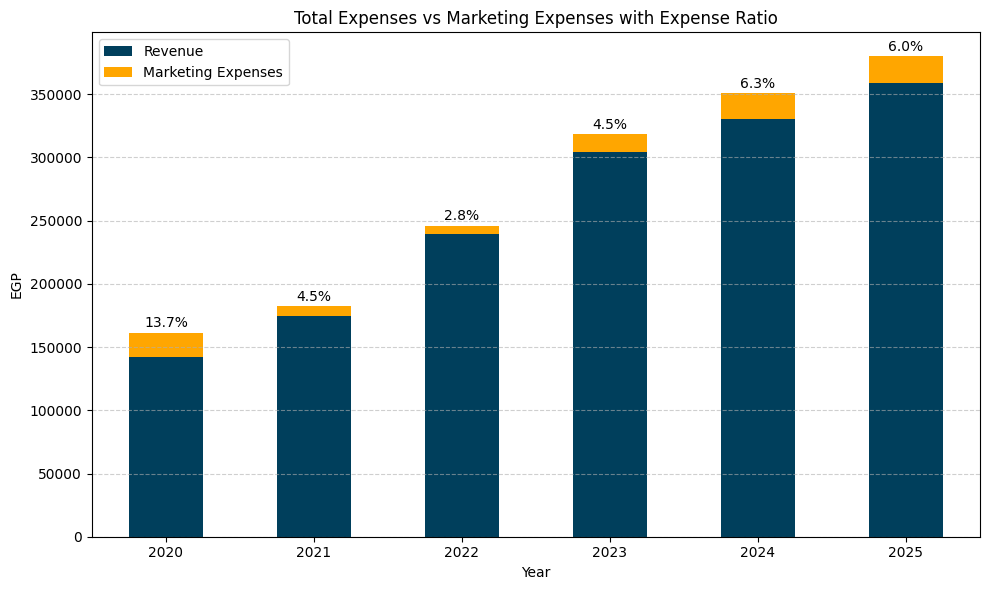

In [132]:


ax = marketing_expenses[['Cost', 'Marketing & Sales Expenses']].plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=['#003f5c', '#ffa600']
)

# Add labels for expense ratio
for i, (index, row) in enumerate(marketing_expenses.iterrows()):
    ratio = row['ratio from total expenses %']
    total_height = row['Cost'] + row['Marketing & Sales Expenses']
    ax.text(i, total_height + 2000, f"{ratio:.1f}%", 
            ha='center', va='bottom', fontsize=10, color='black')

# Beautify plot
plt.title('Total Expenses vs Marketing Expenses with Expense Ratio')
plt.ylabel('EGP')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Revenue', 'Marketing Expenses'])
plt.show()

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/1968537701.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  profit_expenses['profit_growth'] = profit_expenses['Profit_sum'].pct_change() * 100
/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/1968537701.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  profit_expenses['expenses_growth'] = profit_expenses['Total Expenses'].pct_change() * 100


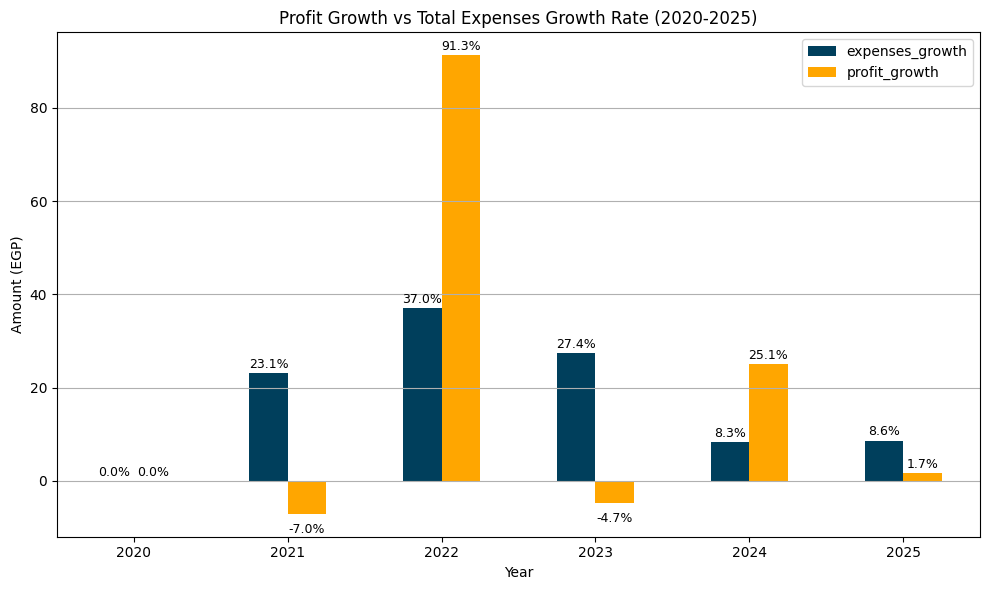

In [133]:
profit_expenses['profit_growth'] = profit_expenses['Profit_sum'].pct_change() * 100
profit_expenses['expenses_growth'] = profit_expenses['Total Expenses'].pct_change() * 100

ax = profit_expenses[['expenses_growth', 'profit_growth']].plot(kind='bar', figsize=(10,6), color = ['#003f5c', '#ffa600', 'green', 'red'])

# Add data labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if not pd.isna(height):  # Avoid labeling NaN values
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.5 if height >= 0 else height - 2,
                f"{height:.1f}%",
                ha='center',
                va='bottom' if height >= 0 else 'top',
                fontsize=9,
                color='black'
            )
            
plt.title('Profit Growth vs Total Expenses Growth Rate (2020-2025)')
plt.ylabel('Amount (EGP)')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [134]:
marketing_expenses

,Selling_sum,Profit_sum,Marketing & Sales Expenses,Marketing Expense ratio %,Cost,ratio from total expenses %
Year,,,,,,
2020,1577652.9625,153163.8875,19442,1.232337,141835,13.707477
2021,1593147.228431,142369.188431,7820,0.490852,174540,4.480348
2022,1926761.1328,272364.6228,6772,0.351471,239157,2.831613
2023,2213421.3,259498.91,13767,0.621978,304613,4.519505
2024,3290487.95,324551.23,20850,0.633645,330040,6.317416
2025,3392914.76,329935.86,21400,0.630726,358512.62,5.969106


In [135]:
marketing_ratio = marketing_expenses['Marketing & Sales Expenses'].sum() / marketing_expenses['Selling_sum'].sum()
marketing_profit_ratio = marketing_expenses['Marketing & Sales Expenses'].sum() / marketing_expenses['Profit_sum'].sum()

print(f"Overall Marketing to Sales Ratio: {marketing_ratio:.2%}")
print(f"Overall Marketing to Profit Ratio: {marketing_profit_ratio:.2%}")

Overall Marketing to Sales Ratio: 0.64%
Overall Marketing to Profit Ratio: 6.08%


In [136]:
operation = expenses_df[expenses_df['Type'] == 'Operation']
operation = operation.groupby('Year')['Cost'].sum().reset_index()
operation_expenses = Profit_margin[['Year','Selling_sum','Profit_sum']].merge(operation[['Year','Cost']], on='Year', how='left')
operation_expenses['operation Expense ratio %'] = operation_expenses['Cost'] / operation_expenses['Selling_sum'] * 100  
operation_expenses.rename(columns={'Cost':'Operation Expenses'}, inplace=True)
operation_expenses.set_index('Year', inplace=True)
operation_expenses

,Selling_sum,Profit_sum,Operation Expenses,operation Expense ratio %
Year,,,,
2020,1577652.9625,153163.8875,15925,1.009411
2021,1593147.228431,142369.188431,23285,1.461572
2022,1926761.1328,272364.6228,22018,1.142747
2023,2213421.3,259498.91,29979,1.354419
2024,3290487.95,324551.23,32580,0.990127
2025,3392914.76,329935.86,32840,0.967899


In [137]:
operation_ratio = operation_expenses['Operation Expenses'].sum() / operation_expenses['Selling_sum'].sum()
operation_profit_ratio = operation_expenses['Operation Expenses'].sum() / operation_expenses['Profit_sum'].sum()

print(f"Overall Operation to Sales Ratio: {operation_ratio:.2%}")
print(f"Overall Operation to Profit Ratio: {operation_profit_ratio:.2%}")

Overall Operation to Sales Ratio: 1.12%
Overall Operation to Profit Ratio: 10.57%


In [138]:
general = expenses_df[expenses_df['Type'] == 'General']
general = general.groupby('Year')['Cost'].sum().reset_index()
general_expenses = Profit_margin[['Year','Selling_sum','Profit_sum']].merge(general[['Year','Cost']], on='Year', how='left')
general_expenses['operation Expense ratio %'] = general_expenses['Cost'] / general_expenses['Selling_sum'] * 100  
general_expenses.rename(columns={'Cost':'General Expenses'}, inplace=True)
general_expenses.set_index('Year', inplace=True)
general_expenses

,Selling_sum,Profit_sum,General Expenses,operation Expense ratio %
Year,,,,
2020,1577652.9625,153163.8875,106468,6.748506
2021,1593147.228431,142369.188431,143435,9.003248
2022,1926761.1328,272364.6228,210367,10.918167
2023,2213421.3,259498.91,260867,11.785691
2024,3290487.95,324551.23,276610,8.406352
2025,3392914.76,329935.86,304272.62,8.967883


In [139]:
general_ratio = general_expenses['General Expenses'].sum() / general_expenses['Selling_sum'].sum()
general_profit_ratio = general_expenses['General Expenses'].sum() / general_expenses['Profit_sum'].sum()

print(f"Overall General Expenses to Sales Ratio: {general_ratio:.2%}")
print(f"Overall General Expenses to Profit Ratio: {general_profit_ratio:.2%}")

Overall General Expenses to Sales Ratio: 9.30%
Overall General Expenses to Profit Ratio: 87.86%


### Operational Efficiency Ratio


# 🔎 Phase 4 – Diagnostic Analytics (Why it happened?)

## 🔑 KPIs / Metrics with Explanations + Charts

### 1. Profitability by Customer Segment

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/3247820784.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_customers_yearly_profit = yearly_customer_profit.groupby('Year').apply(lambda x : x.nlargest(5, 'Profit')).reset_index(drop=True)


<Figure size 1200x600 with 0 Axes>

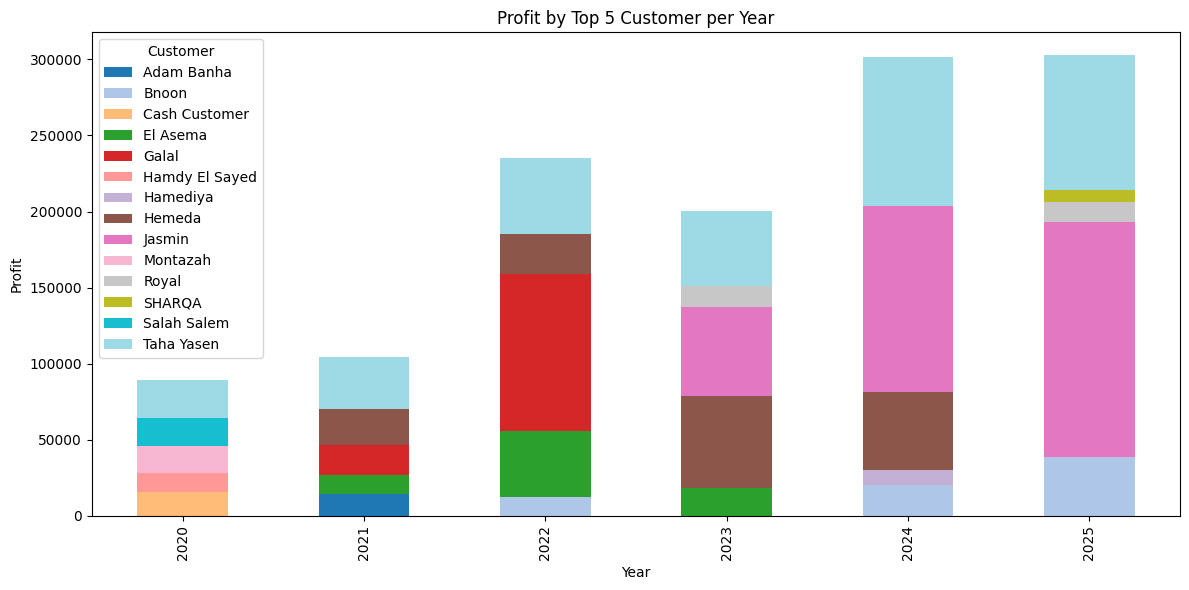

In [140]:
yearly_customer_profit = original_df.groupby(['Year','Client'])['Profit'].sum().reset_index().sort_values(by=['Year','Profit'], ascending=[True,False])

yearly_customer_profit['Year'].astype(int)
yearly_customer_profit['Profit'] = pd.to_numeric(yearly_customer_profit['Profit'], errors='coerce')
top_5_customers_yearly_profit = yearly_customer_profit.groupby('Year').apply(lambda x : x.nlargest(5, 'Profit')).reset_index(drop=True)
top_5_customers_yearly_profit.head(10)

Top_5_yearly_customer_profit_pivot = top_5_customers_yearly_profit.pivot(index='Year', columns='Client', values='Profit')
# pivot_percent_customer = yearly_customer_pivot.div(yearly_customer_pivot.sum(axis=1), axis=0) * 100


plt.figure(figsize=(12, 6))
Top_5_yearly_customer_profit_pivot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.ylabel('Profit')
plt.title('Profit by Top 5 Customer per Year')
# Move legend outside the plot
plt.legend(
    title='Customer',
    bbox_to_anchor=(0, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()


#### 1. Waterfall Chart - Showing how Revenue flows to Net Profit

In [141]:
expenses_df

,Date,Type,Description,Destination,Client,Invoice no.,Name,Cost,Year,Month
1,2020-01-01 00:00:00,Marketing & Sales,Survey,Banha,"Alaa, Hassan, Ghareeb",NaN,Company,2565,2020,1
2,2020-01-01 00:00:00,Marketing & Sales,Training,Cairo,Room Square,NaN,Company,1880,2020,1
3,2020-01-01 00:00:00,Operation,Transfer,Shbeen El Knater,El Mahdy,1,Safwat,50,2020,1
4,2020-01-01 00:00:00,General,Boxes,Shbeen El Kom,El Khawaga,NaN,Company,600,2020,1
5,2020-01-01 00:00:00,General,Cards,NaN,NaN,NaN,Khaled,80,2020,1
...,...,...,...,...,...,...,...,...,...,...
2355,46006,General,food,NaN,NaN,NaN,Safwat,40,1970,1
2356,46009,Marketing & Sales,Jasmin,NaN,NaN,NaN,Khaled,1800,1970,1
2357,46009,Operation,Transfer,Mnya El Kamh,NaN,NaN,Hasan,250,1970,1
2358,46009,Operation,Shipping,NaN,NaN,NaN,Hasan,100,1970,1


In [142]:
salary = expenses_df[expenses_df['Description'] == 'Salary']['Cost'].sum()
operation = expenses_df[expenses_df['Type'] == 'Operation']['Cost'].sum()
cogs = original_df['Total Buying Price'].sum()
marketing = expenses_df[expenses_df['Type'] == 'Marketing & Sales']['Cost'].sum()
other_expenses = expenses_df[(~expenses_df['Type'].isin(['Operation', 'Marketing & Sales'])) & (expenses_df['Description'] != 'Salary')]['Cost'].sum()
revenue = original_df['Total Selling Price'].sum()
profit = revenue - cogs - salary - operation - marketing - other_expenses


In [143]:
# Create Waterfall data
data = [
    {'label': 'Revenue', 'value': revenue, 'type': 'absolute'},
    {'label': 'COGS', 'value': -cogs, 'type': 'relative'},
    {'label': 'Salaries', 'value': -salary, 'type': 'relative'},
    {'label': 'Marketing', 'value': -marketing, 'type': 'relative'},
    {'label': 'Operations', 'value': -operation, 'type': 'relative'},
    {'label': 'Other Expenses', 'value': -other_expenses, 'type': 'relative'},
    {'label': 'Net Profit', 'value': profit, 'type': 'total'}
]

waterfall_df = pd.DataFrame(data)
waterfall_df


,label,value,type
0,Revenue,1.392737e+07,absolute
1,COGS,-1.245213e+07,relative
2,Salaries,-1.135200e+06,relative
3,Marketing,-1.007610e+05,relative
4,Operations,-1.674570e+05,relative
5,Other Expenses,-2.617156e+05,relative
6,Net Profit,-1.898934e+05,total


In [144]:
# Calculate percentage of revenue
waterfall_df['percent_of_revenue'] = (waterfall_df['value'] / revenue) * 100

# Format for display
waterfall_df['label_with_percent'] = waterfall_df['label'] + ' (' + waterfall_df['percent_of_revenue'].round(1).astype(str) + '%)'


In [145]:
# ! pip install plotly
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name = "Financial Breakdown",
    orientation = "v",
    measure = waterfall_df['type'],       # 'absolute', 'relative', 'total'
    x = waterfall_df['label'],
    textposition = "outside",
    y = waterfall_df['value'],
    text = waterfall_df['percent_of_revenue'].round(1).astype(str) + '%',  # Show percentages as labels
    connector = {"line":{"color":"gray"}},
    increasing = {"marker":{"color":"green"}},
    decreasing = {"marker":{"color":"red"}},
    totals = {"marker":{"color":"blue"}}
))

fig.update_layout(
    title = "Profit Waterfall Chart with % of Revenue",
    waterfallgap = 0.5,
    yaxis_title = "Amount",
    xaxis_title = "Financial Steps",
    autosize=False,              # Set to False to manually control size
    width=1120,                  # Width in pixels (e.g., 1200px)
    height=520,                  # Height in pixels (e.g., 600px)
    showlegend=False
)

fig.show()


In [146]:
salary = expenses_df[expenses_df['Description'] == 'Salary']['Cost'].sum()
operation = expenses_df[expenses_df['Type'] == 'Operation']['Cost'].sum()
marketing = expenses_df[expenses_df['Type'] == 'Marketing & Sales']['Cost'].sum()
other_expenses = expenses_df[(~expenses_df['Type'].isin(['Operation', 'Marketing & Sales'])) & (expenses_df['Description'] != 'Salary')]['Cost'].sum()
profit = revenue - cogs
net_profit = revenue - cogs - salary - operation - marketing - other_expenses

In [147]:
# Create Waterfall data
data = [
    {'label': 'Profit', 'value': profit, 'type': 'absolute'},
    {'label': 'Salaries', 'value': -salary, 'type': 'relative'},
    {'label': 'Marketing', 'value': -marketing, 'type': 'relative'},
    {'label': 'Operations', 'value': -operation, 'type': 'relative'},
    {'label': 'Other Expenses', 'value': -other_expenses, 'type': 'relative'},
    {'label': 'Net Profit', 'value': net_profit, 'type': 'total'}
]

waterfall2_df = pd.DataFrame(data)
waterfall2_df

,label,value,type
0,Profit,1.475240e+06,absolute
1,Salaries,-1.135200e+06,relative
2,Marketing,-1.007610e+05,relative
3,Operations,-1.674570e+05,relative
4,Other Expenses,-2.617156e+05,relative
5,Net Profit,-1.898934e+05,total


In [148]:
# Calculate percentage of revenue
waterfall2_df['percent_of_revenue'] = (waterfall2_df['value'] / profit) * 100

# Format for display
waterfall2_df['label_with_percent'] = waterfall2_df['label'] + ' (' + waterfall2_df['percent_of_revenue'].round(1).astype(str) + '%)'

In [149]:
fig = go.Figure(go.Waterfall(
    name = "Financial Breakdown",
    orientation = "v",
    measure = waterfall2_df['type'],       # 'absolute', 'relative', 'total'
    x = waterfall2_df['label'],
    textposition = "outside",
    y = waterfall2_df['value'],
    text = waterfall2_df['percent_of_revenue'].round(1).astype(str) + '%',  # Show percentages as labels
    connector = {"line":{"color":"gray"}},
    increasing = {"marker":{"color":"green"}},
    decreasing = {"marker":{"color":"red"}},
    totals = {"marker":{"color":"blue"}}
))

fig.update_layout(
    title = "Profit Waterfall Chart with % of Revenue",
    waterfallgap = 0.5,
    yaxis_title = "Amount",
    xaxis_title = "Financial Steps",
    autosize=False,              # Set to False to manually control size
    width=1120,                  # Width in pixels (e.g., 1200px)
    height=520,                  # Height in pixels (e.g., 600px)
    showlegend=False
)

fig.show()

#### 2. Stacked Bar Chart - Profitability by Customer Segment Over Years


In [150]:
Customer_data

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,Cumalative_Sales_%
63,Taha Yasen,3197157.06,344915.64,351,238,97,6,139297,10.788198,22.955936
38,Jasmin,2939293.25,335280.1,112,118,53,3,78331,11.406827,44.060382
36,Hemeda,1631108.9,170082.97,238,238,99,6,92641.64,10.427444,55.771921
9,Bnoon,1196362,90045.5,54,23,15,6,38906,7.52661,64.361931
33,Galal,751274.2228,128073.3928,82,335,104,3,39588,17.047489,69.756161
...,...,...,...,...,...,...,...,...,...,...
43,Madina,900,225,1,1,1,1,3,25.0,99.990497
18,Dr. Salah,512.5,42.5,2,5,4,1,32,8.292683,99.994177
16,Dr. Islam Sameer,383,36.0,1,3,3,1,4,9.399478,99.996927
37,Ibn Sina,321,30,1,1,1,1,3,9.345794,99.999232


In [151]:
yearly_customer = original_df.groupby(['Year','Client'])['Total Selling Price'].sum().reset_index().sort_values(by=['Year','Total Selling Price'], ascending=[True,False])

yearly_customer['Year'].astype(int)
yearly_customer['Total Selling Price'] = pd.to_numeric(yearly_customer['Total Selling Price'], errors='coerce')
top_5_customers_yearly = yearly_customer.groupby('Year').apply(lambda x : x.nlargest(5, 'Total Selling Price')).reset_index(drop=True)
top_5_customers_yearly.head(10)

/var/folders/vf/sz32t6rx7635wcdmj4ydxy580000gn/T/ipykernel_7733/3747789746.py:5: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Year,Client,Total Selling Price
0,2020,Taha Yasen,360694.400000
1,2020,Montazah,159749.900000
2,2020,Salah Salem,159582.900000
3,2020,Hamdy El Sayed,127077.782500
4,2020,El Safwa,122223.250000
5,2021,Taha Yasen,450513.200000
6,2021,Galal,256085.850000
7,2021,Hemeda,249458.450000
8,2021,El Asema,157077.078431
9,2021,El Safwa,118832.450000


<Figure size 1200x600 with 0 Axes>

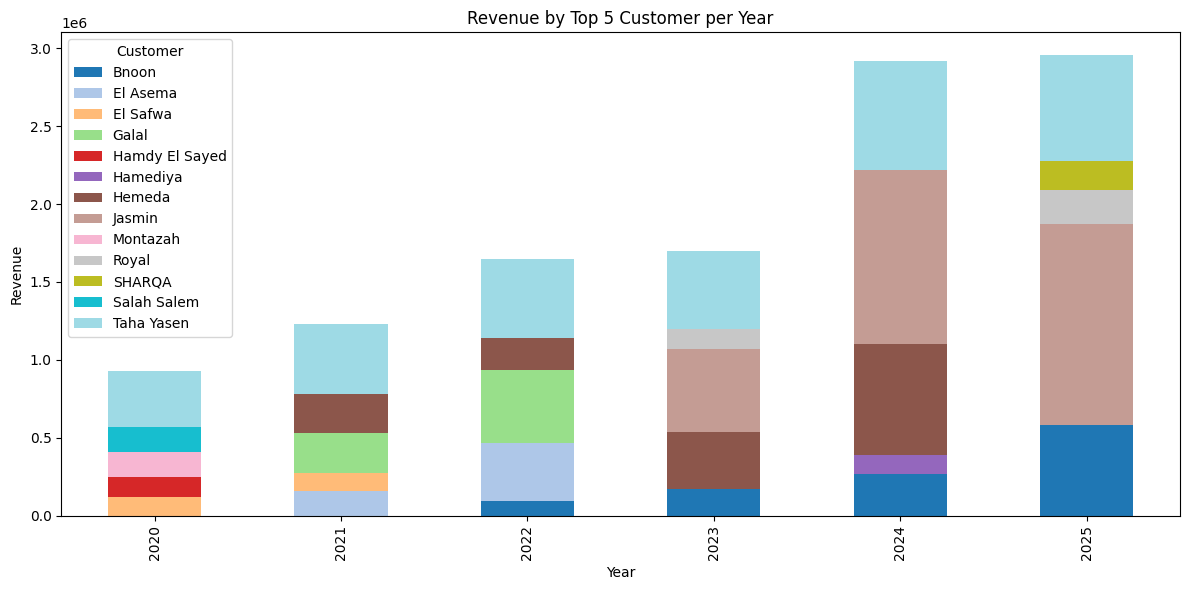

In [152]:

Top_5_yearly_customer_pivot = top_5_customers_yearly.pivot(index='Year', columns='Client', values='Total Selling Price')
# pivot_percent_customer = yearly_customer_pivot.div(yearly_customer_pivot.sum(axis=1), axis=0) * 100


plt.figure(figsize=(12, 6))
Top_5_yearly_customer_pivot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.ylabel('Revenue')
plt.title('Revenue by Top 5 Customer per Year')
# Move legend outside the plot
plt.legend(
    title='Customer',
    bbox_to_anchor=(0, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

In [153]:

yearly_customer_pivot = yearly_customer.pivot(index='Year', columns='Client', values='Total Selling Price')
yearly_customer_pivot


Client,ADAM,Abd El Hamid,Adam Banha,Al Forkan,Al Moaezz / El Kasr El Einy,Al Srour,Amina,Arkan Center,Asmaa S Salem,Bnoon,...,Sharqia,Shourok,Tabarak,Taha Yasen,Tarooty,Tulip,Wady El Tip,Zagazig University,Zina El Hayat,Zohour El Hayat
Year,,,,,,,,,,,,,,,,,,,,,
2020,NaN,69339.0,50337.00,NaN,7440.0,2310.0,NaN,NaN,4055.0,4247.0,...,72932.5,NaN,NaN,360694.40,14813.0,NaN,NaN,12752.5,18035.0,NaN
2021,NaN,16426.2,95585.25,2422.5,NaN,NaN,NaN,NaN,NaN,80685.0,...,3195.0,NaN,3115.0,450513.20,13930.0,16940.0,NaN,NaN,NaN,NaN
2022,NaN,3374.5,64742.75,NaN,NaN,NaN,NaN,NaN,NaN,94810.0,...,NaN,NaN,NaN,506875.80,30635.0,5921.0,NaN,NaN,NaN,NaN
2023,NaN,NaN,NaN,NaN,NaN,NaN,42680.5,NaN,NaN,168780.0,...,NaN,3460.0,NaN,501027.50,NaN,NaN,38925.0,NaN,NaN,74597.75
2024,NaN,NaN,NaN,NaN,NaN,NaN,117873.0,NaN,NaN,267910.0,...,NaN,NaN,NaN,698892.20,NaN,NaN,27000.0,NaN,NaN,42355.00
2025,55666.0,NaN,NaN,NaN,NaN,NaN,180897.5,29737.5,NaN,579930.0,...,16331.0,NaN,NaN,679153.96,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
pivot_percent_customer = yearly_customer_pivot.div(yearly_customer_pivot.sum(axis=1), axis=0) * 100
pivot_percent_customer

Client,ADAM,Abd El Hamid,Adam Banha,Al Forkan,Al Moaezz / El Kasr El Einy,Al Srour,Amina,Arkan Center,Asmaa S Salem,Bnoon,...,Sharqia,Shourok,Tabarak,Taha Yasen,Tarooty,Tulip,Wady El Tip,Zagazig University,Zina El Hayat,Zohour El Hayat
Year,,,,,,,,,,,,,,,,,,,,,
2020,NaN,4.395073,3.190626,NaN,0.471587,0.14642,NaN,NaN,0.257027,0.269197,...,4.622848,NaN,NaN,22.862721,0.938926,NaN,NaN,0.808321,1.143154,NaN
2021,NaN,1.031144,6.000302,0.152071,NaN,NaN,NaN,NaN,NaN,5.064949,...,0.200564,NaN,0.195542,28.280675,0.874447,1.063398,NaN,NaN,NaN,NaN
2022,NaN,0.175138,3.360186,NaN,NaN,NaN,NaN,NaN,NaN,4.920693,...,NaN,NaN,NaN,26.307143,1.589974,0.307303,NaN,NaN,NaN,NaN
2023,NaN,NaN,NaN,NaN,NaN,NaN,1.934272,NaN,NaN,7.649075,...,NaN,0.156806,NaN,22.706464,NaN,NaN,1.764073,NaN,NaN,3.380755
2024,NaN,NaN,NaN,NaN,NaN,NaN,3.648768,NaN,NaN,8.293174,...,NaN,NaN,NaN,21.634261,NaN,NaN,0.835787,NaN,NaN,1.311102
2025,1.640654,NaN,NaN,NaN,NaN,NaN,5.331625,0.876459,NaN,17.092383,...,0.481327,NaN,NaN,20.016829,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
dft = pivot_percent_customer.T
top=dft.apply(lambda x: x.nlargest(5).index, axis=0)

top_dict = top.to_dict(orient='list')
top_dict


{2020: ['Taha Yasen', 'Montazah', 'Salah Salem', 'Hamdy El Sayed', 'El Safwa'],
 2021: ['Taha Yasen', 'Galal', 'Hemeda', 'El Asema', 'El Safwa'],
 2022: ['Taha Yasen', 'Galal', 'El Asema', 'Hemeda', 'Bnoon'],
 2023: ['Jasmin', 'Taha Yasen', 'Hemeda', 'Bnoon', 'Royal'],
 2024: ['Jasmin', 'Hemeda', 'Taha Yasen', 'Bnoon', 'Hamediya'],
 2025: ['Jasmin', 'Taha Yasen', 'Bnoon', 'Royal', 'SHARQA']}

In [156]:
# Create a copy to store the filtered values
filtered_df = pd.DataFrame(index=pivot_percent_customer.index, columns=pivot_percent_customer.columns)

# Loop through each year and filter the row to only include top 5 customers
for year, top_customers in top_dict.items():
    for customer in top_customers:
        if customer in pivot_percent_customer.columns:
            filtered_df.at[int(year), customer] = pivot_percent_customer.at[int(year), customer]

# Drop all columns that are completely NaN (i.e. customers not in any top 5)
filtered_df = filtered_df.dropna(axis=1, how='all')
filtered_df

Client,Bnoon,El Asema,El Safwa,Galal,Hamdy El Sayed,Hamediya,Hemeda,Jasmin,Montazah,Royal,SHARQA,Salah Salem,Taha Yasen
Year,,,,,,,,,,,,,
2020,NaN,NaN,7.747157,NaN,8.054863,NaN,NaN,NaN,10.125795,NaN,NaN,10.115209,22.862721
2021,NaN,9.860412,7.45963,16.075624,NaN,NaN,15.659593,NaN,NaN,NaN,NaN,NaN,28.280675
2022,4.920693,19.377514,NaN,24.336469,NaN,NaN,10.563873,NaN,NaN,NaN,NaN,NaN,26.307143
2023,7.649075,NaN,NaN,NaN,NaN,NaN,16.587254,24.234602,NaN,5.780993,NaN,NaN,22.706464
2024,8.293174,NaN,NaN,NaN,NaN,3.749457,22.123245,34.523121,NaN,NaN,NaN,NaN,21.634261
2025,17.092383,NaN,NaN,NaN,NaN,NaN,NaN,37.99923,NaN,6.493326,5.479448,NaN,20.016829


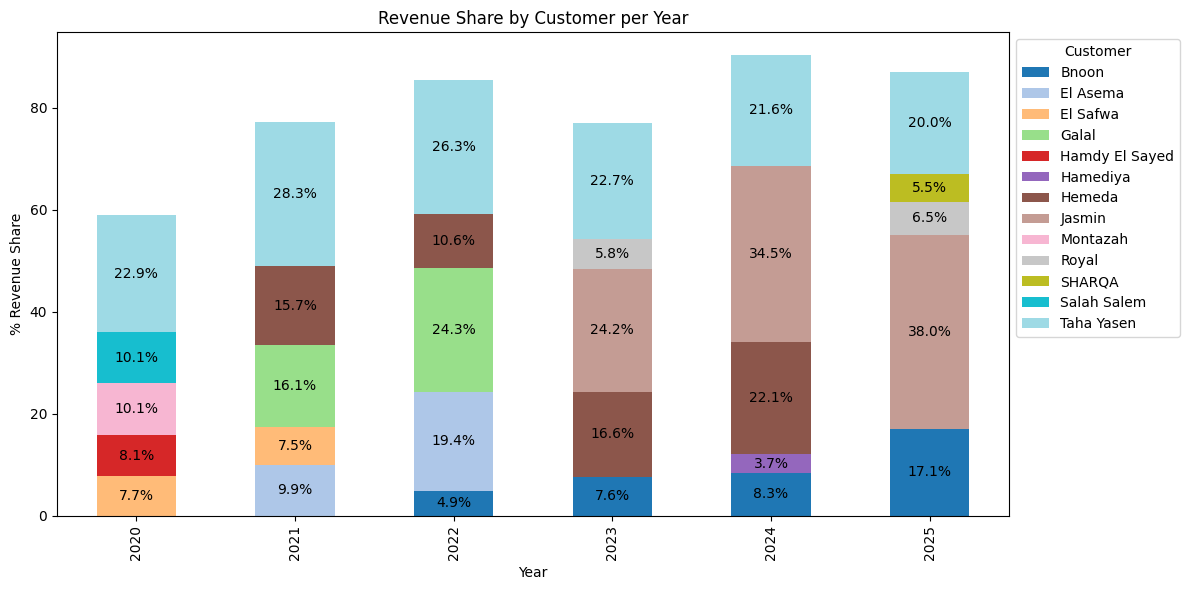

In [157]:

# Plot and capture the Axes
ax = filtered_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Set labels and title
plt.ylabel('% Revenue Share')
plt.title('Revenue Share by Customer per Year')

# Move legend outside the plot
plt.legend(
    title='Customer',
    bbox_to_anchor=(1, 1),
    loc='upper left'
)

# Annotate each bar segment with its value
for container in ax.containers:
    # Only show labels for segments with non-zero height
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=10,
                color='Black' if height > 5 else 'black'  # Adjust for visibility
            )

plt.tight_layout()
plt.show()


#### 3. Scatter Plot - Customer Revenue vs Profit Margin

In [158]:
Customer_data

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,Cumalative_Sales_%
63,Taha Yasen,3197157.06,344915.64,351,238,97,6,139297,10.788198,22.955936
38,Jasmin,2939293.25,335280.1,112,118,53,3,78331,11.406827,44.060382
36,Hemeda,1631108.9,170082.97,238,238,99,6,92641.64,10.427444,55.771921
9,Bnoon,1196362,90045.5,54,23,15,6,38906,7.52661,64.361931
33,Galal,751274.2228,128073.3928,82,335,104,3,39588,17.047489,69.756161
...,...,...,...,...,...,...,...,...,...,...
43,Madina,900,225,1,1,1,1,3,25.0,99.990497
18,Dr. Salah,512.5,42.5,2,5,4,1,32,8.292683,99.994177
16,Dr. Islam Sameer,383,36.0,1,3,3,1,4,9.399478,99.996927
37,Ibn Sina,321,30,1,1,1,1,3,9.345794,99.999232


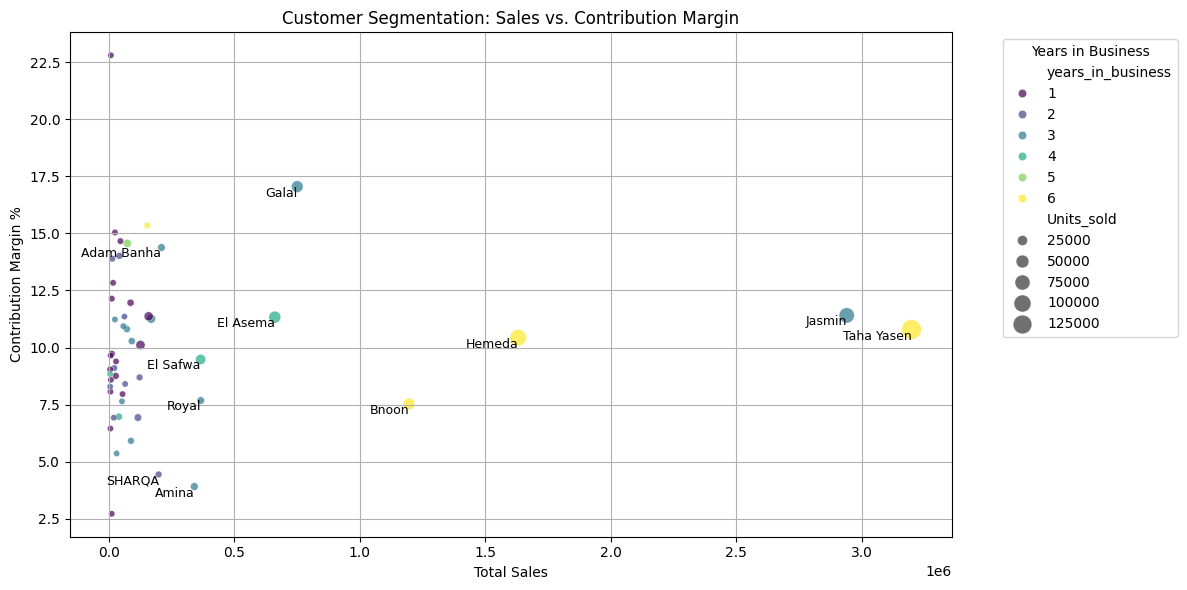

In [159]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Customer_data.head(50), x='Sales_sum', y='Contribution Margin %', size='Units_sold', hue='years_in_business', palette='viridis', sizes=(20, 200), alpha=0.7)
plt.title('Customer Segmentation: Sales vs. Contribution Margin')
plt.xlabel('Total Sales')
plt.ylabel('Contribution Margin %')

# Add labels for the top 10 customers by Sales
for i in range(Customer_data.head(11).shape[0]):
    plt.text(
        Customer_data.iloc[i]['Sales_sum'], 
        Customer_data.iloc[i]['Contribution Margin %'], 
        Customer_data.iloc[i].Client,  # Assuming 'name' is the customer identifier or you can use another column
        fontsize=9,
        ha='right',
        va='top'
    )
    
plt.legend(title='Years in Business', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

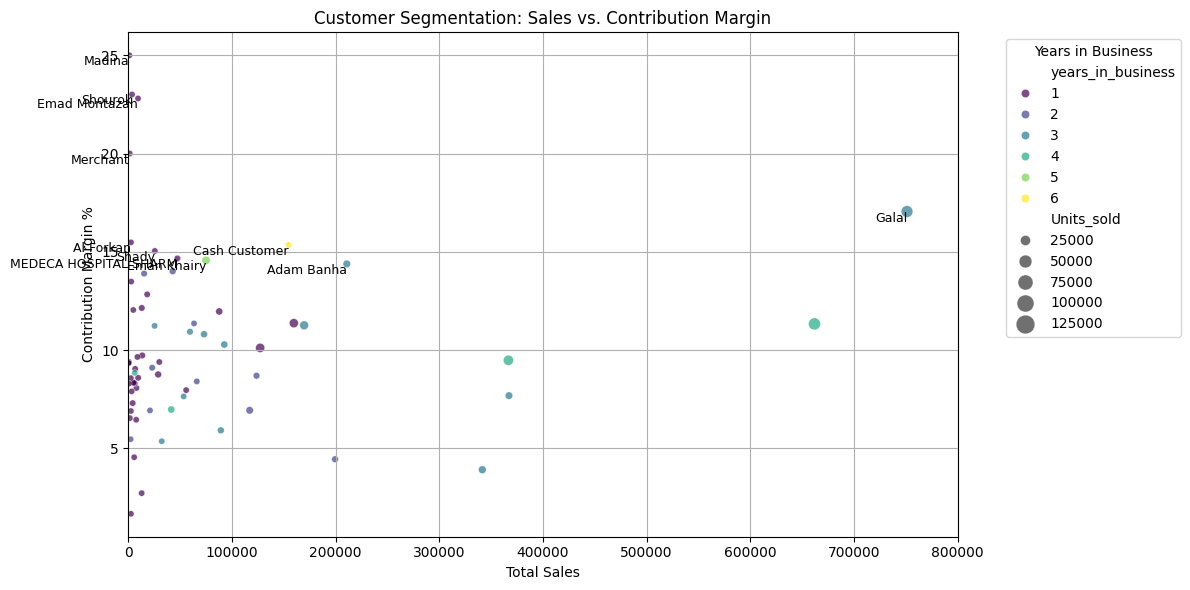

In [160]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Customer_data.head(70), x='Sales_sum', y='Contribution Margin %', size='Units_sold', hue='years_in_business', palette='viridis', sizes=(20, 200), alpha=0.7)
plt.title('Customer Segmentation: Sales vs. Contribution Margin')
plt.xlabel('Total Sales')
plt.ylabel('Contribution Margin %')
plt.xlim(0, 800000)
# Add labels for the top 10 customers by Sales
for i in range(Customer_data.sort_values(by='Contribution Margin %', ascending = False).head(11).shape[0]):
    plt.text(
        Customer_data.sort_values(by='Contribution Margin %', ascending = False).iloc[i]['Sales_sum'], 
        Customer_data.sort_values(by='Contribution Margin %', ascending = False).iloc[i]['Contribution Margin %'], 
        Customer_data.sort_values(by='Contribution Margin %', ascending = False).iloc[i].Client,  # Assuming 'name' is the customer identifier or you can use another column
        fontsize=9,
        ha='right',
        va='top'
    )
    
plt.legend(title='Years in Business', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [161]:
Customer_data.sort_values(by='Contribution Margin %').tail(11)

,Client,Sales_sum,Profit_sum,Transactions_count,Products_No,Category_No,years_in_business,Units_sold,Contribution Margin %,Cumalative_Sales_%
2,Adam Banha,210665.0,30296.55,165,17,11,3,7705,14.381388,83.742349
32,Eman Khairy,74832.25,10897.75,56,13,8,5,11984,14.562906,93.754688
42,MEDECA HOSPITAL SHARM,47191.5,6918.85,2,58,29,1,1097,14.661221,96.75355
59,Shady,25448.0,3827.75,8,27,18,1,572,15.041457,98.188546
11,Cash Customer,154423.3,23697.55,96,49,31,6,1363.5,15.345838,88.645262
3,Al Forkan,2422.5,375.0,4,4,4,1,165,15.479876,99.89987
33,Galal,751274.2228,128073.3928,82,335,104,3,39588,17.047489,69.756161
46,Merchant,1250,250,1,1,1,1,5,20.0,99.984035
31,Emad Montazah,9234,2105.5,9,5,4,1,187,22.801603,99.333278
61,Shourok,3460,796,1,3,1,1,5,23.00578,99.840939


### 2. Churn Rate (Lost Customers ÷ Previous Customers)

#### Churn rate trend across 6 years

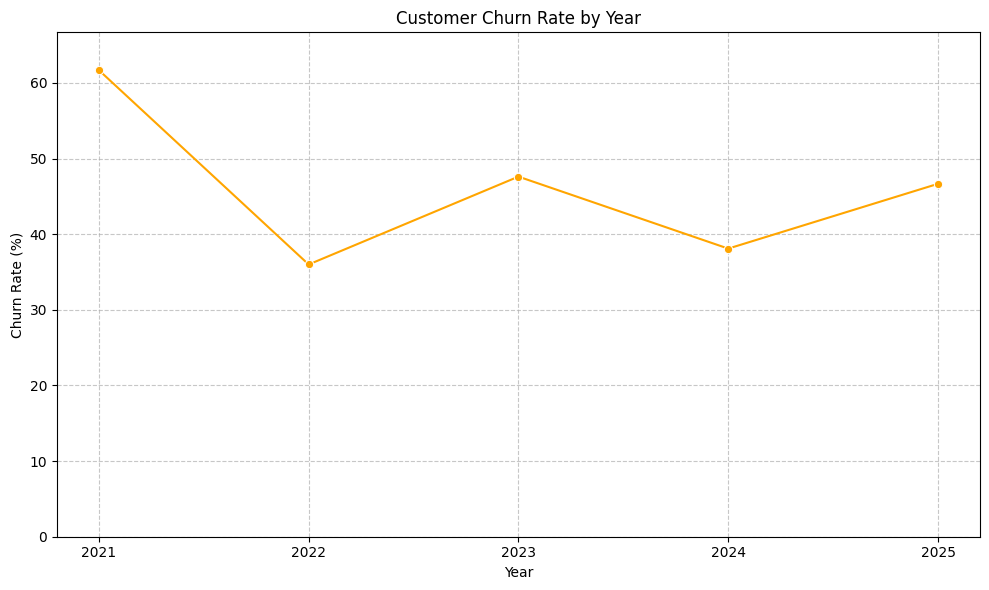

In [162]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_df, x='Year', y='Churn Rate (%)', marker='o', color='orange')
plt.title('Customer Churn Rate by Year')
plt.xlabel('Year')
plt.ylabel('Churn Rate (%)')
plt.xticks(churn_df['Year'])
plt.ylim(0, churn_df['Churn Rate (%)'].max() + 5)  # Add some space above the max churn rate
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Churn Rate after Clients Dropped

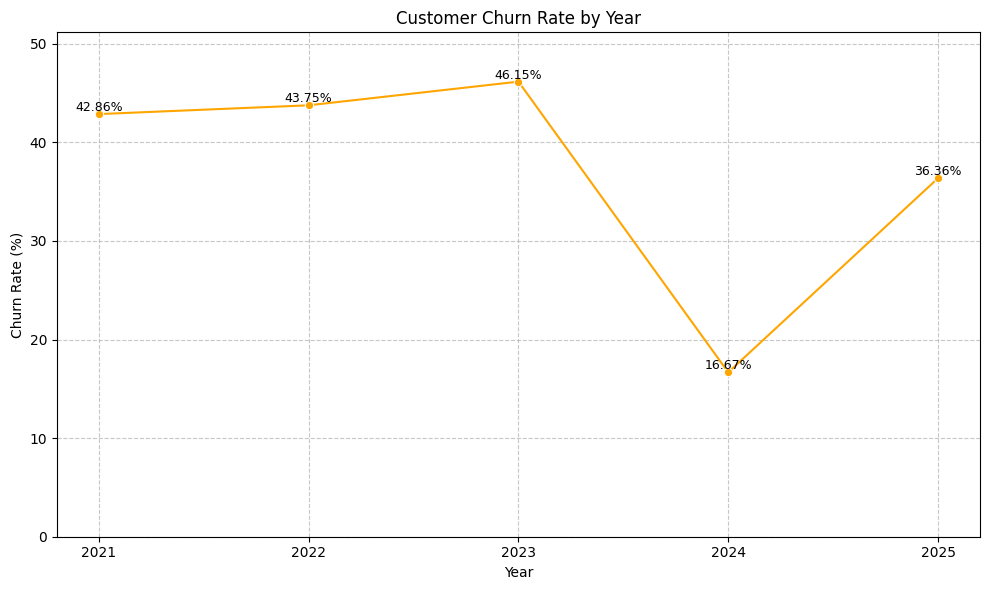

In [163]:
drooped_customers_per_year = original_df[~original_df['Client'].isin(dropped_customer_list)].groupby('Year')['Client'].unique().apply(set).reset_index()
# customers_per_year
# dropped_customer_list
churn_data_dropped = []

for i in range(1, len(drooped_customers_per_year)):
    year = drooped_customers_per_year.loc[i, 'Year']
    current = drooped_customers_per_year.loc[i, 'Client']
    previous = drooped_customers_per_year.loc[i - 1, 'Client']
    
    lost = previous - current
    churn_rate_dropped = (len(lost) / len(previous)) * 100 if len(previous) > 0 else 0
    
    churn_data_dropped.append({
        'Year': year,
        'Customers at Start': len(previous),
        'Retained Customers': len(previous & current),
        'Lost Customers': len(lost),
        'new Customers': len(current - previous),
        'Churn Rate (%)': round(churn_rate_dropped, 2)
    })

churn_df_dropped = pd.DataFrame(churn_data_dropped)
churn_df_dropped


plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_df_dropped, x='Year', y='Churn Rate (%)', marker='o', color='orange')

for i in range(len(churn_df_dropped)):
    plt.text(churn_df_dropped.iloc[i]['Year'],
             churn_df_dropped.iloc[i]['Churn Rate (%)'],
             f"{churn_df_dropped.iloc[i]['Churn Rate (%)']}%",fontsize=9,
        ha='center',
        color = 'black',
        va='bottom',verticalalignment='bottom'
    )


plt.title('Customer Churn Rate by Year')
plt.xlabel('Year')
plt.ylabel('Churn Rate (%)')
plt.xticks(churn_df_dropped['Year'])
plt.ylim(0, churn_df_dropped['Churn Rate (%)'].max() + 5)  # Add some space above the max churn rate
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Funnel Chart after dropped clients

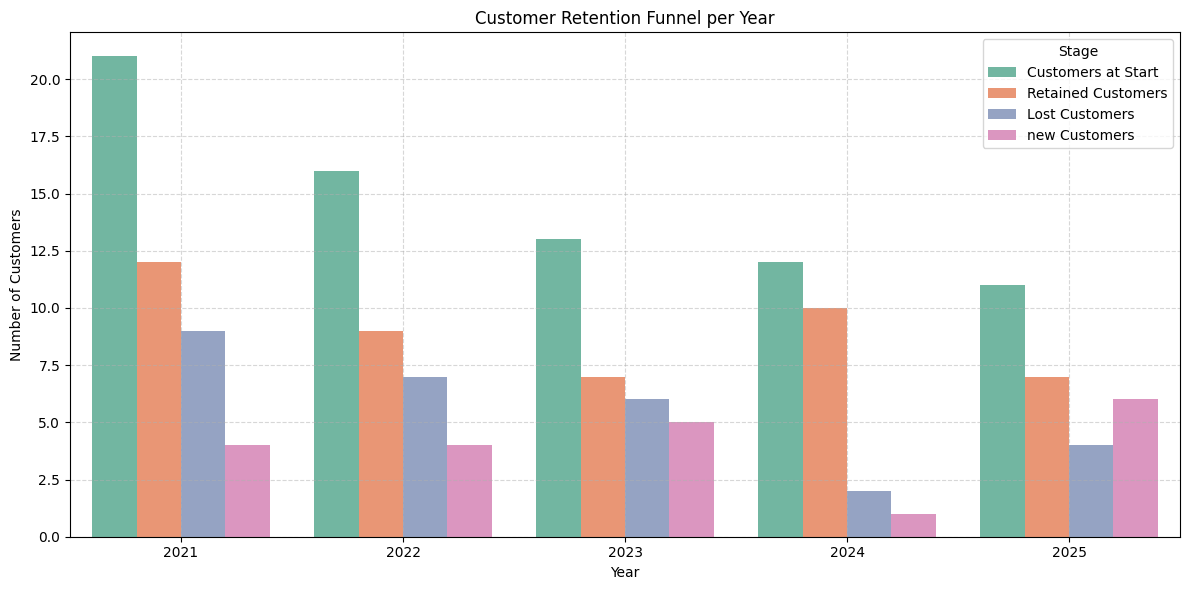

In [164]:
churn_df_dropped_long = churn_df_dropped.melt(
    id_vars='Year',
    value_vars=['Customers at Start', 'Retained Customers', 'Lost Customers','new Customers'],
    var_name='Stage',
    value_name='Customer Count'
)

plt.figure(figsize=(12, 6))
sns.barplot(data=churn_df_dropped_long, x='Year', y='Customer Count', hue='Stage', palette='Set2')
plt.title('Customer Retention Funnel per Year')
plt.ylabel('Number of Customers')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 3. Gross Margin % Trend


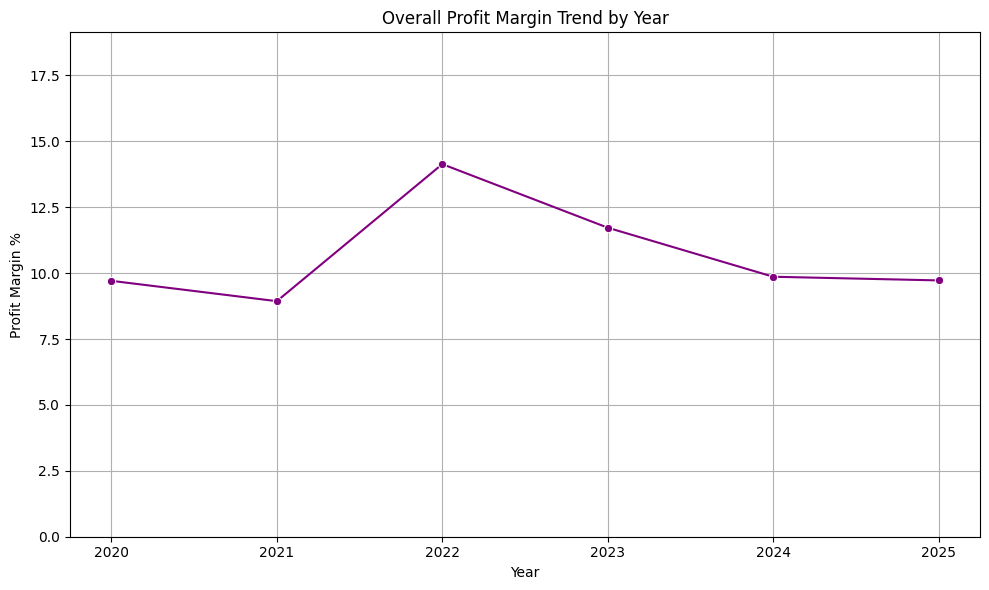

In [165]:
# Profit_margin = (original_df.groupby("Year").agg(Profit_sum=("Profit", "sum"),
#                                                  Selling_sum=("Total Selling Price", "sum"),
#                                                     Buying_sum=("Total Buying Price", "sum")
#     )
#     .reset_index()
# )

# Then calculate profit margin
Profit_margin["Profit_Margin"] = Profit_margin["Profit_sum"] / Profit_margin["Selling_sum"]*100
Profit_margin

plt.figure(figsize=(10, 6))
sns.lineplot(data=Profit_margin, x='Year', y='Profit_Margin', marker='o', color='purple')
plt.title('Overall Profit Margin Trend by Year')
plt.xlabel('Year')
plt.ylabel('Profit Margin %')
plt.ylim(0, Profit_margin['Profit_Margin'].max() + 5)
plt.grid(True)
plt.tight_layout()
plt.show()

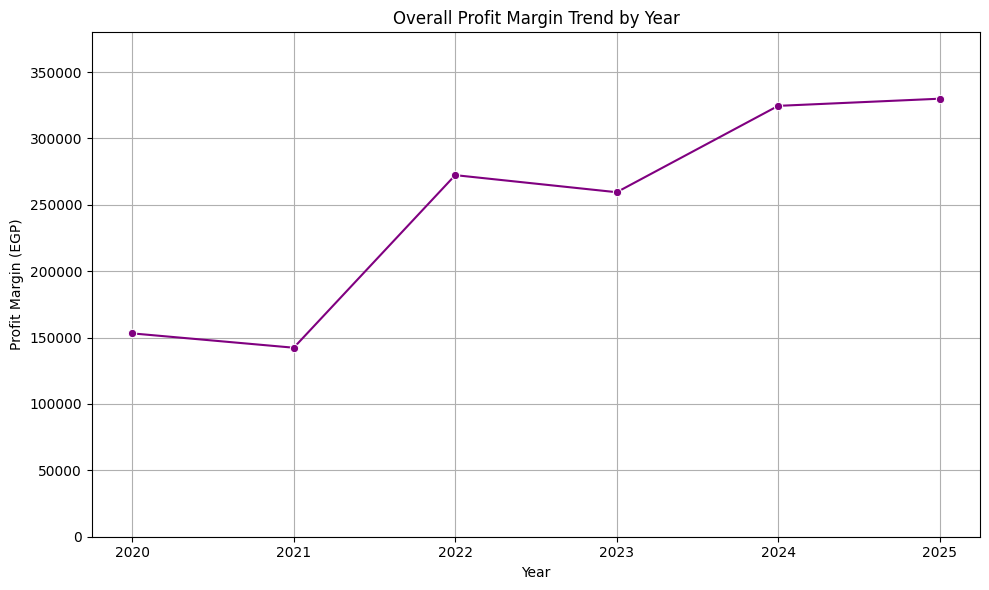

In [166]:
# Profit_margin = (original_df.groupby("Year").agg(Profit_sum=("Profit", "sum"),
#                                                  Selling_sum=("Total Selling Price", "sum"),
#                                                     Buying_sum=("Total Buying Price", "sum")
#     )
#     .reset_index()
# )
plt.figure(figsize=(10, 6))
sns.lineplot(data=Profit_margin, x='Year', y='Profit_sum', marker='o', color='purple')
plt.title('Overall Profit Margin Trend by Year')
plt.xlabel('Year')
plt.ylabel('Profit Margin (EGP)')
plt.ylim(0, Profit_margin['Profit_sum'].max() + 50000)
plt.grid(True)
plt.tight_layout()
plt.show()

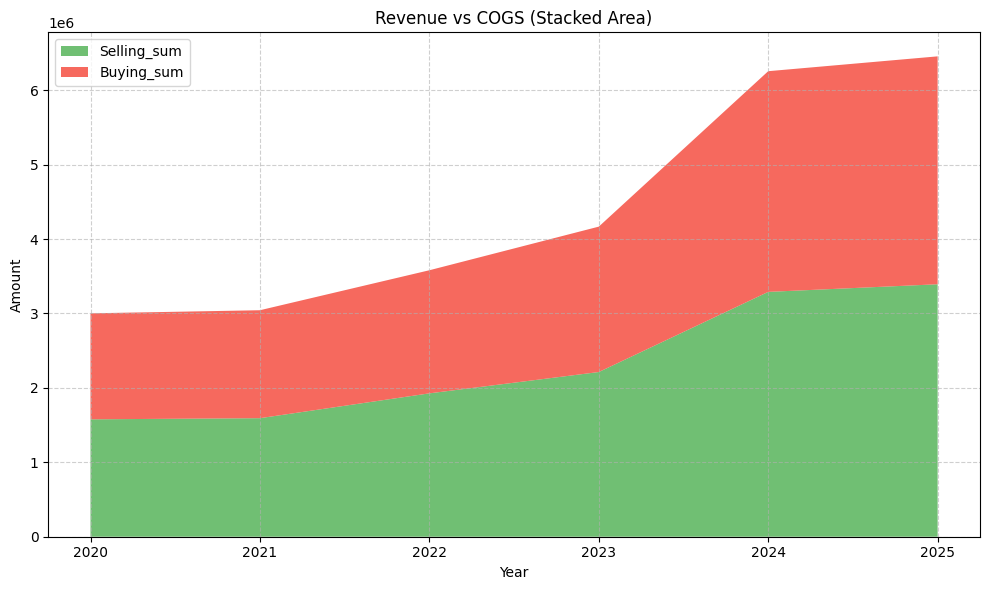

In [167]:
Profit_margin['Year'] = pd.to_numeric(Profit_margin['Year'], errors='coerce')
Profit_margin['Selling_sum'] = pd.to_numeric(Profit_margin['Selling_sum'], errors='coerce')
Profit_margin['Buying_sum'] = pd.to_numeric(Profit_margin['Buying_sum'], errors='coerce')

plt.figure(figsize=(10, 6))

plt.stackplot(
    Profit_margin['Year'],
    Profit_margin['Selling_sum'],
    Profit_margin['Buying_sum'],
    labels=['Selling_sum', 'Buying_sum'],
    colors=['#4CAF50', '#F44336'],
    alpha=0.8
)

plt.title('Revenue vs COGS (Stacked Area)')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 4. Marketing ROI



#### Definition: (Revenue Attributed to Marketing ÷ Marketing Spend).
#### Why: Shows which campaigns are actually profitable.
#### ✅ Suggested Charts:
#### Bar Chart → ROI by marketing campaign.
#### Bubble Chart → Campaign ROI (size = spend, color = ROI).
#### Line + Bar Combo Chart → Spend (bar) vs ROI (line).

### 5. Supplier Dependency Ratio


#### Supplier purchase distribution (Top 3 vs Others)

In [168]:
supplier_by_year = original_df.groupby(['Supplier','Year'])['Total Buying Price'].sum().reset_index().sort_values(by=['Year','Total Buying Price'], ascending=[True,False])
supplier_satcked = supplier_by_year.pivot(index='Year', columns='Supplier', values='Total Buying Price').loc[:, Supplier['Supplier'].head(5)]  # Keep only top 10 suppliers
supplier_satcked = supplier_satcked.apply(pd.to_numeric, errors='coerce')
supplier_satcked

Supplier,Safa,Kareem,El Yosr,Amazon,FOX
Year,,,,,
2020,NaN,378347.77,110294.45,NaN,450.00
2021,NaN,680149.04,45154.00,NaN,106624.00
2022,152119.00,782917.32,80273.00,3477.50,32305.00
2023,729479.50,429969.79,90610.00,26508.00,92661.75
2024,1724786.25,193404.57,105227.00,99895.25,50130.00
2025,1647682.28,145870.37,277406.00,273245.00,87085.00


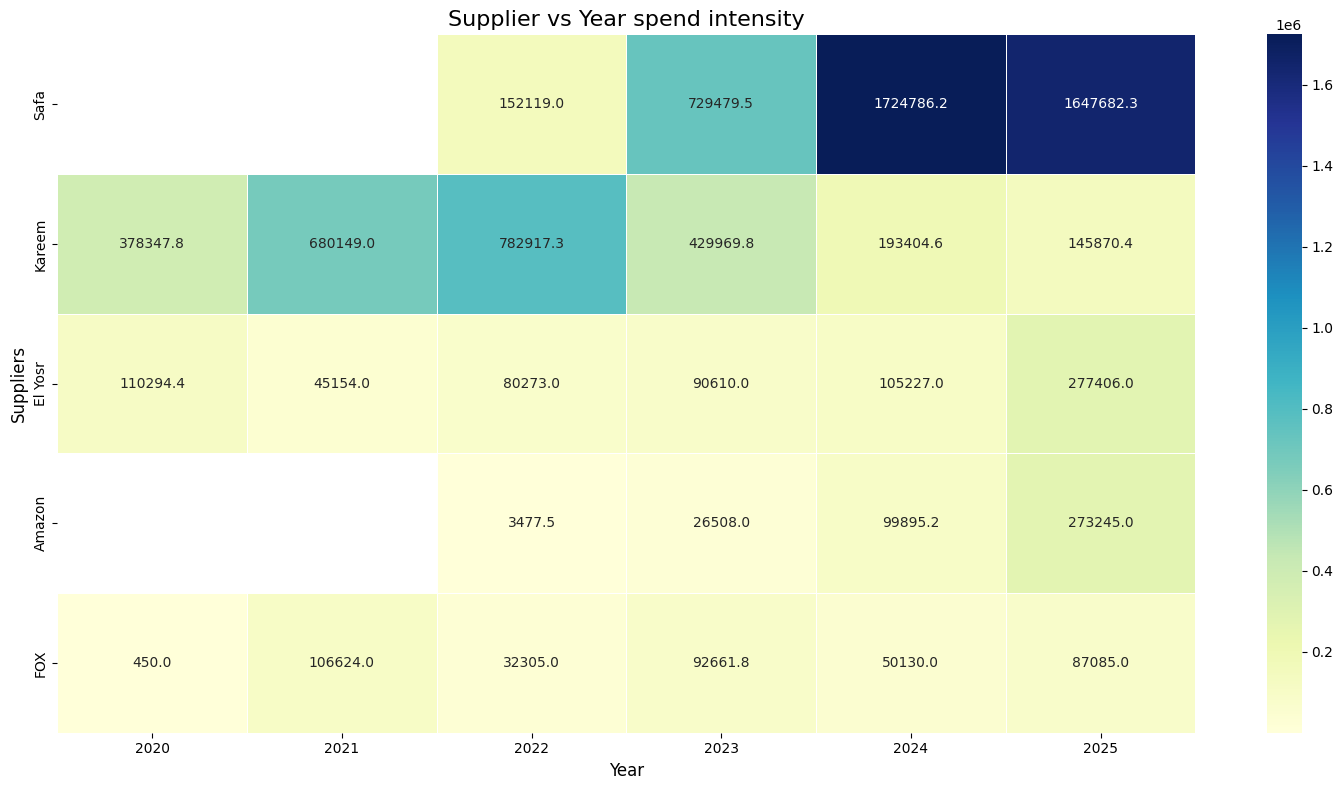

In [169]:
# plt.figure(figsize=(10, 6))
# sns.heatmap(supplier_satcked, annot=True, cmap='YlGnBu', linewidths=0.5, fmt='.1f') #, cbar_kws={'label': 'Total Buying Price'}

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(supplier_satcked.T, annot=True, cmap='YlGnBu', linewidths=0.5, fmt='.1f')

# Add title and labels
plt.title('Supplier vs Year spend intensity', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Suppliers', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

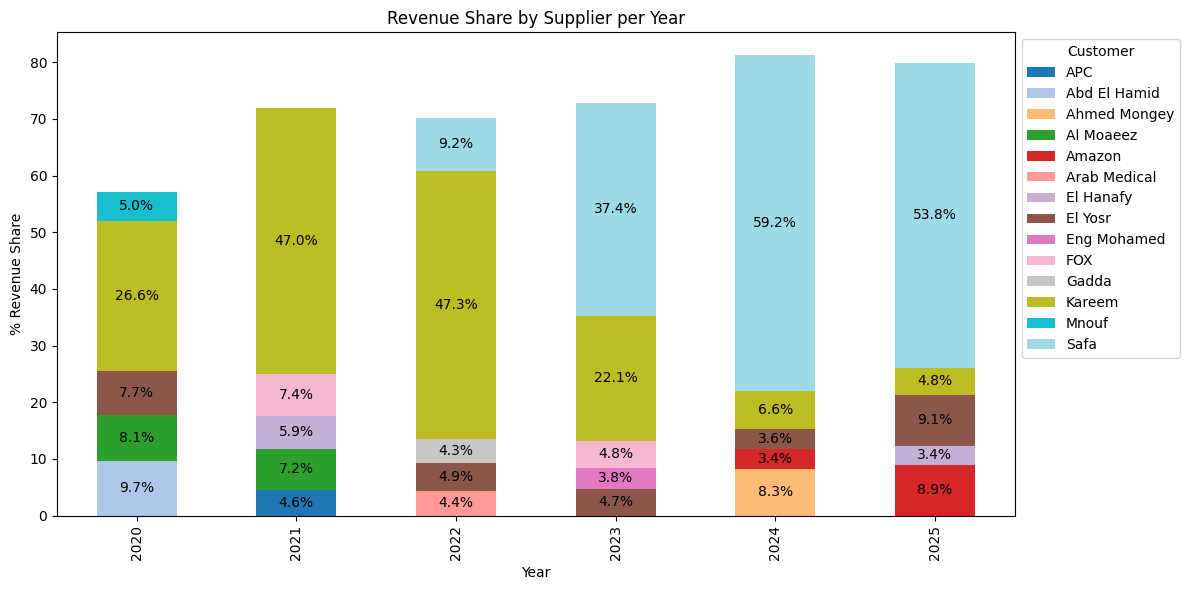

In [170]:
yearly_supplier = original_df.groupby(['Year','Supplier'])['Total Buying Price'].sum().reset_index().sort_values(by=['Year','Total Buying Price'], ascending=[True,False])

yearly_supplier_pivot = yearly_supplier.pivot(index='Year', columns='Supplier', values='Total Buying Price')

pivot_percent_supplier = yearly_supplier_pivot.div(yearly_supplier_pivot.sum(axis=1), axis=0) * 100

dfs = pivot_percent_supplier.T.apply(pd.to_numeric, errors='coerce')

top=dfs.apply(lambda x: x.nlargest(5).index, axis=0)

top_dict = top.to_dict(orient='list')
top_dict

# Create a copy to store the filtered values
filtered_supplier_df = pd.DataFrame(index=pivot_percent_supplier.index, columns=pivot_percent_supplier.columns)

# Loop through each year and filter the row to only include top 5 customers
for year, top_suppliers in top_dict.items():
    for supplier in top_suppliers:
        if supplier in pivot_percent_supplier.columns:
            filtered_supplier_df.at[int(year), supplier] = pivot_percent_supplier.at[int(year), supplier]

# Drop all columns that are completely NaN (i.e. customers not in any top 5)
filtered_supplier_df = filtered_supplier_df.dropna(axis=1, how='all')
filtered_supplier_df


# Plot and capture the Axes
ax = filtered_supplier_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Set labels and title
plt.ylabel('% Revenue Share')
plt.title('Revenue Share by Supplier per Year')

# Move legend outside the plot
plt.legend(
    title='Customer',
    bbox_to_anchor=(1, 1),
    loc='upper left'
)

# Annotate each bar segment with its value
for container in ax.containers:
    # Only show labels for segments with non-zero height
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=10,
                color='Black' if height > 5 else 'black'  # Adjust for visibility
            )

plt.tight_layout()
plt.show()

In [171]:
yearly_supplier

,Year,Supplier,Total Buying Price
24,2020,Kareem,378347.77
2,2020,Abd El Hamid,138290.13
4,2020,Al Moaeez,114686.96
18,2020,El Yosr,110294.45
31,2020,Mnouf,71212.0
...,...,...,...
209,2025,WH,10923.75
204,2025,Ryaan Medical,10350.0
189,2025,Arab Medical,5100
207,2025,Sphinx,3965.0


## 🔮 Phase 5 – Predictive Analytics (What will happen?)


### 1. Forecasted Sales (Next 12–24 Months)


In [172]:
df2 = original_df.groupby(['Year','Month'])['Total Selling Price'].sum().reset_index()

df2.to_excel('monthly_sales.xlsx', index=False)

In [173]:
df2['Total Selling Price'] = pd.to_numeric(df2['Total Selling Price'], errors='coerce')

In [174]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df2['Total Selling Price'], order=(1,1,1))
results = model.fit()
print(results.summary())

forecast = results.forecast(steps=12)


                                SARIMAX Results                                
Dep. Variable:     Total Selling Price   No. Observations:                   72
Model:                  ARIMA(1, 1, 1)   Log Likelihood                -897.710
Date:                 Sat, 20 Dec 2025   AIC                           1801.419
Time:                         22:19:37   BIC                           1808.207
Sample:                              0   HQIC                          1804.119
                                  - 72                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1114      0.175     -0.637      0.524      -0.454       0.231
ma.L1         -0.7612      0.123     -6.194      0.000      -1.002      -0.520
sigma2      6.412e+09   1.72e-11   3.73e+20 

In [175]:
forecast

72    264834.466363
73    251080.098075
74    252612.129105
75    252441.483748
76    252460.491090
77    252458.373956
78    252458.609774
79    252458.583507
80    252458.586433
81    252458.586107
82    252458.586143
83    252458.586139
Name: predicted_mean, dtype: float64

In [176]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(df2['Total Selling Price'], initialization_method="estimated")
fit = model.fit()

# Forecast next 12 months
forecast = fit.forecast(12)
forecast

72    260826.961925
73    260826.961925
74    260826.961925
75    260826.961925
76    260826.961925
77    260826.961925
78    260826.961925
79    260826.961925
80    260826.961925
81    260826.961925
82    260826.961925
83    260826.961925
dtype: float64

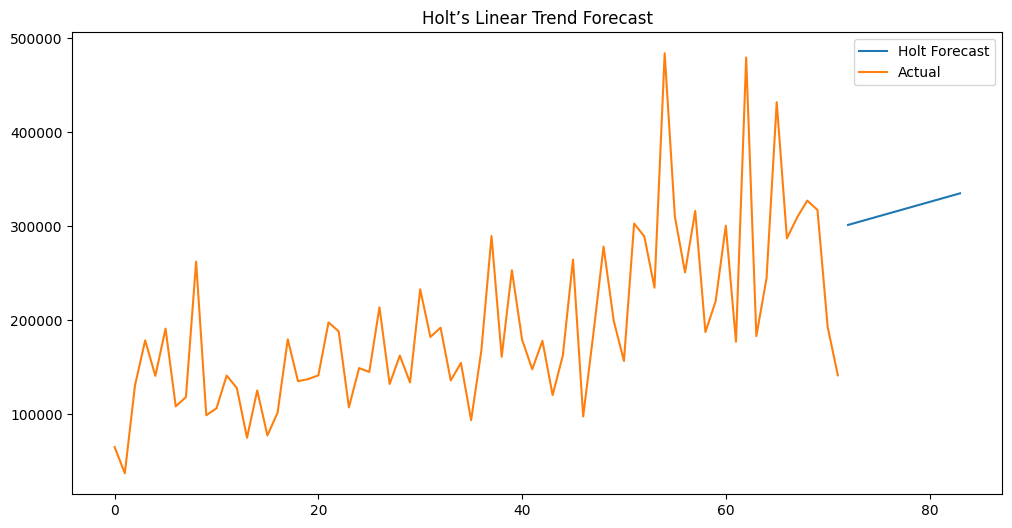

In [177]:
from statsmodels.tsa.holtwinters import Holt

model = Holt(df2['Total Selling Price'], initialization_method="estimated")
fit = model.fit()
forecast = fit.forecast(12)

forecast.plot(label='Holt Forecast', figsize=(12,6))
df2['Total Selling Price'].plot(label='Actual')
plt.legend()
plt.title('Holt’s Linear Trend Forecast')
plt.show()

In [178]:
forecast

72    301425.203906
73    304485.593298
74    307545.982690
75    310606.372082
76    313666.761474
77    316727.150866
78    319787.540258
79    322847.929650
80    325908.319042
81    328968.708434
82    332029.097826
83    335089.487218
dtype: float64

## will complete it later after adding financial data to make a precise model

original_df['Client]

In [179]:
original_df['Client'].value_counts()
# pd.set_option('display.max_rows',None)
original_df['Client'].value_counts().reset_index().sort_values(by= 'Client')


,Client,count
27,ADAM,41
22,Abd El Hamid,62
6,Adam Banha,472
47,Al Forkan,8
69,Al Moaezz / El Kasr El Einy,1
...,...,...
36,Tulip,24
44,Wady El Tip,10
59,Zagazig University,2
52,Zina El Hayat,5


In [180]:
Revenue_per_category_25 = original_df[original_df['Year'] == 2025].groupby('Category').agg(revenue = ("Total Selling Price" , "sum"),
                                                                                           profit = ("Profit","sum")).reset_index().sort_values(by='revenue', ascending=False).reset_index()
Revenue_per_category_25['percentage from sales'] = Revenue_per_category_25['revenue'] / Revenue_per_category_25['revenue'].sum()* 100
Revenue_per_category_25['Profit %'] = Revenue_per_category_25['profit'] / Revenue_per_category_25['revenue'] * 100

Revenue_per_category_25

,index,Category,revenue,profit,percentage from sales,Profit %
0,101,Vicryl,1013131.5,98373.0,29.860211,9.709796
1,55,Latex,531869.0,39367.0,15.675873,7.401635
2,50,IV Cannula,399626.0,34196.0,11.778251,8.557001
3,85,Spinal,146945.0,17095.0,4.330937,11.633604
4,75,Prolene,118725.0,11190.0,3.499204,9.425142
...,...,...,...,...,...,...
98,92,Surgical Pad,166,10,0.004893,6.024096
99,40,Eye Patch,154,14,0.004539,9.090909
100,88,Sterilization Paper,138,12,0.004067,8.695652
101,79,Sample Cup,60,10,0.001768,16.666667


In [181]:
Revenue_per_category_25['profit'].sum() / Revenue_per_category_25['revenue'].sum()

0.09724260211005123

In [182]:
Revenue_per_category_25['cumsum'] = Revenue_per_category_25['percentage from sales'].cumsum()

In [183]:
Revenue_per_category_25

,index,Category,revenue,profit,percentage from sales,Profit %,cumsum
0,101,Vicryl,1013131.5,98373.0,29.860211,9.709796,29.860211
1,55,Latex,531869.0,39367.0,15.675873,7.401635,45.536084
2,50,IV Cannula,399626.0,34196.0,11.778251,8.557001,57.314334
3,85,Spinal,146945.0,17095.0,4.330937,11.633604,61.645271
4,75,Prolene,118725.0,11190.0,3.499204,9.425142,65.144475
...,...,...,...,...,...,...,...
98,92,Surgical Pad,166,10,0.004893,6.024096,99.988181
99,40,Eye Patch,154,14,0.004539,9.090909,99.99272
100,88,Sterilization Paper,138,12,0.004067,8.695652,99.996787
101,79,Sample Cup,60,10,0.001768,16.666667,99.998556
